In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from os import listdir
from statistics import mean, median

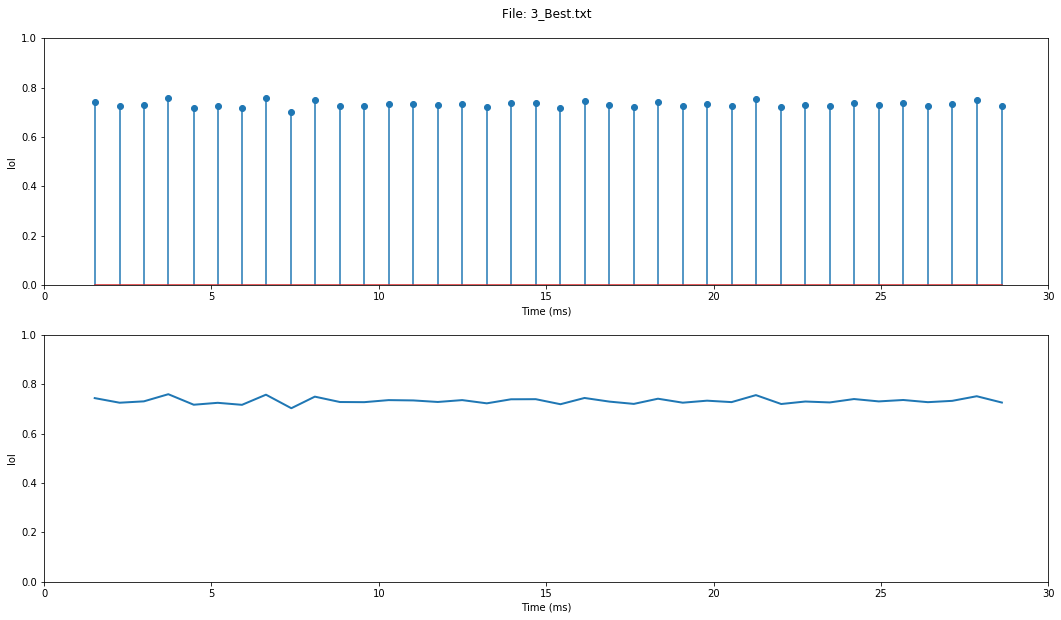

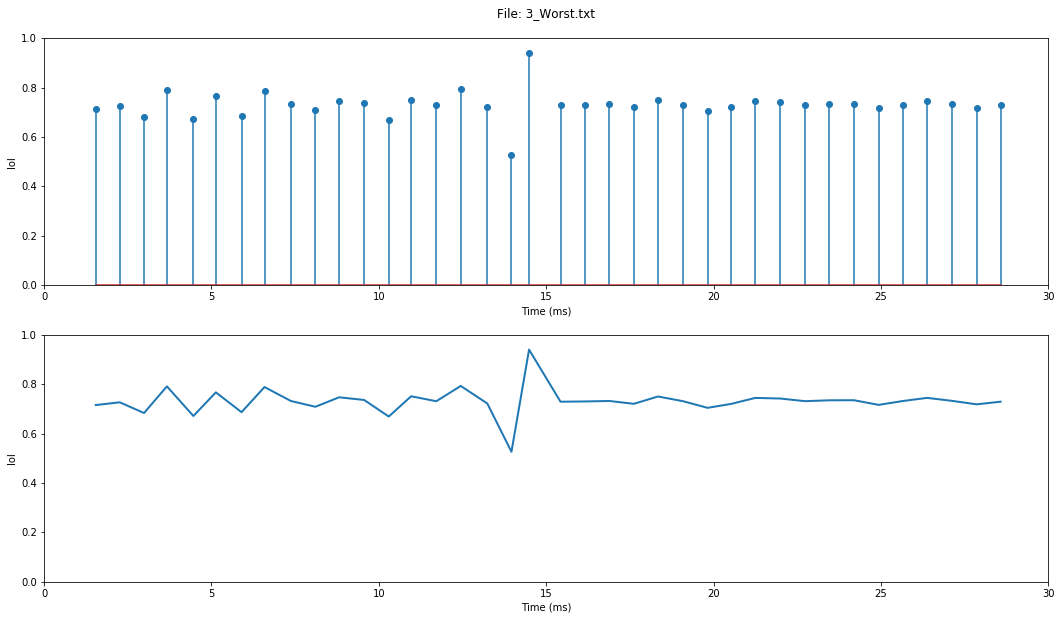

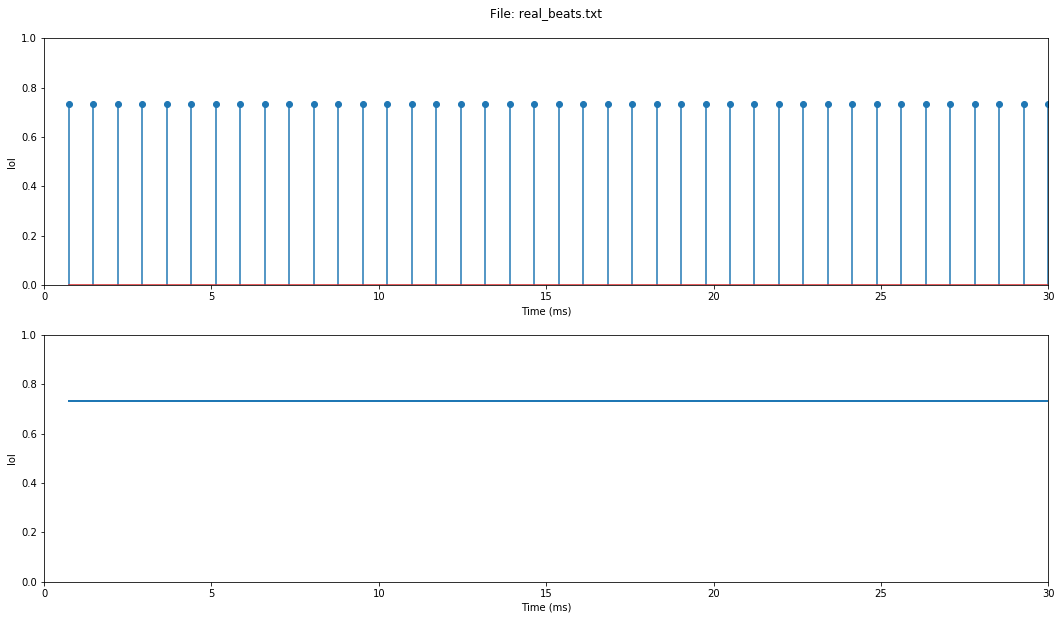

In [2]:
path = "Data/Processed_Delay/"
name_list=listdir(path)

for file in name_list:
    x = []
    y = []
    f = open(path+file, "r")
    for row in f:
        num = row.split("\n")[0]
        x.append(float(num))

    i = 0
    while i<len(x):
        if i+1 < len(x):
            y.append(float(x[i+1])-float(x[i]))
        i += 1

    del x[len(x)-1]

    fig, (ax1, ax2) = plt.subplots(2,1, figsize = (18,10))
    
    ax1.stem(x, y, use_line_collection=True)

    ax1.set_xlim(right=30, left=0)
    ax1.set_ylim(bottom=0, top=1)

    ax2.plot(x, y, '-', lw=2)
    ax2.set_xlim(right=30, left=0)
    ax2.set_ylim(bottom=0, top=1)
    
    
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('IoI (s)')
    
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('IoI (s)')

    ax1.set_title("File: "+file+"\n")
    
    plt.show()

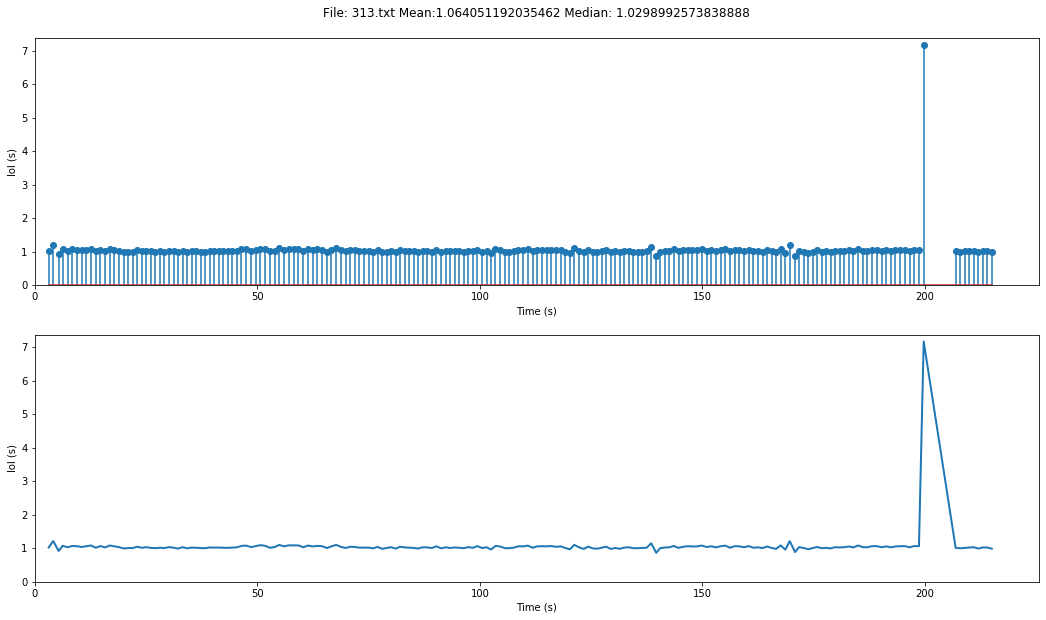

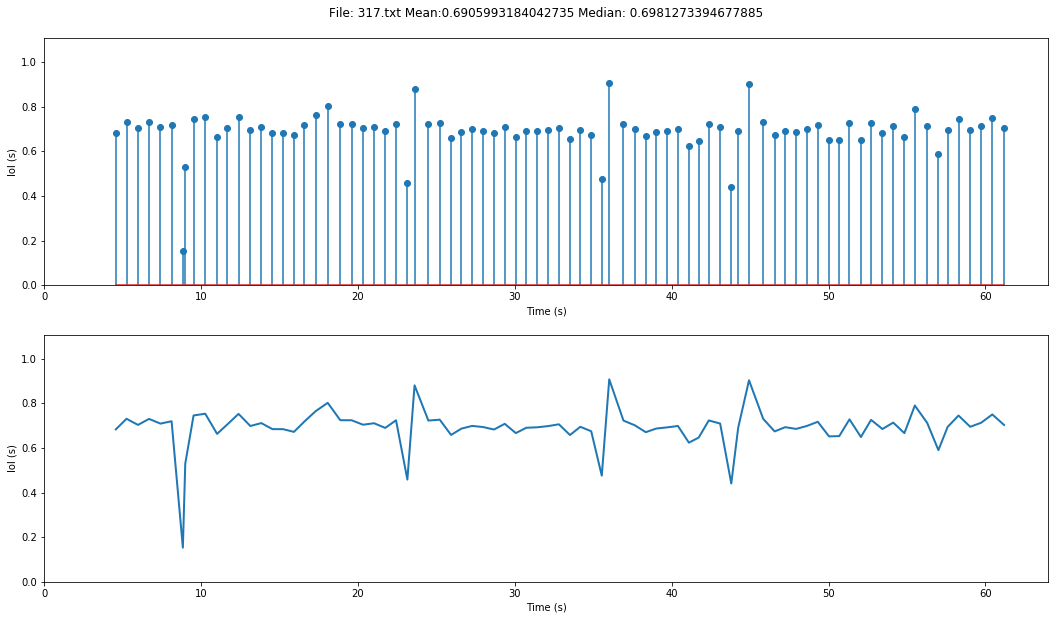

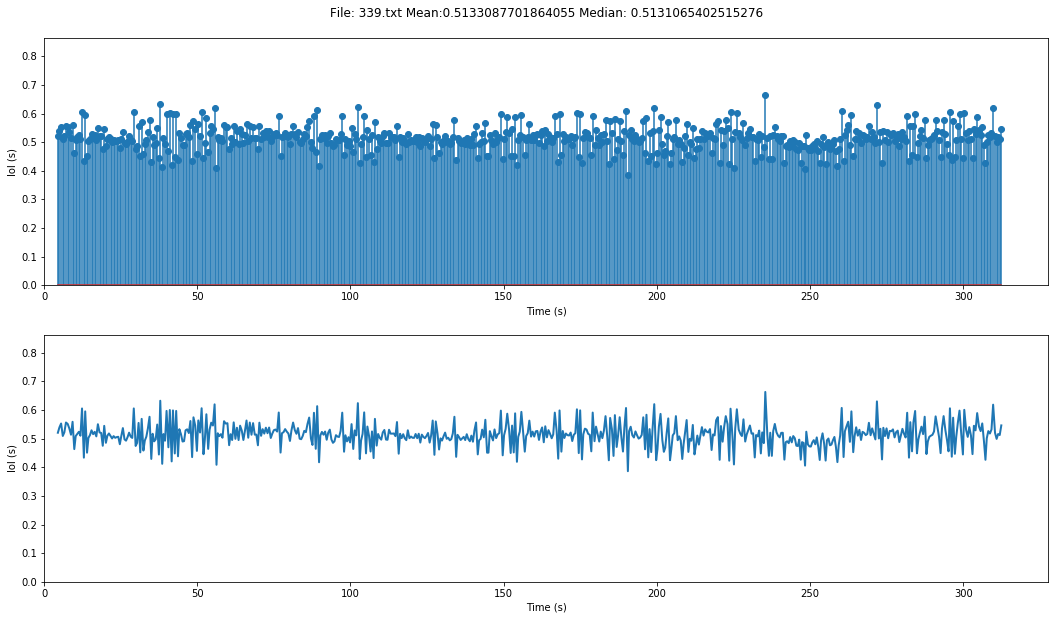

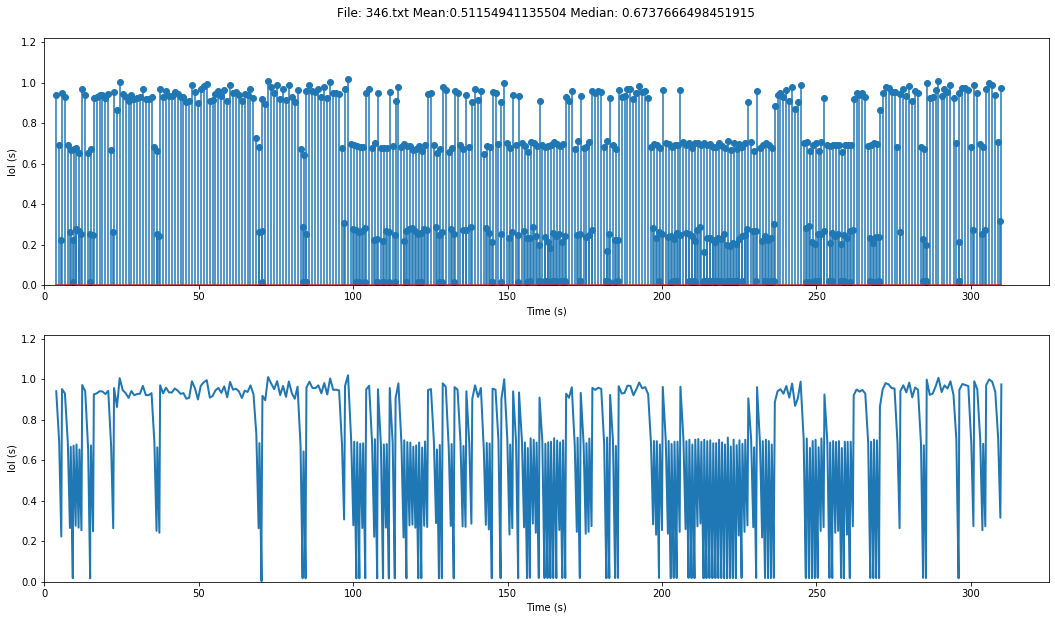

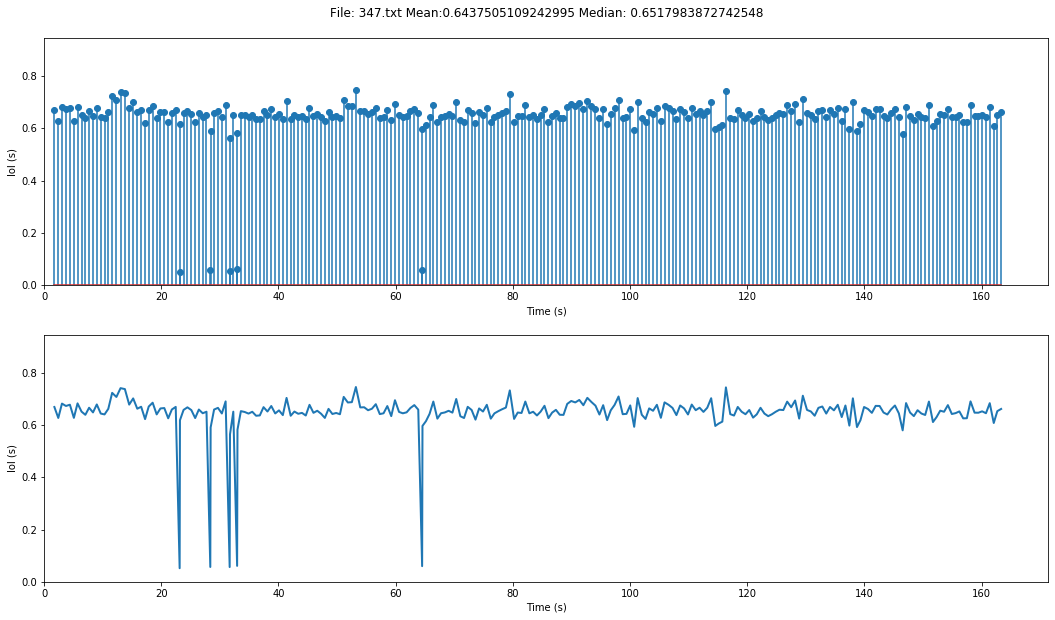

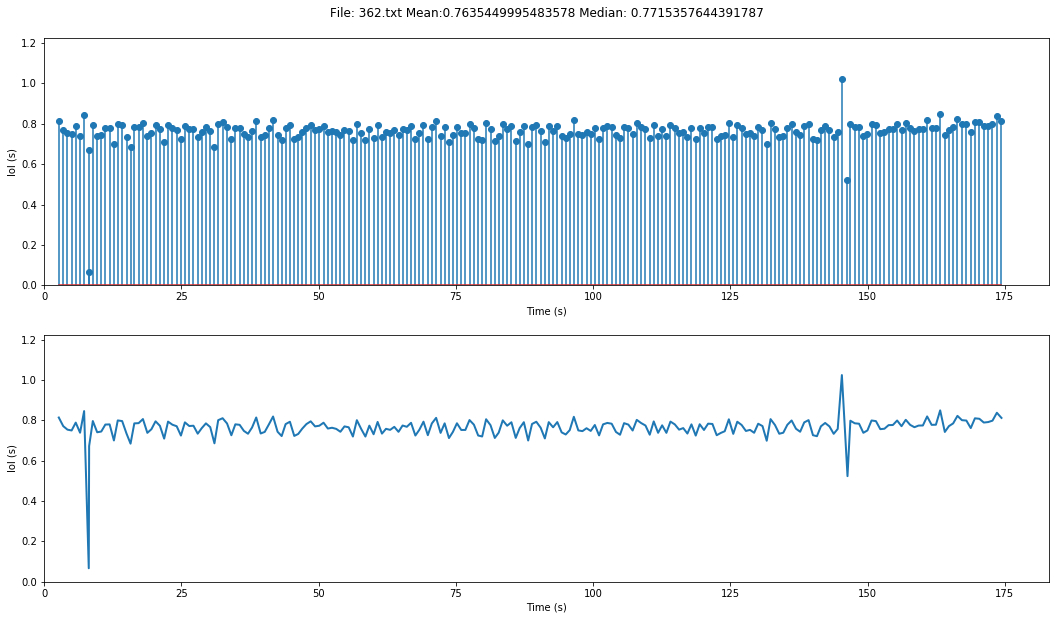

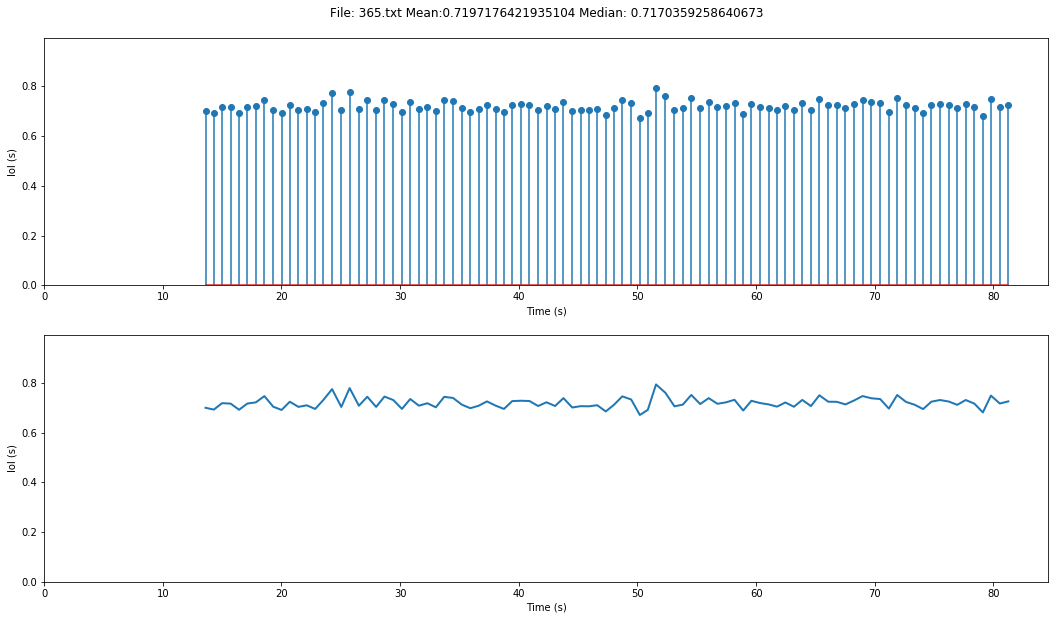

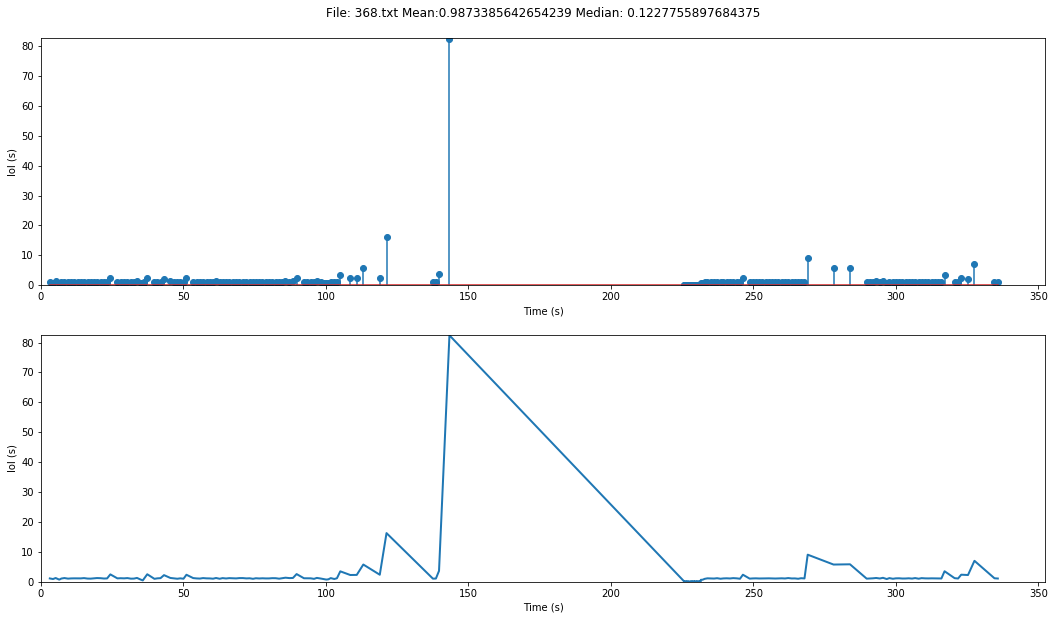

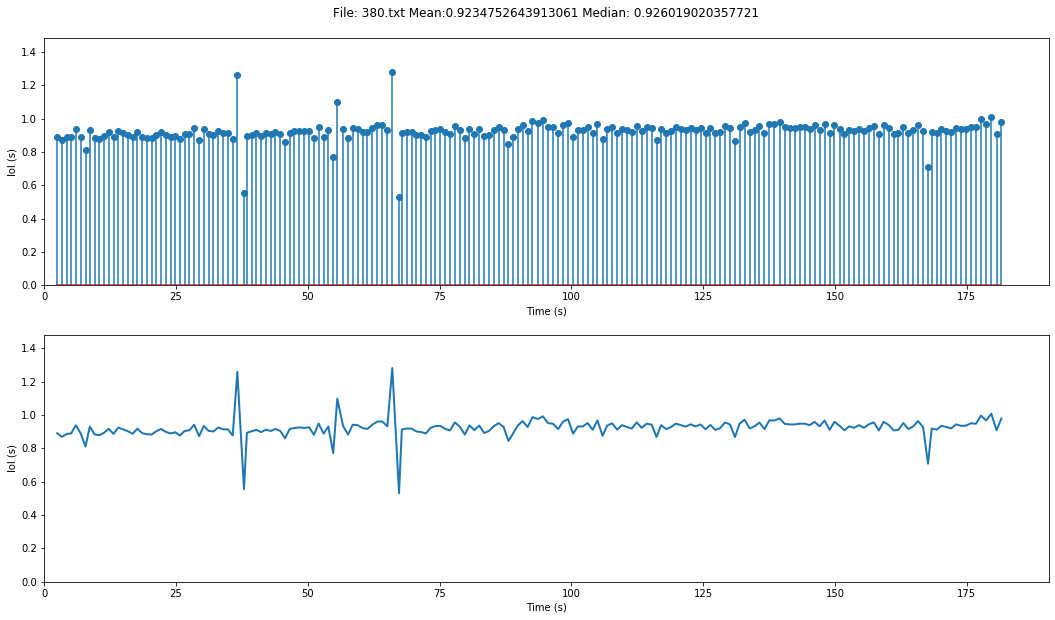

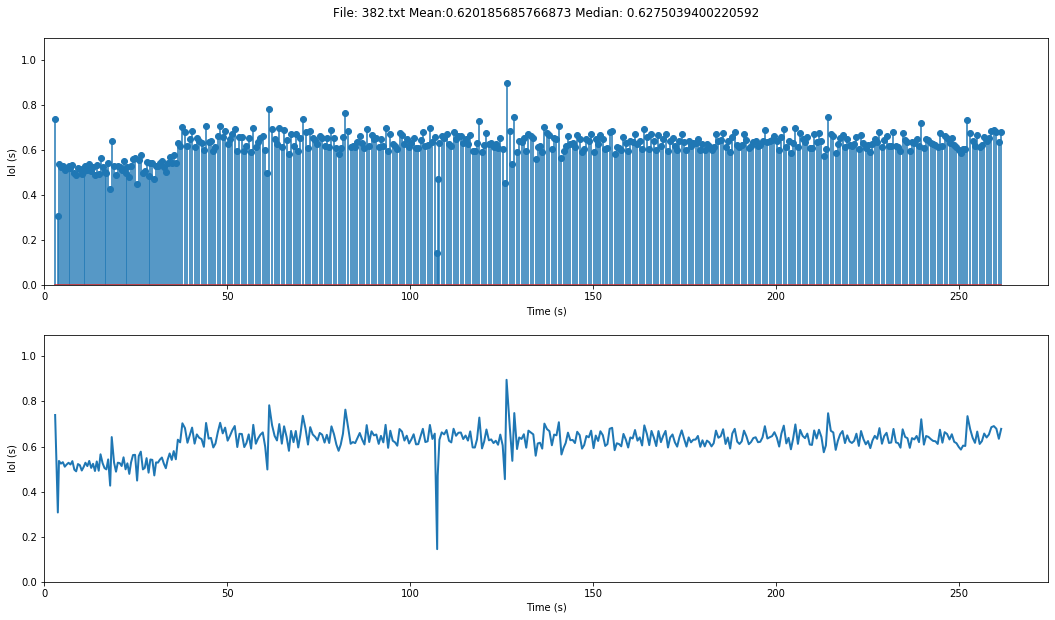

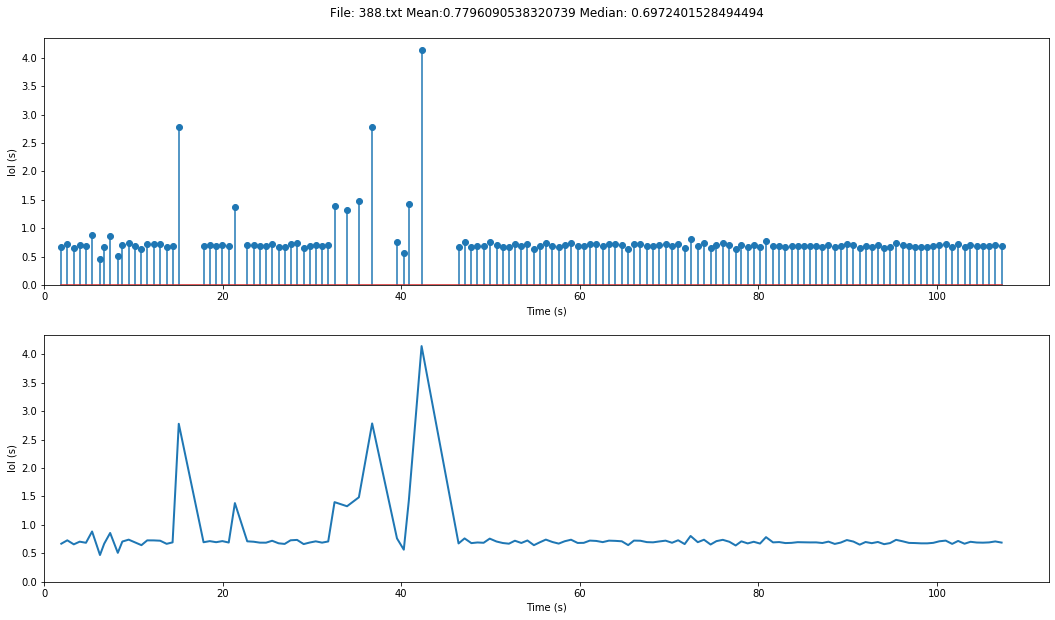

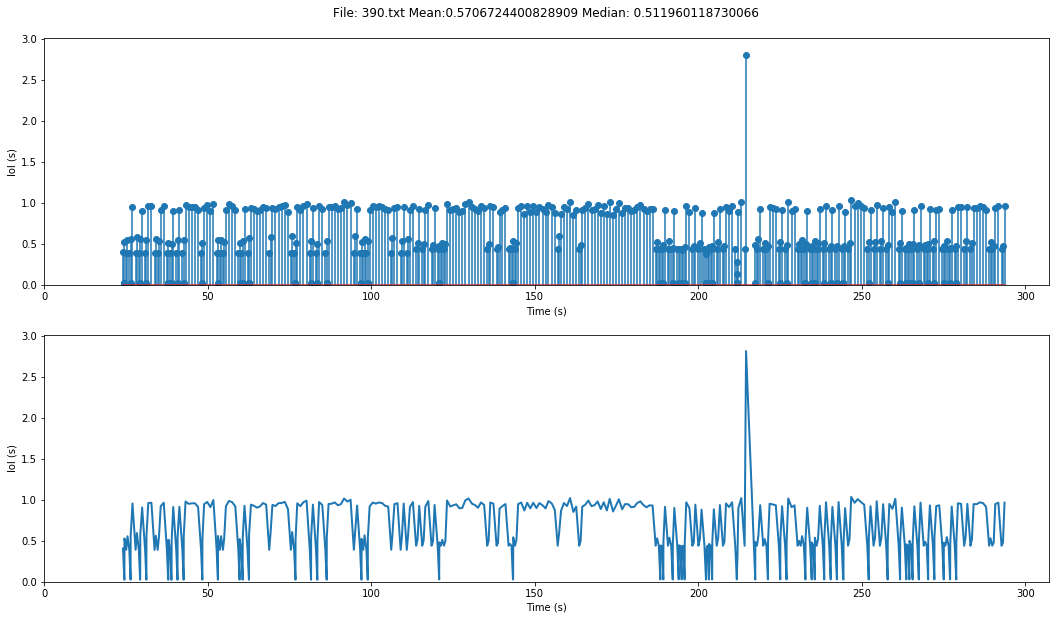

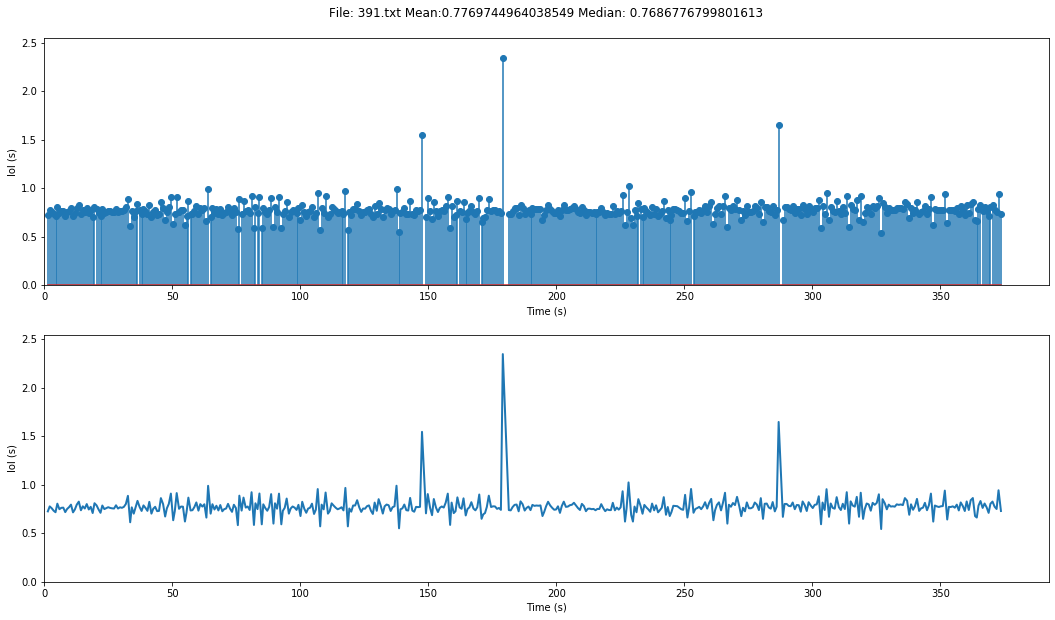

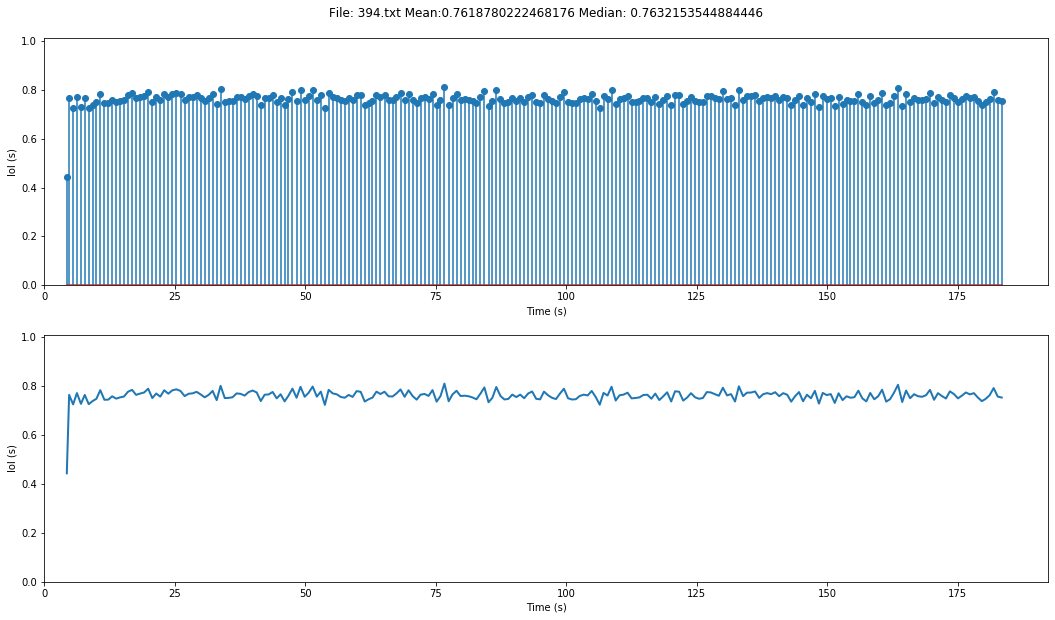

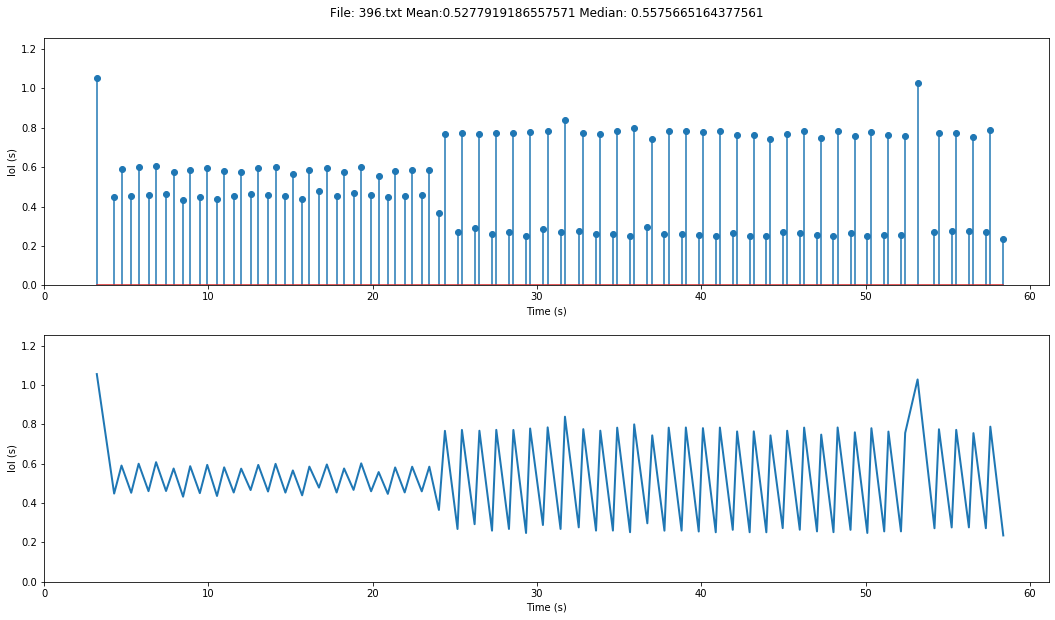

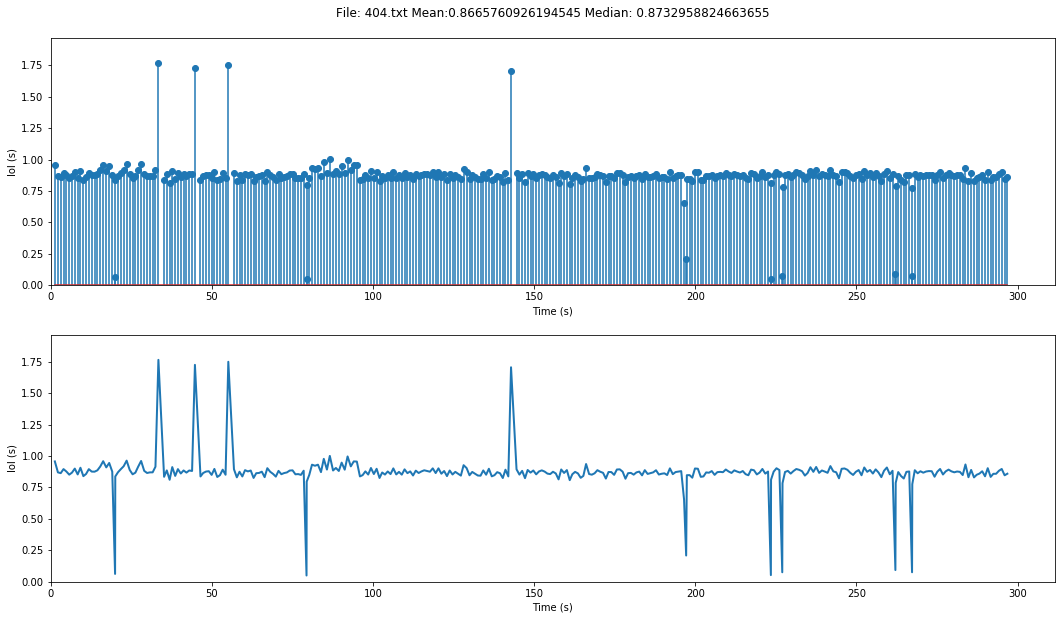

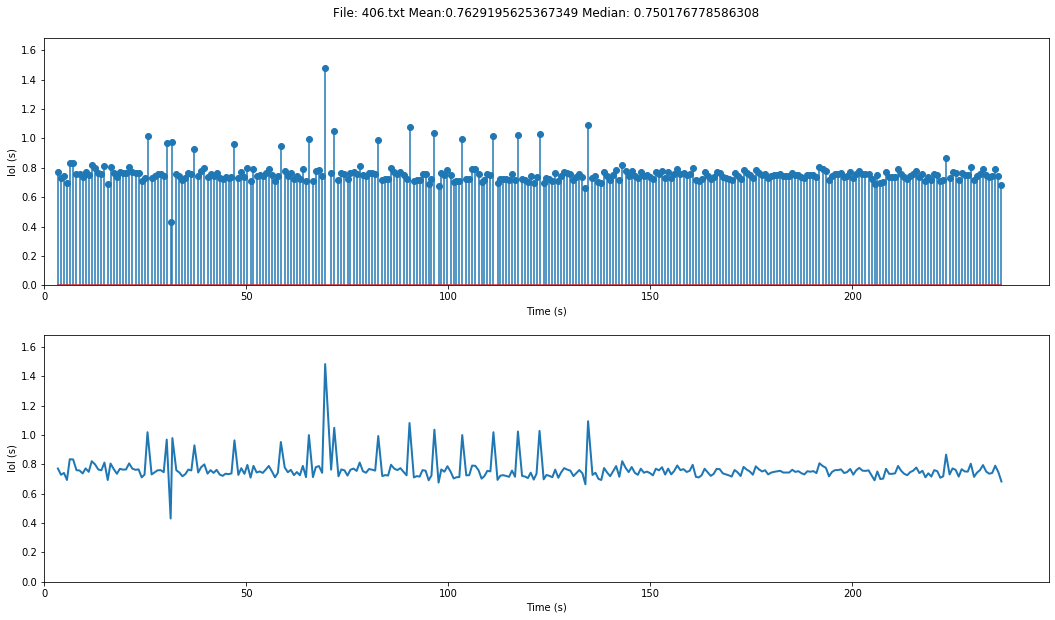

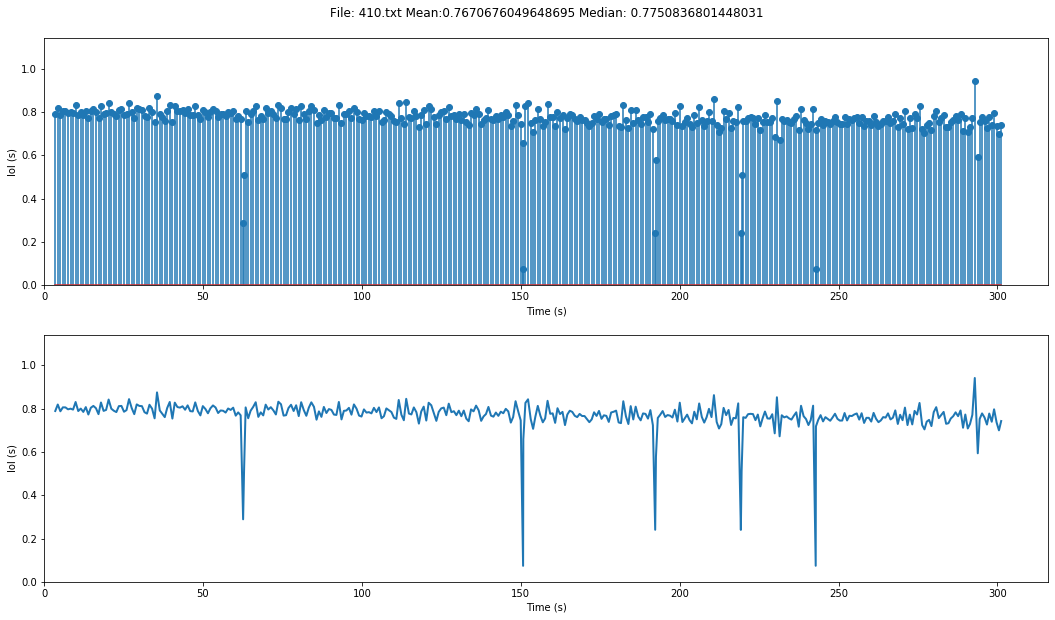

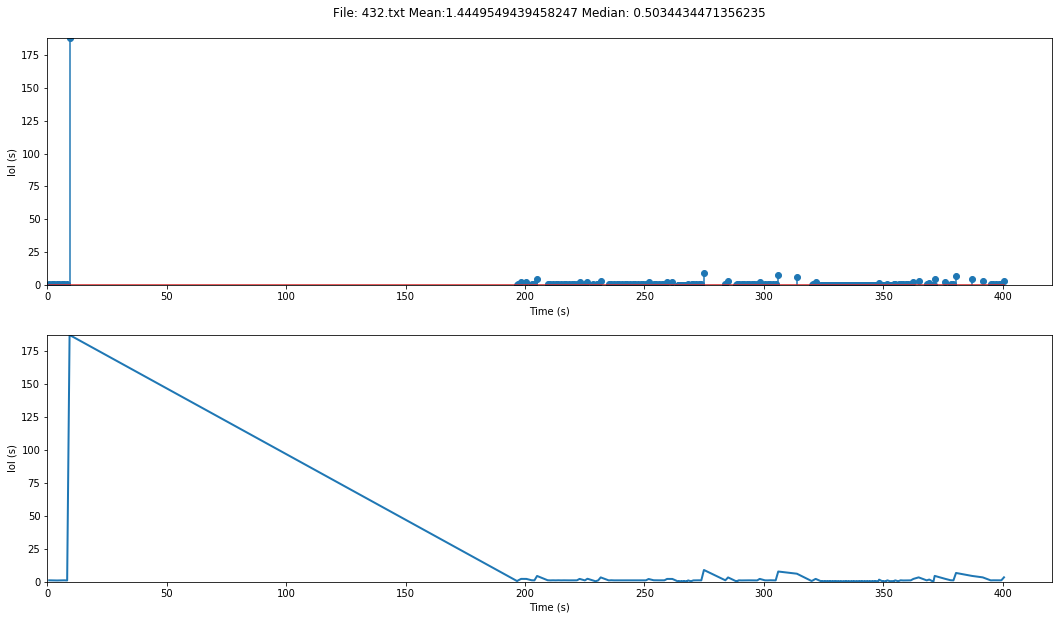

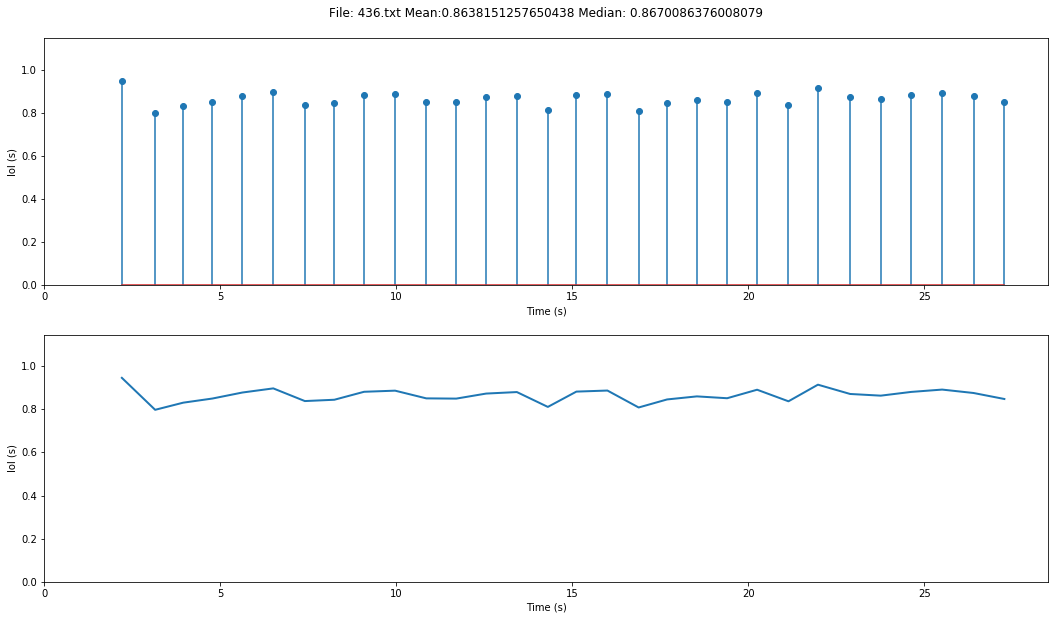

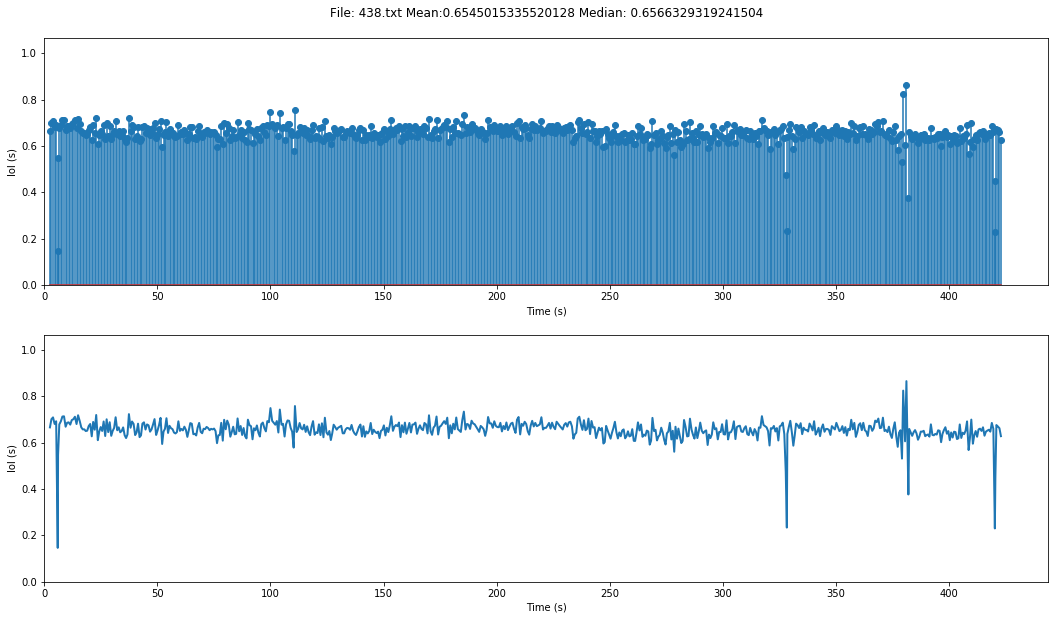

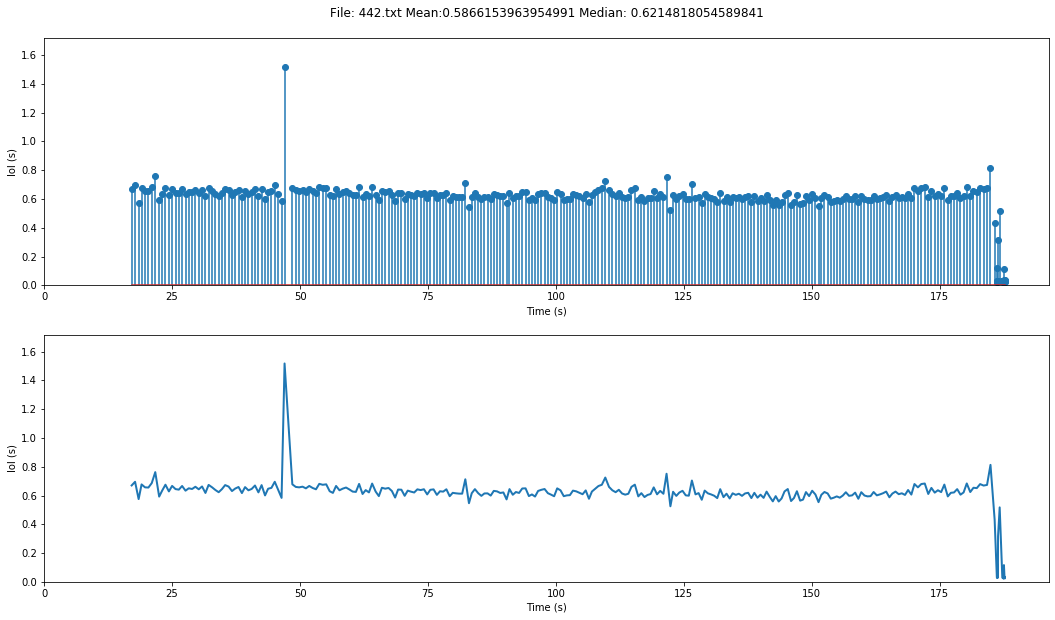

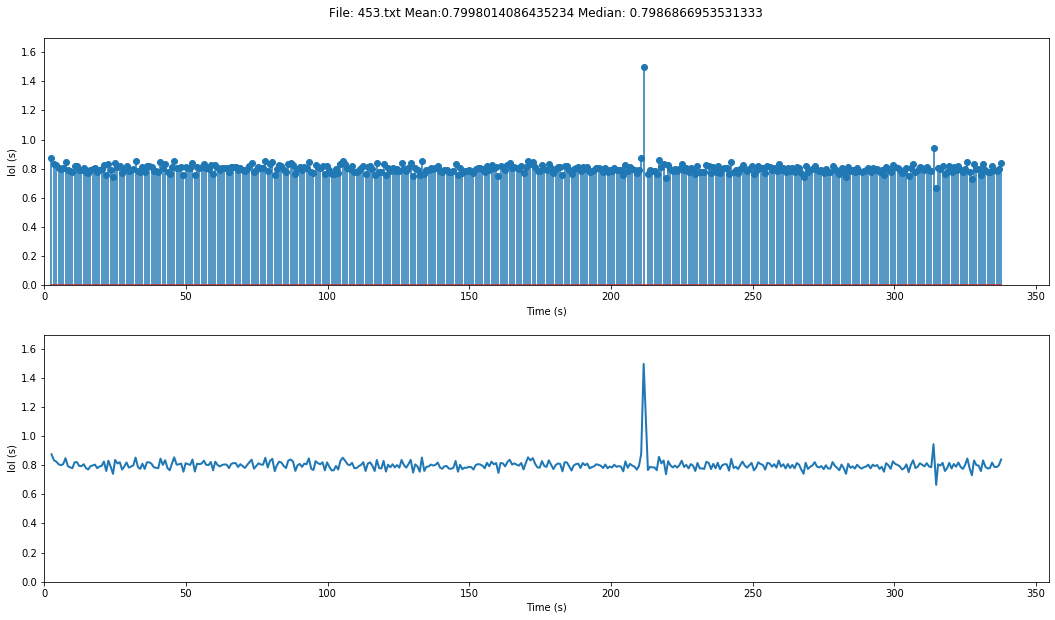

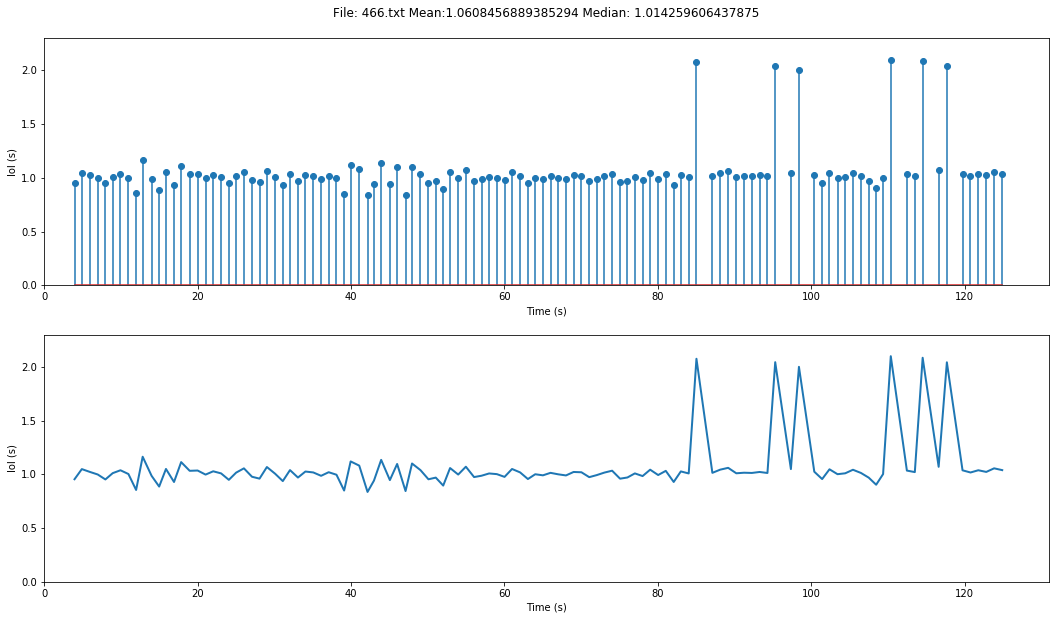

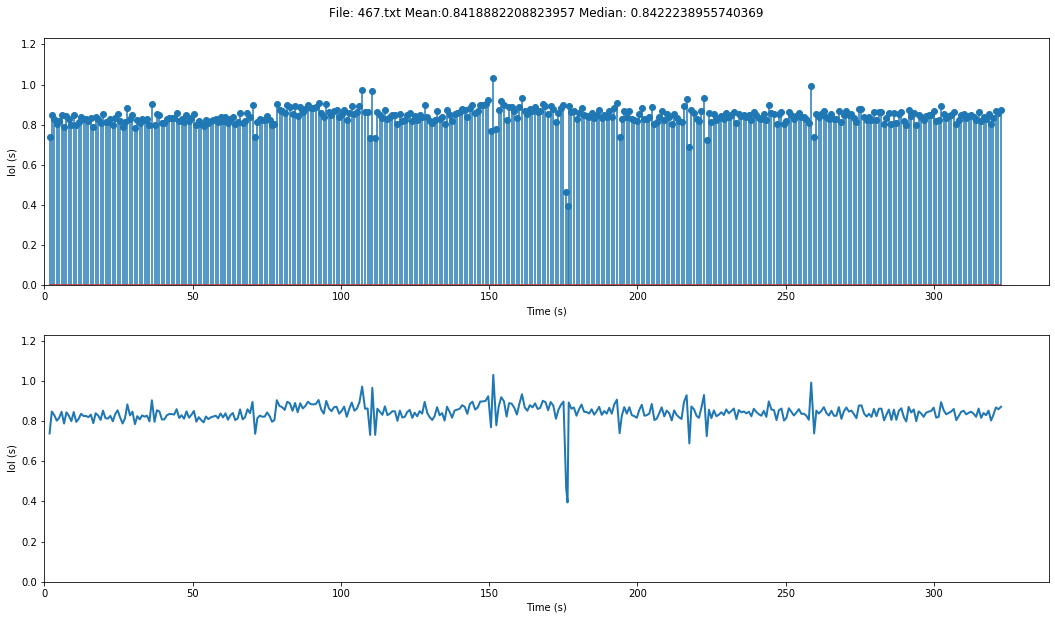

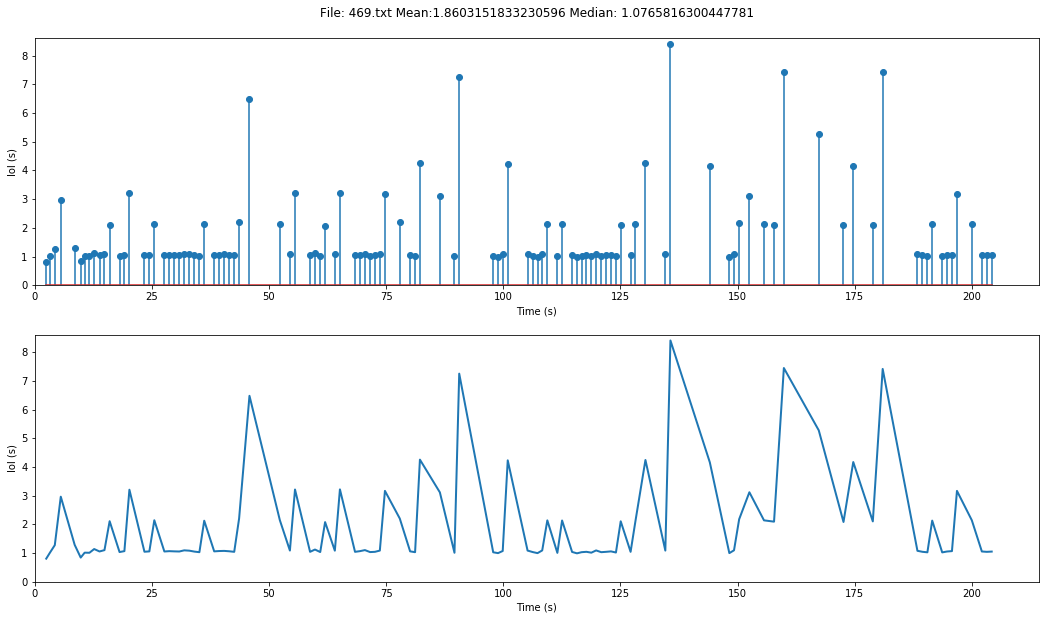

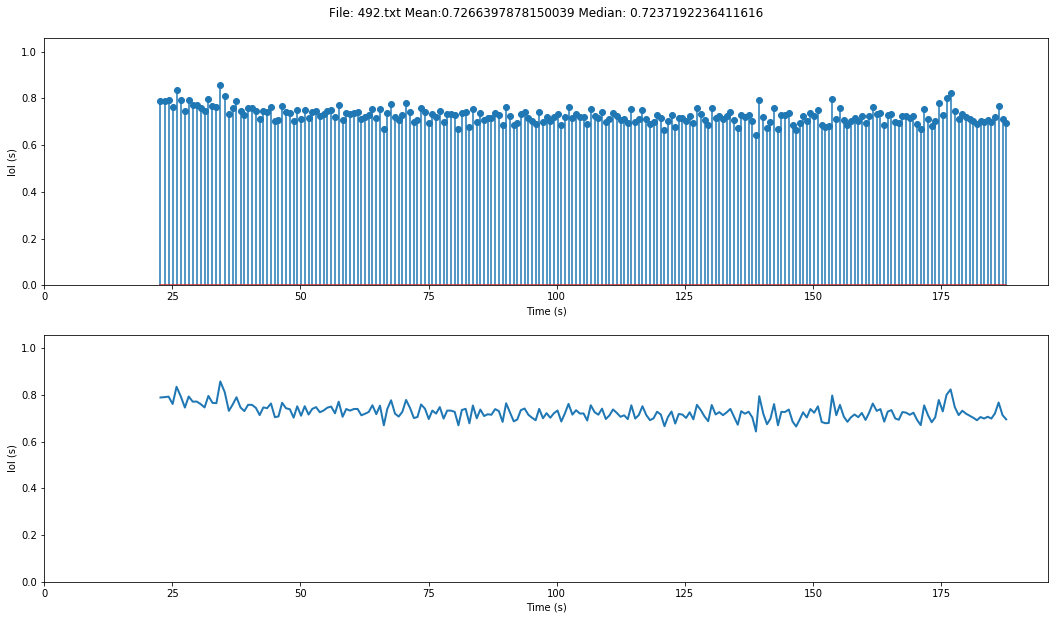

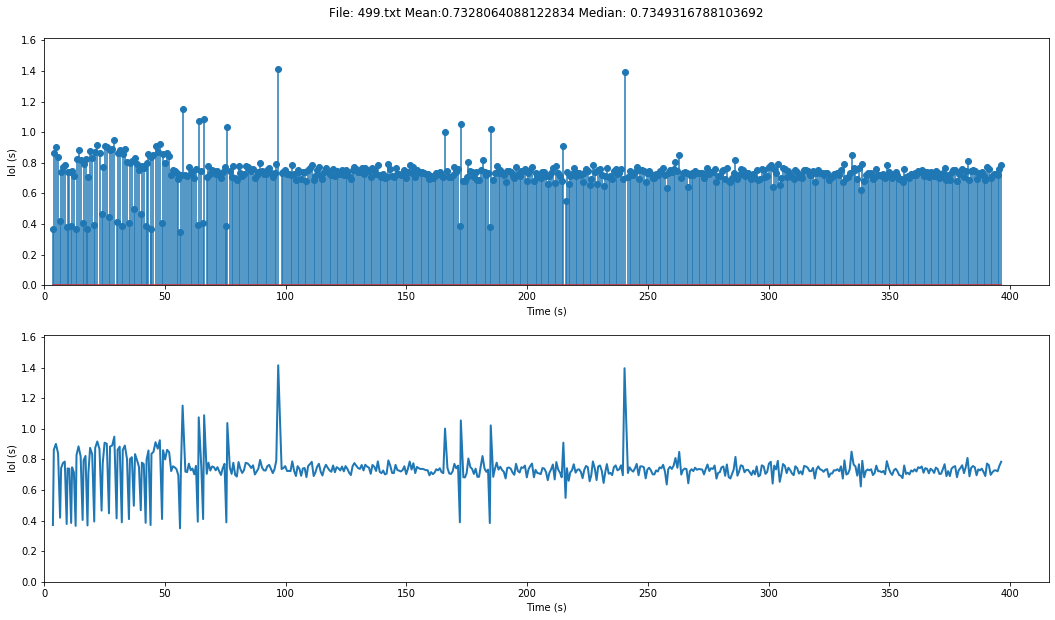

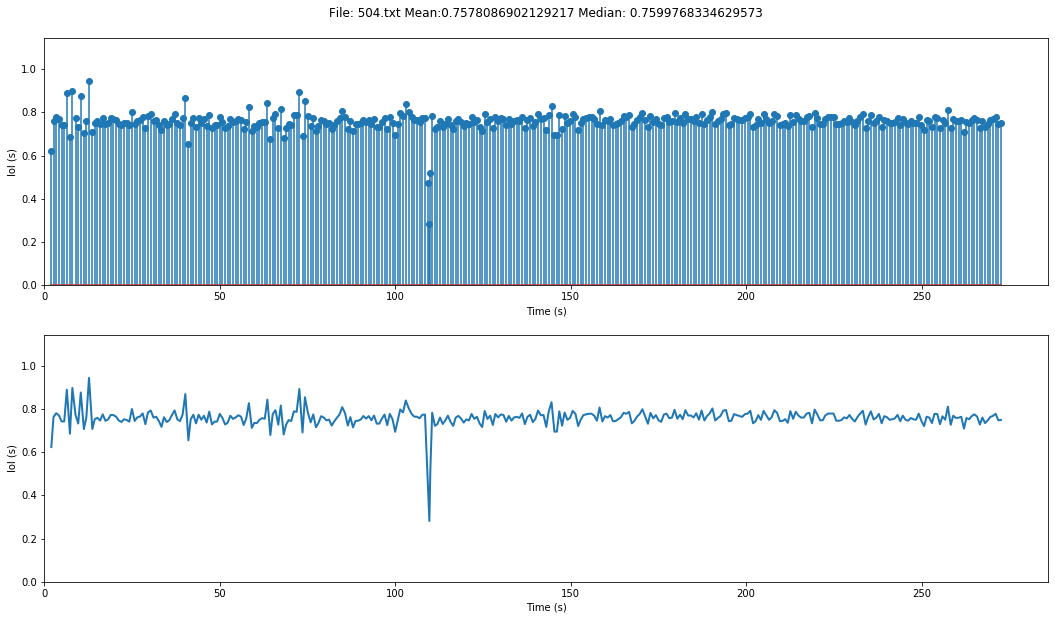

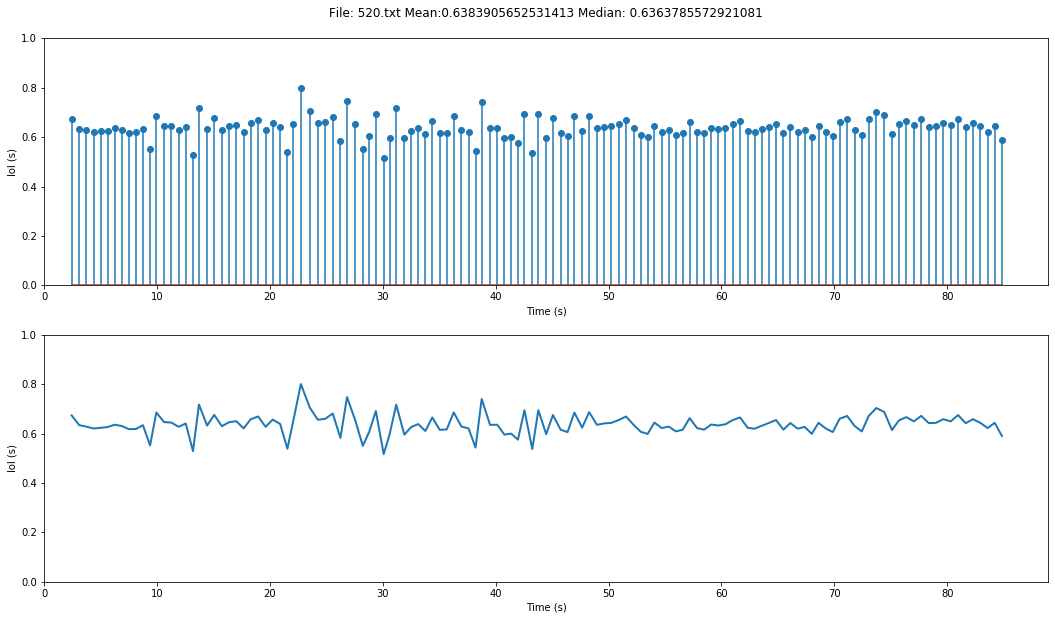

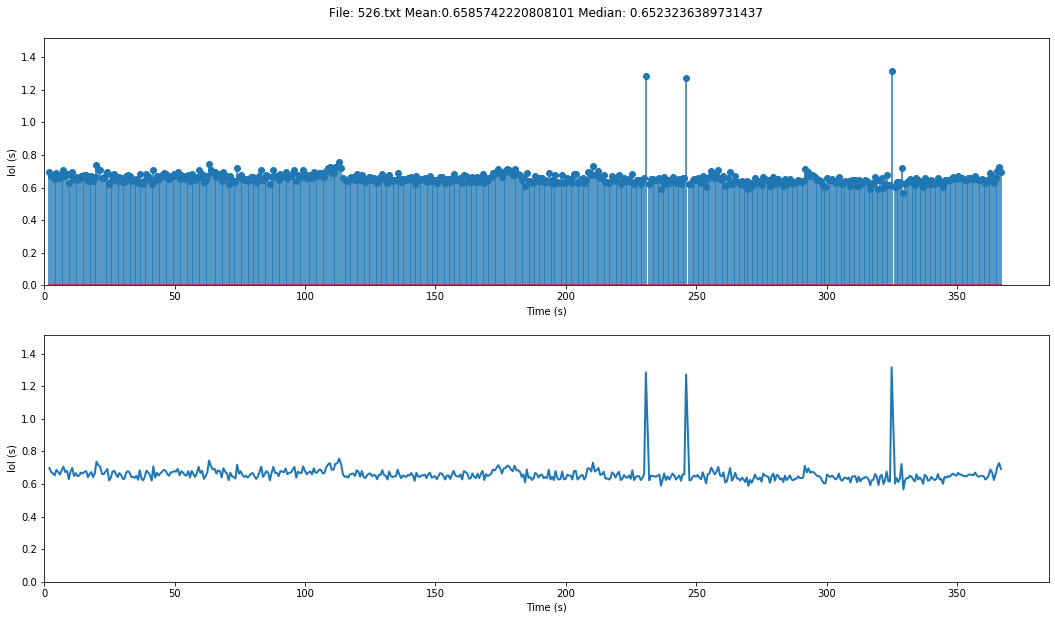

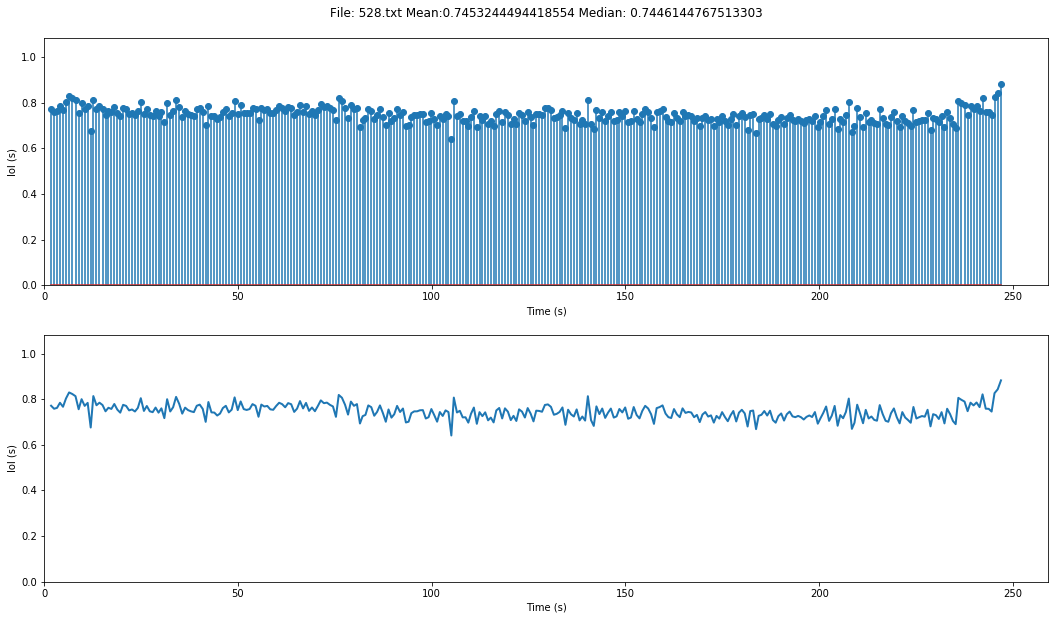

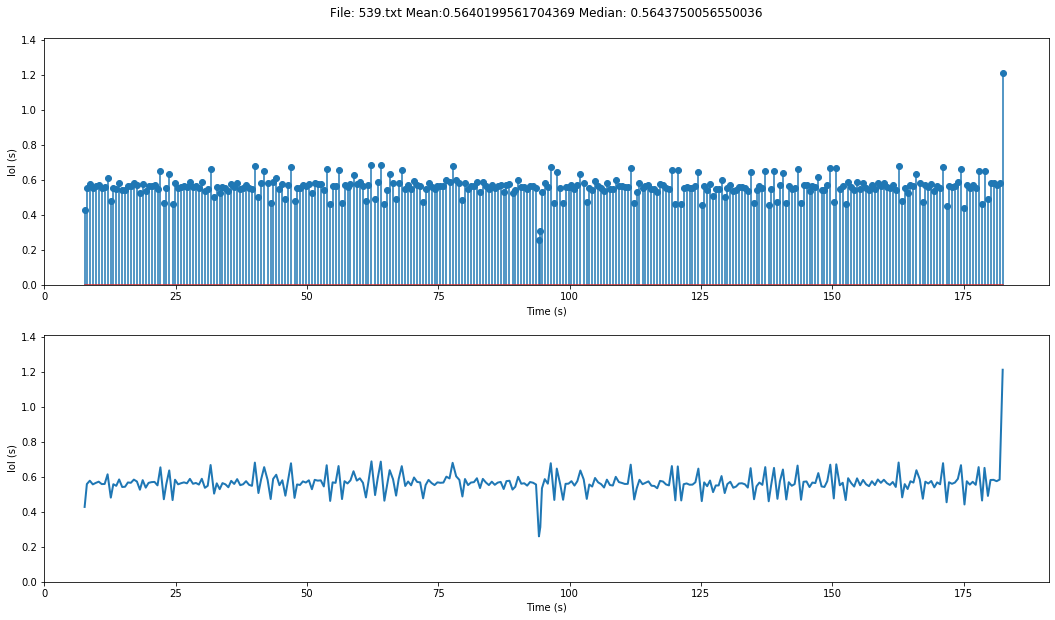

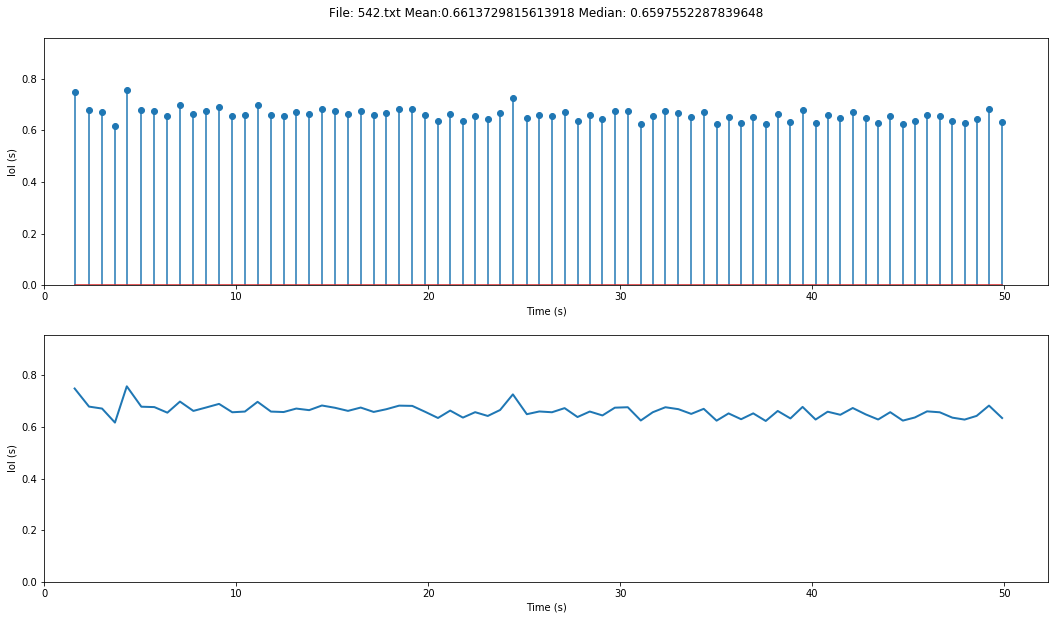

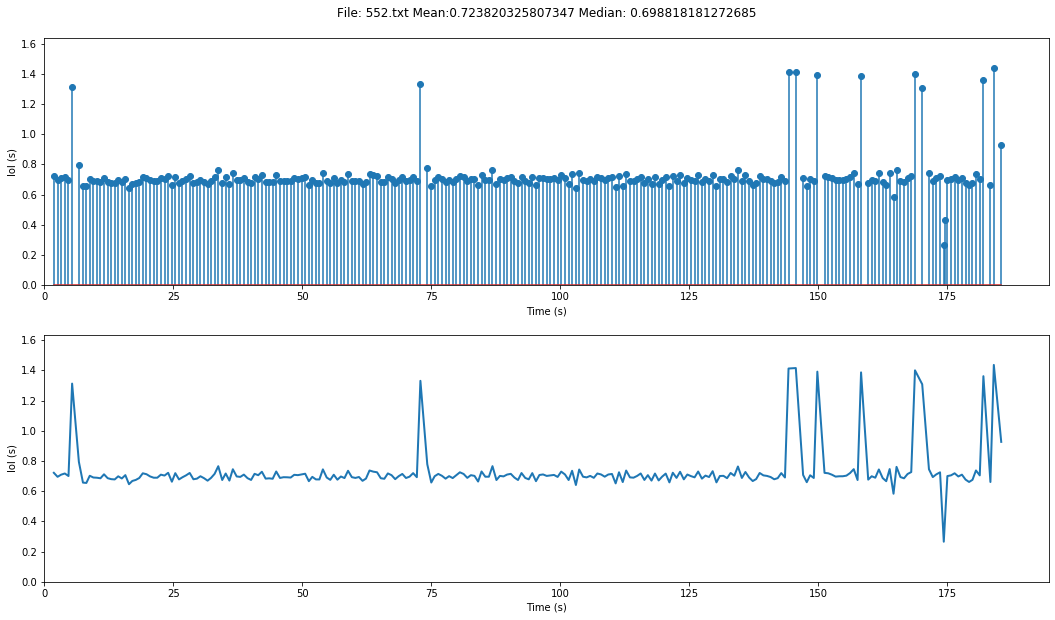

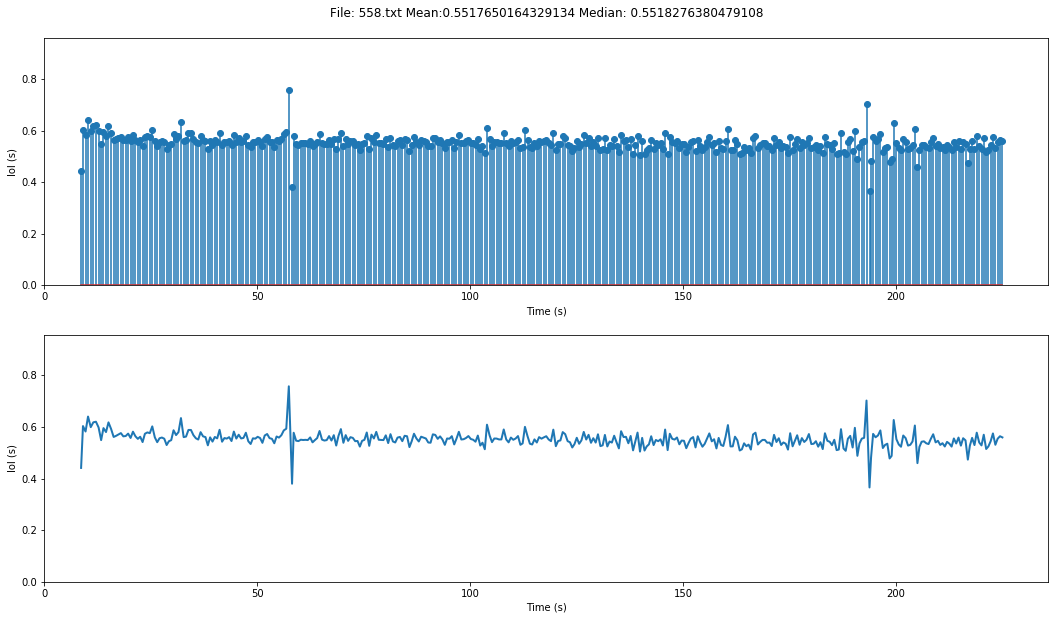

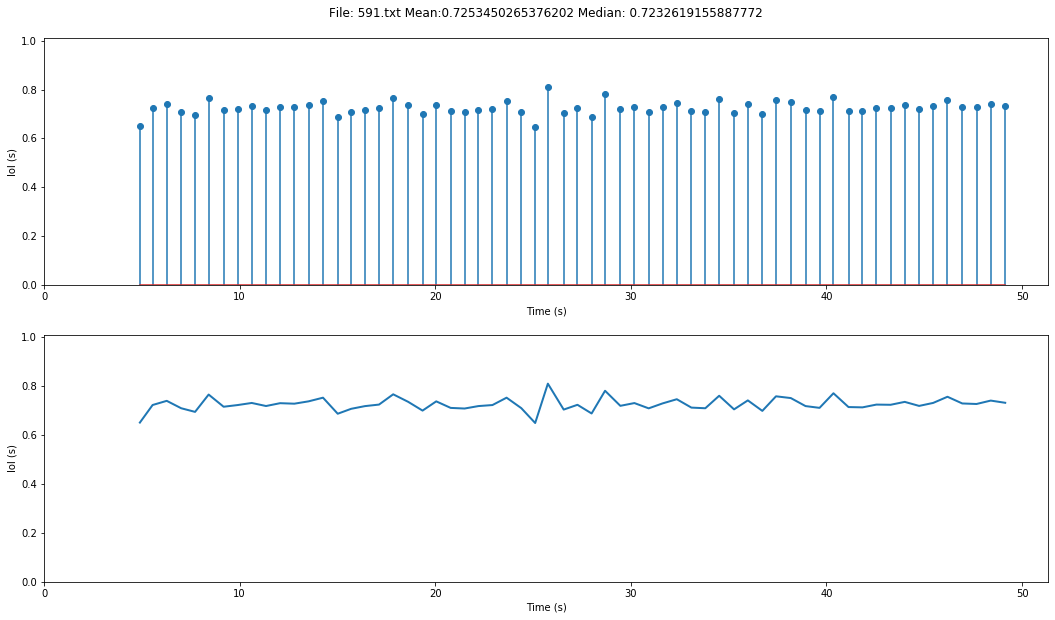

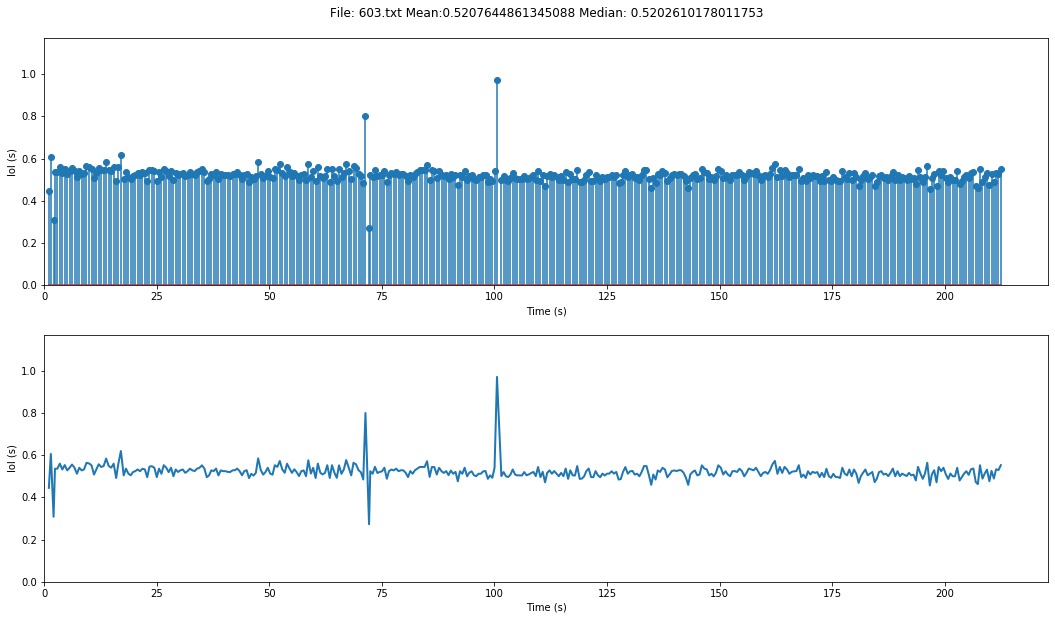

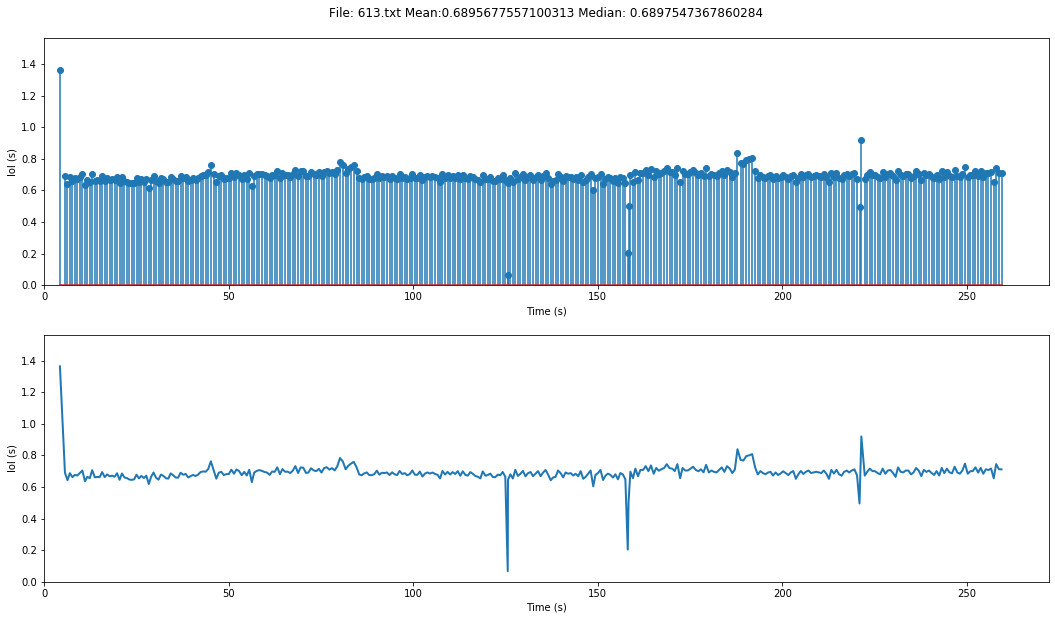

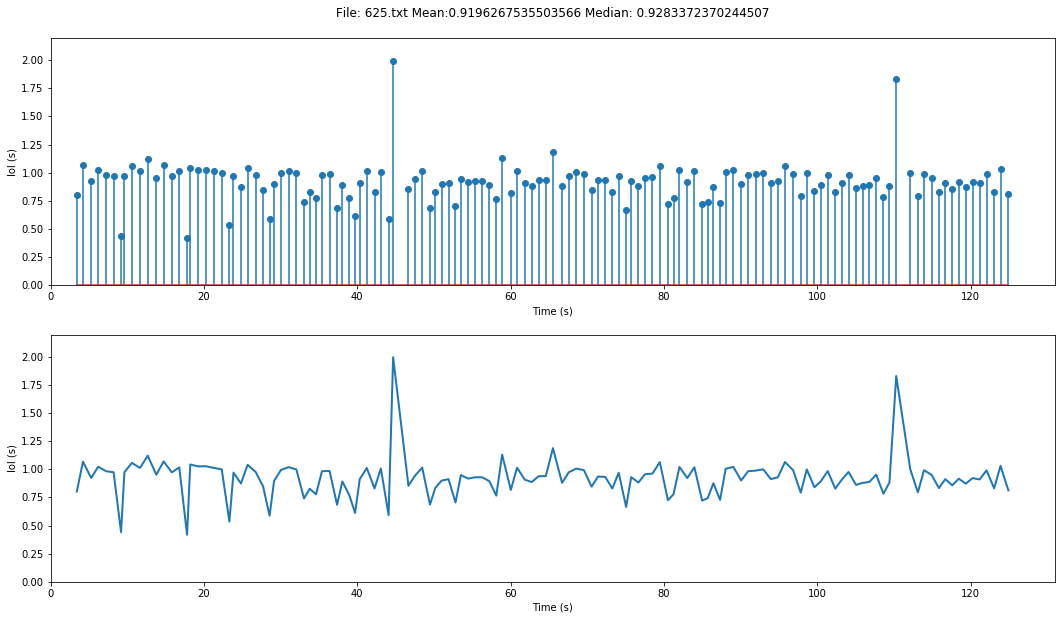

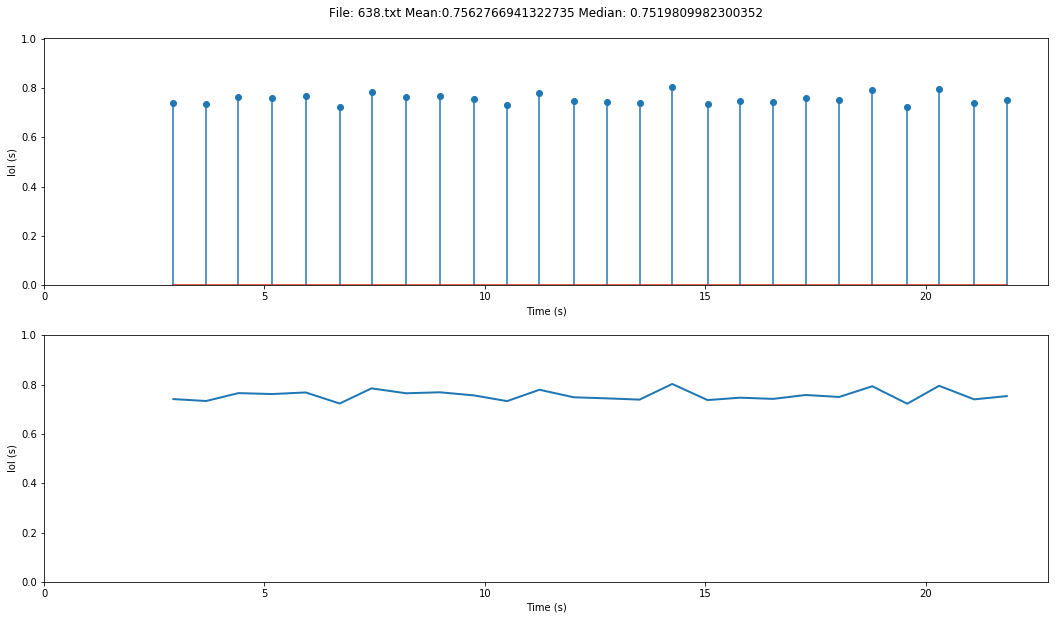

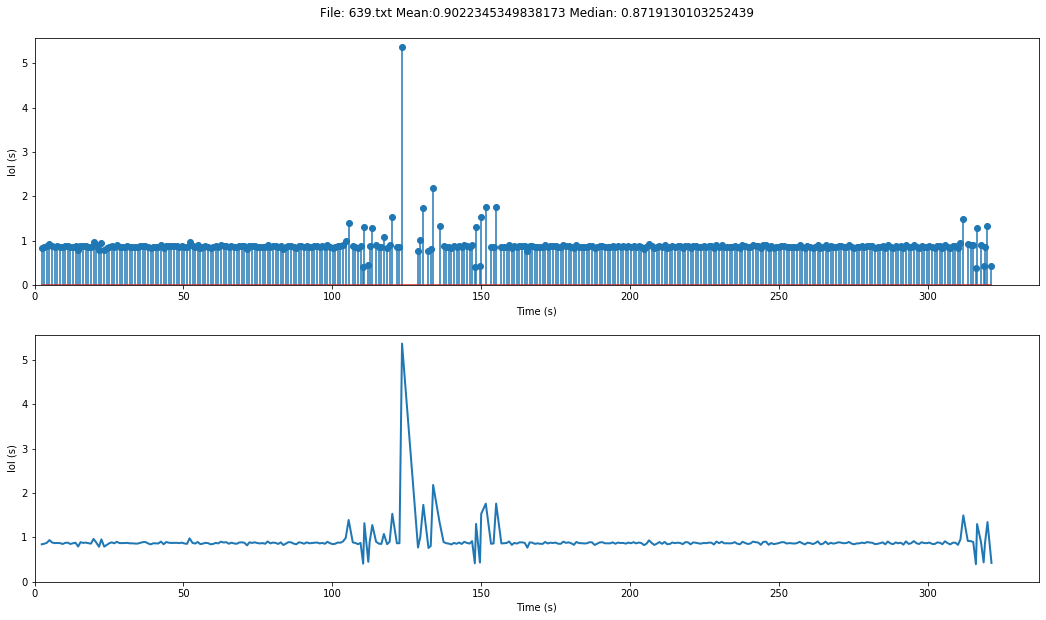

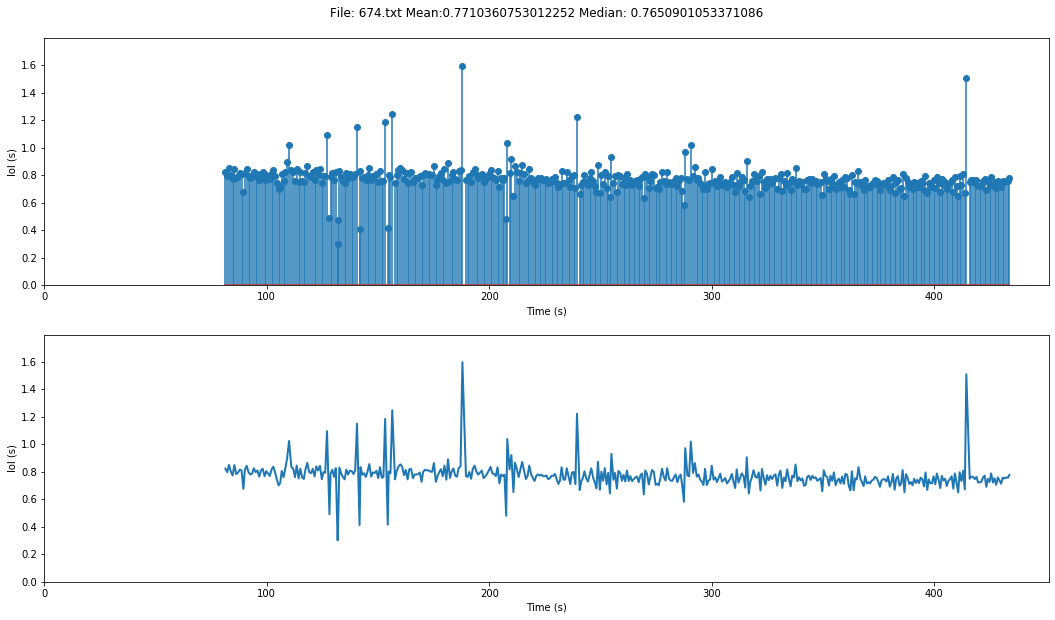

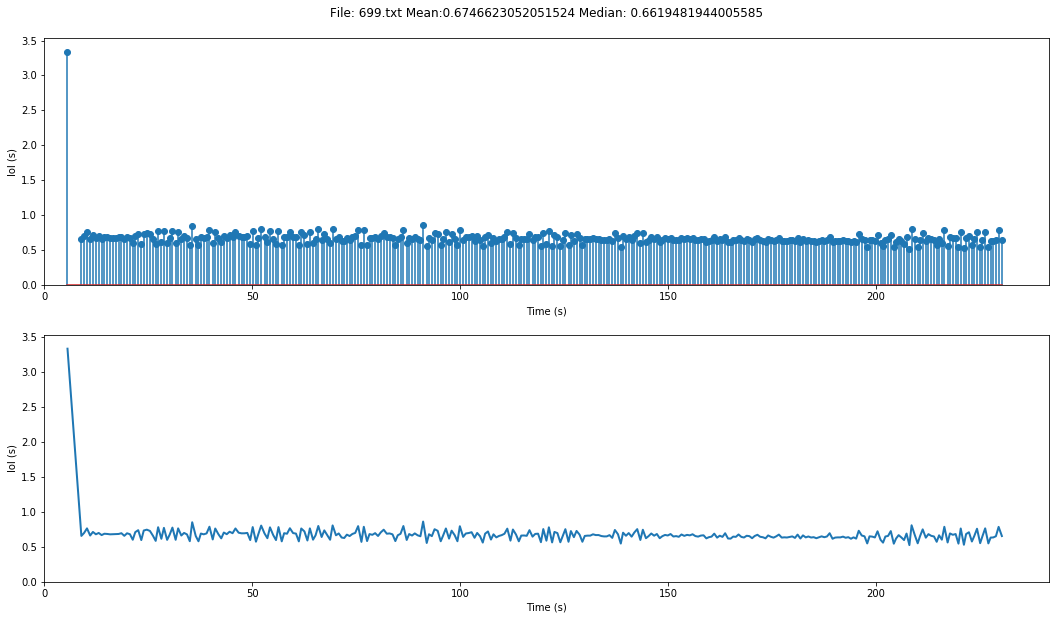

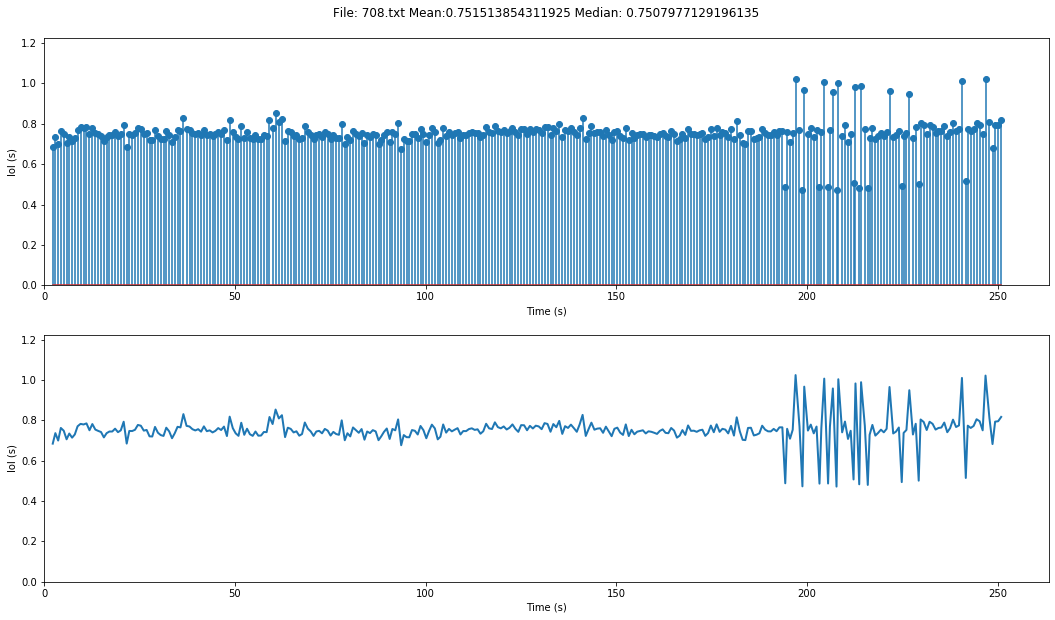

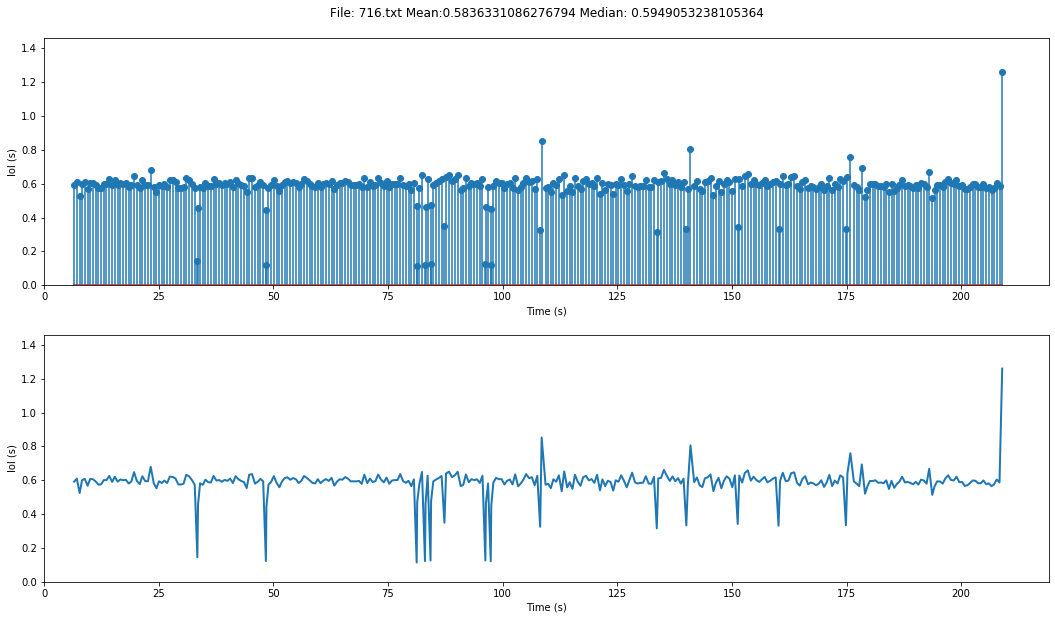

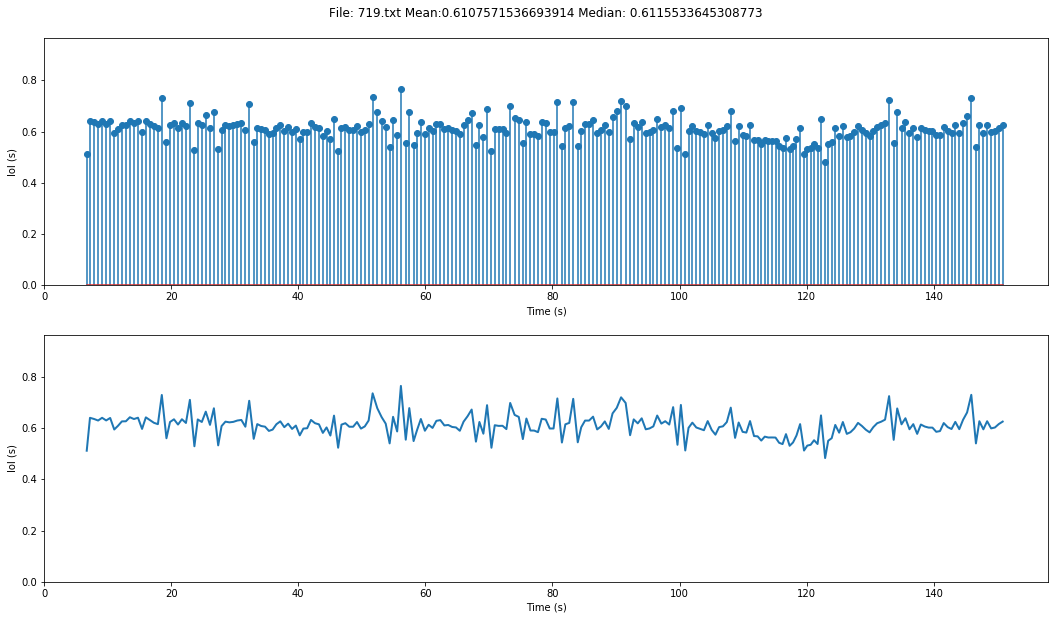

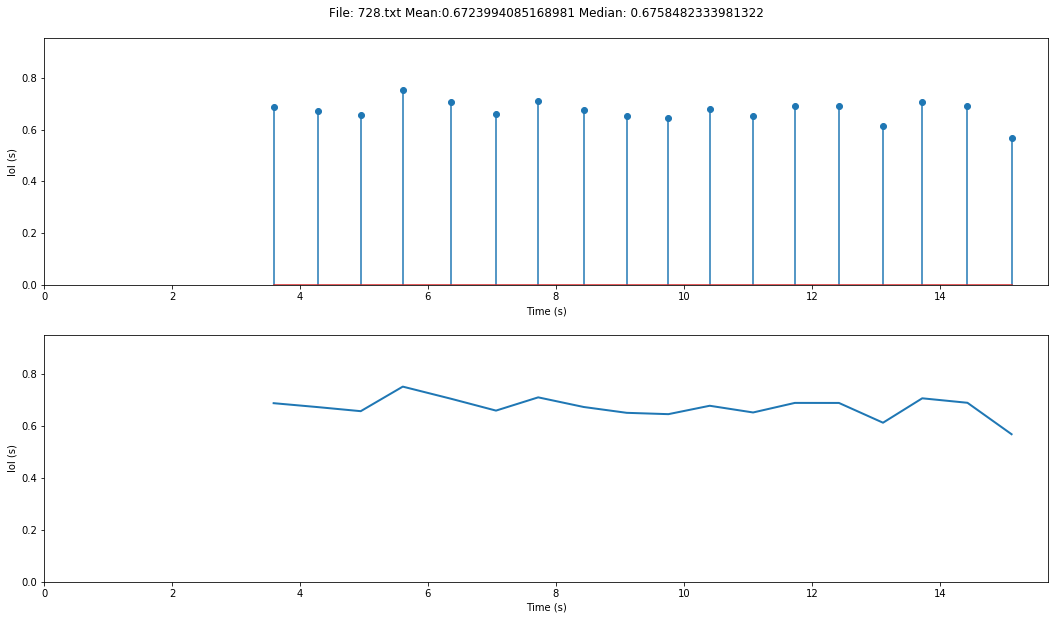

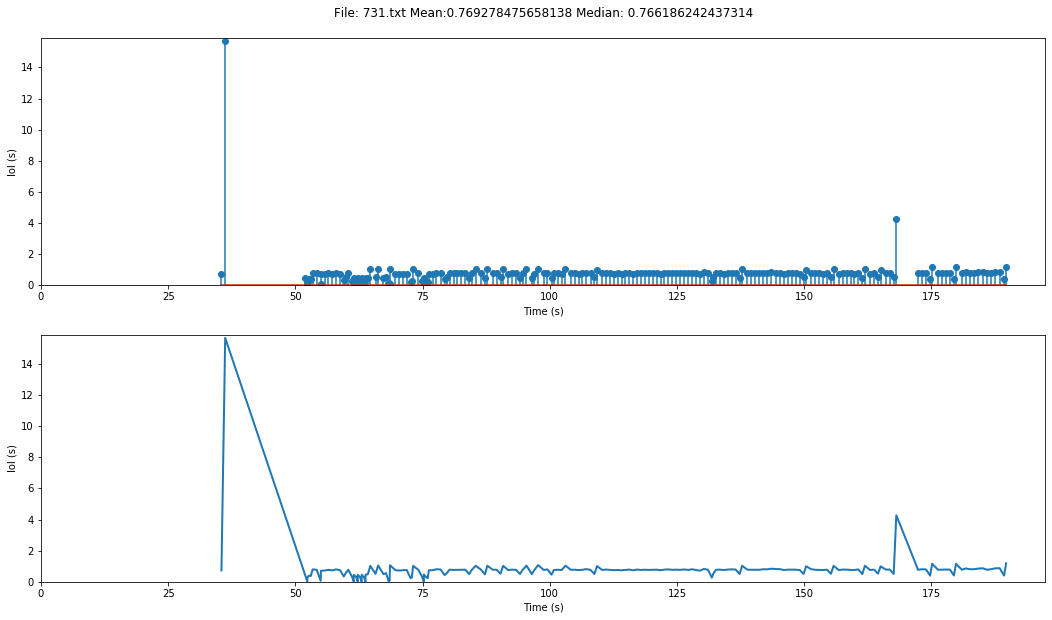

In [6]:
path = "Data/Processed_Songs/"
name_list=listdir(path)
real_songs = {}
for file in name_list:
    x = []
    y = []
    f = open(path+file, "r")
    for row in f:
        num = row.split("\n")[0]
        x.append(float(num))

    i = 0
    while i<len(x):
        if i+1 < len(x):
            y.append(float(x[i+1])-float(x[i]))
        i += 1
    if len(x)-1 > 0:
        del x[len(x)-1]

        real_songs[file] = [x, y]
        fig, (ax1, ax2) = plt.subplots(2,1, figsize = (18,10))

        ax1.stem(x, y, use_line_collection=True)

        ax1.set_xlim(left=0)
        ax1.set_ylim(bottom=0, top=max(y)+0.2)

        ax2.plot(x, y, '-', lw=2)
        ax2.set_xlim(left=0)
        ax2.set_ylim(bottom=0, top=max(y)+0.2)


        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('IoI (s)')

        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('IoI (s)')

        ax1.set_title("File: "+file+" Mean:"+str(mean(y))+" Median: "+str(median(y))+"\n")

        plt.show()

## Data cleaning using median

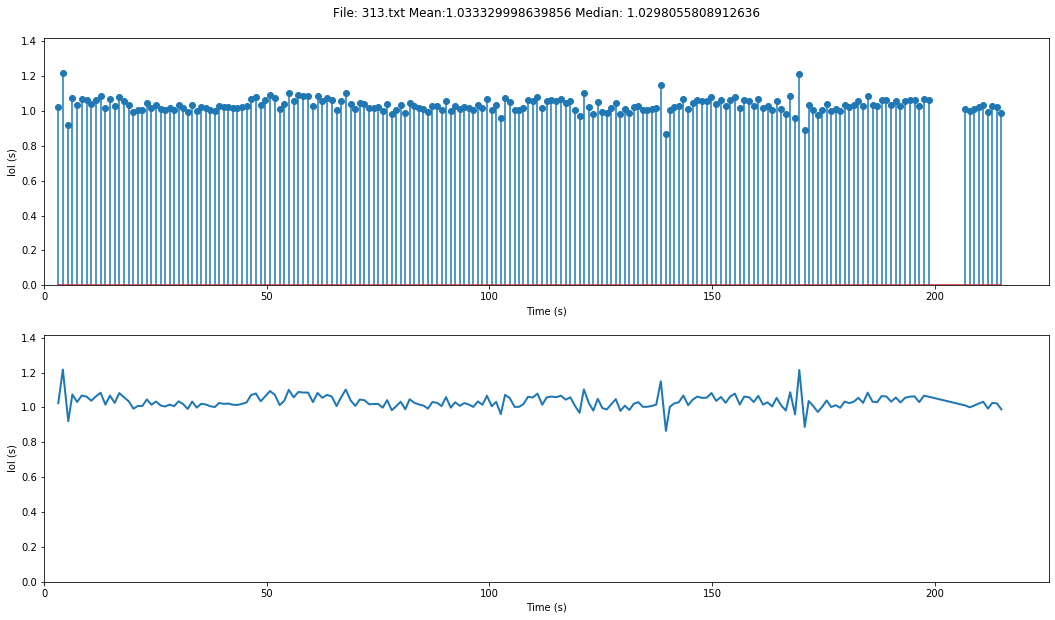

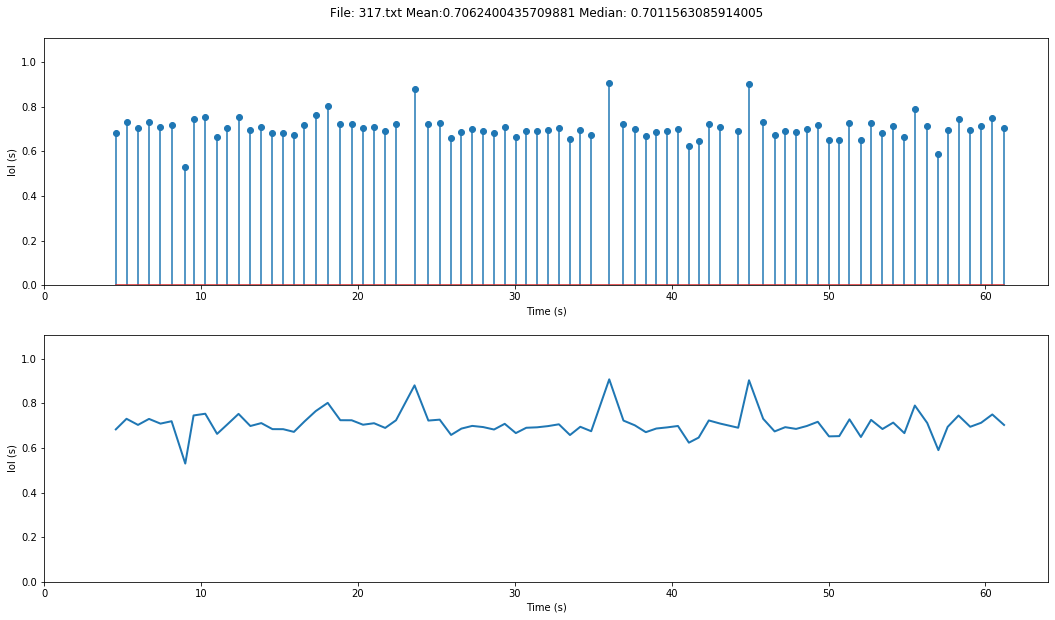

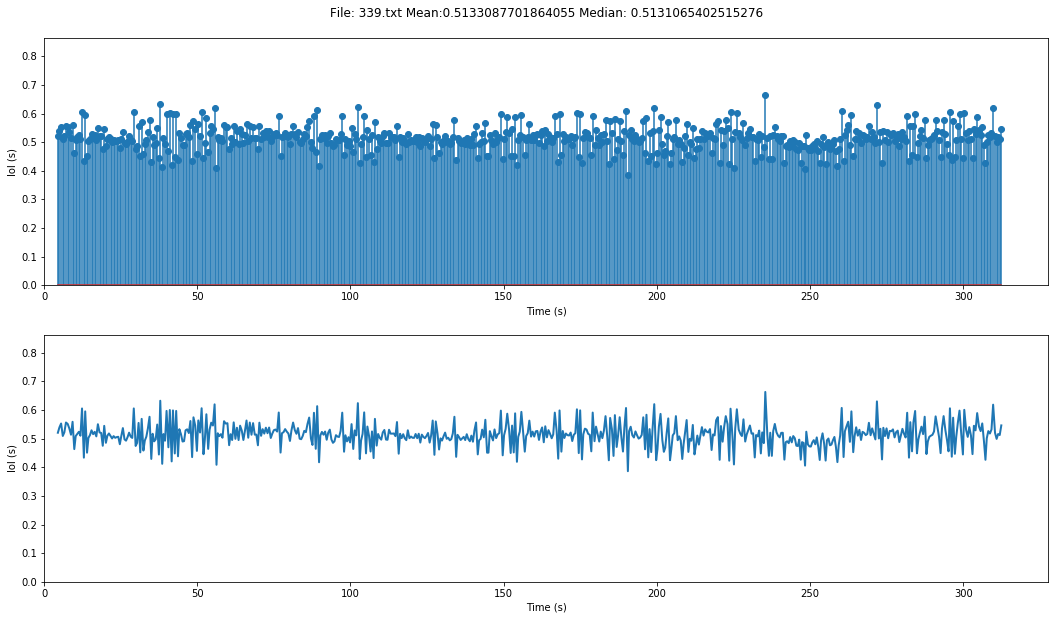

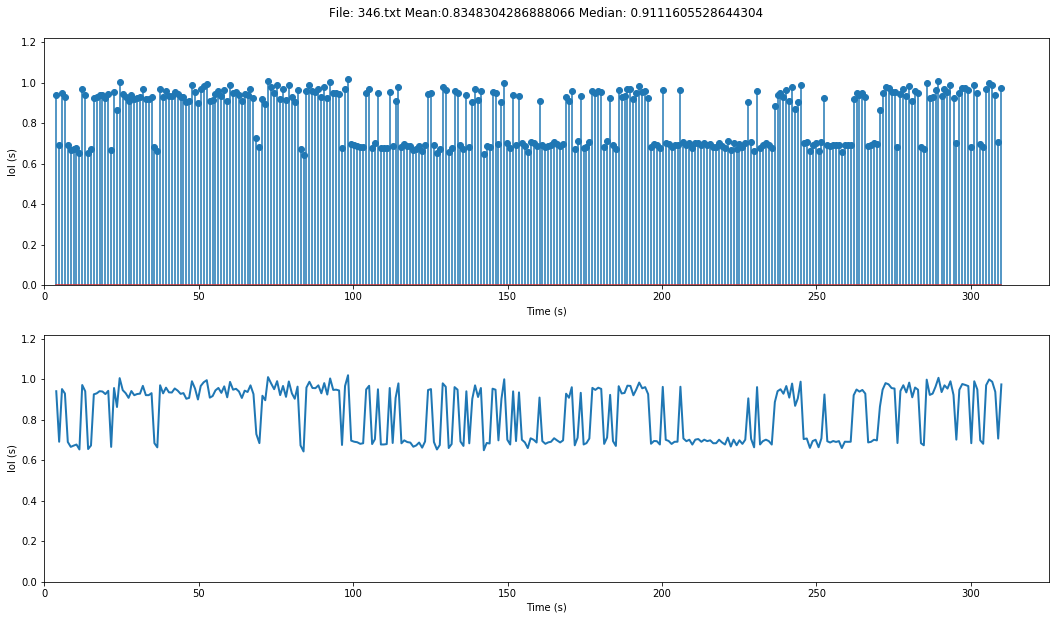

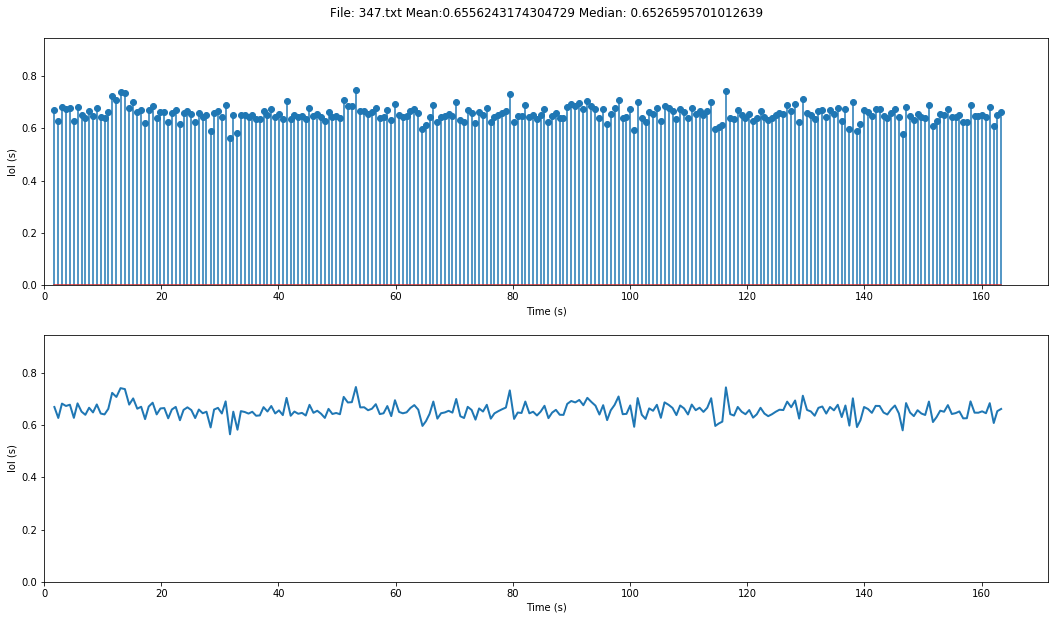

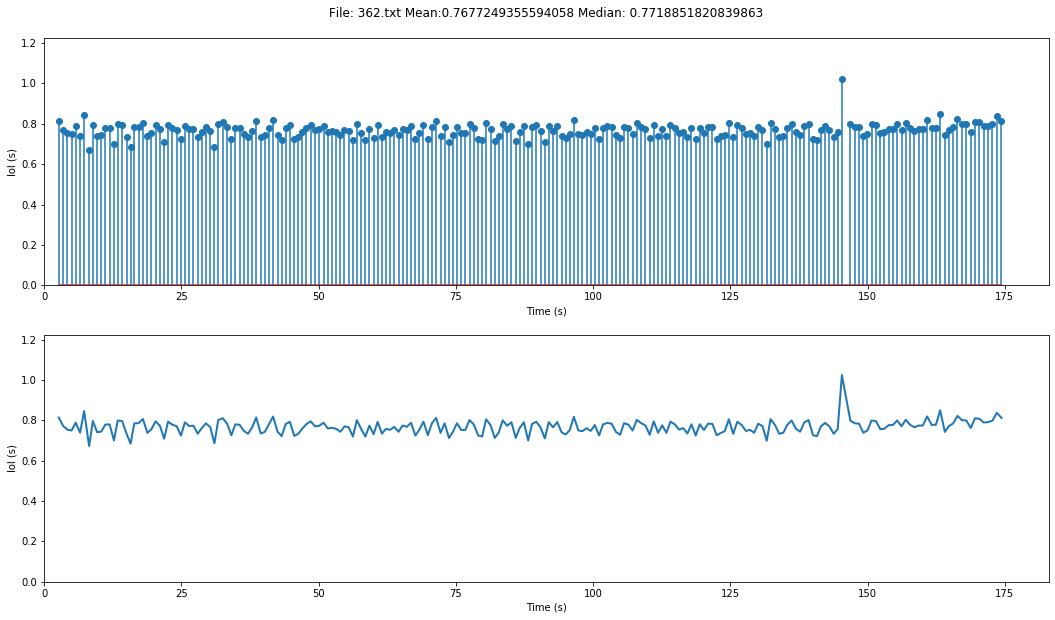

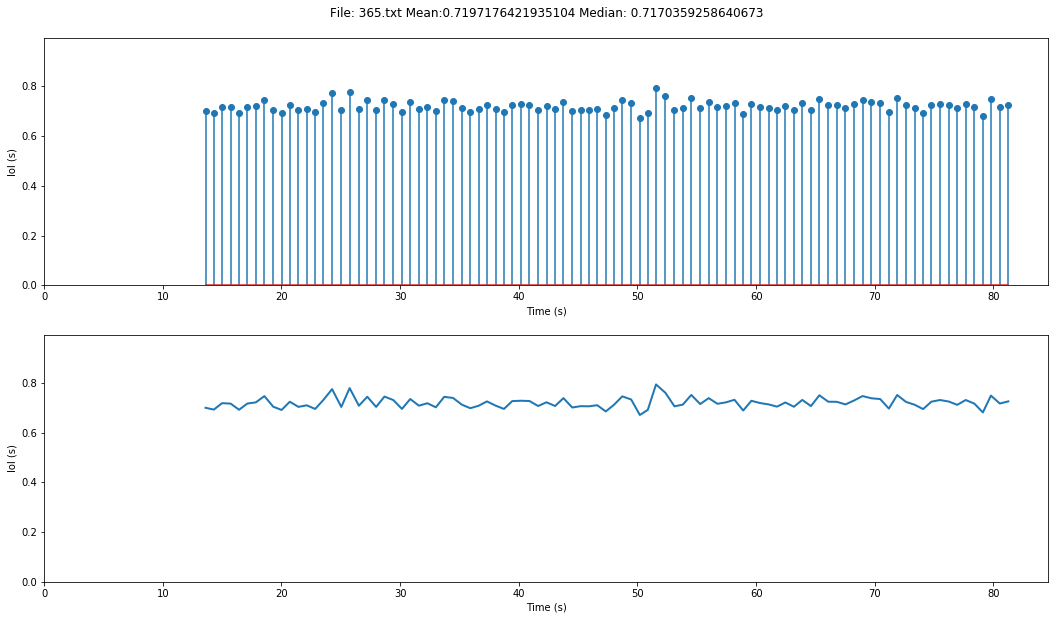

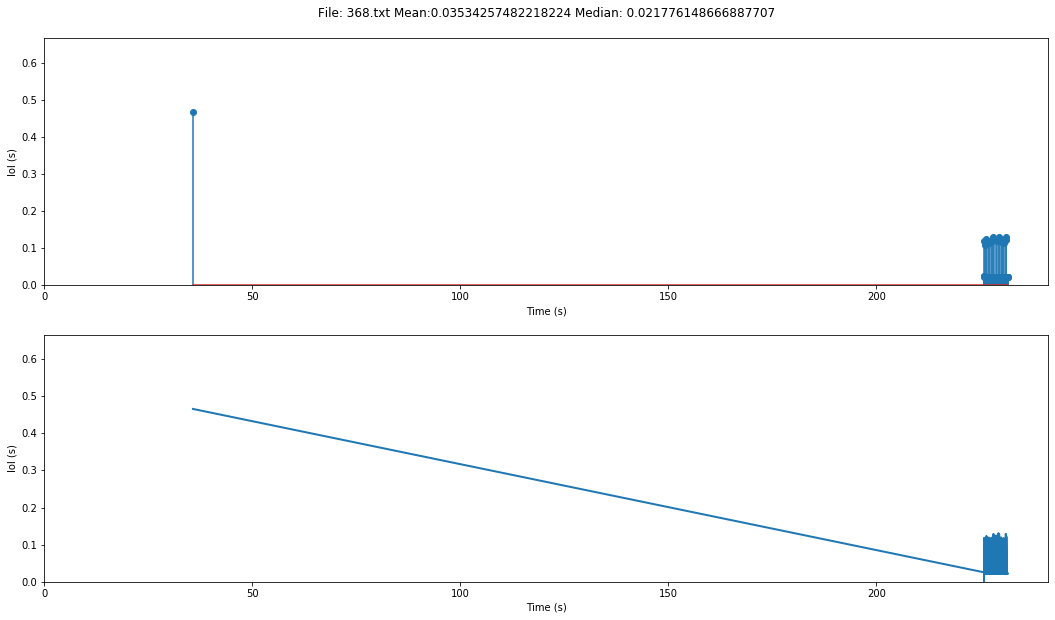

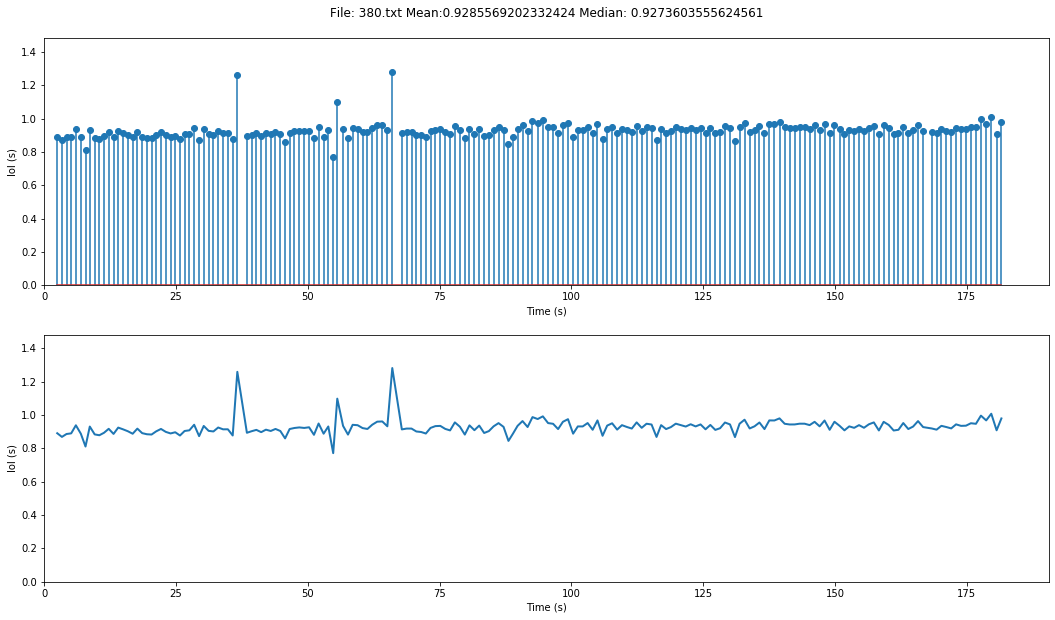

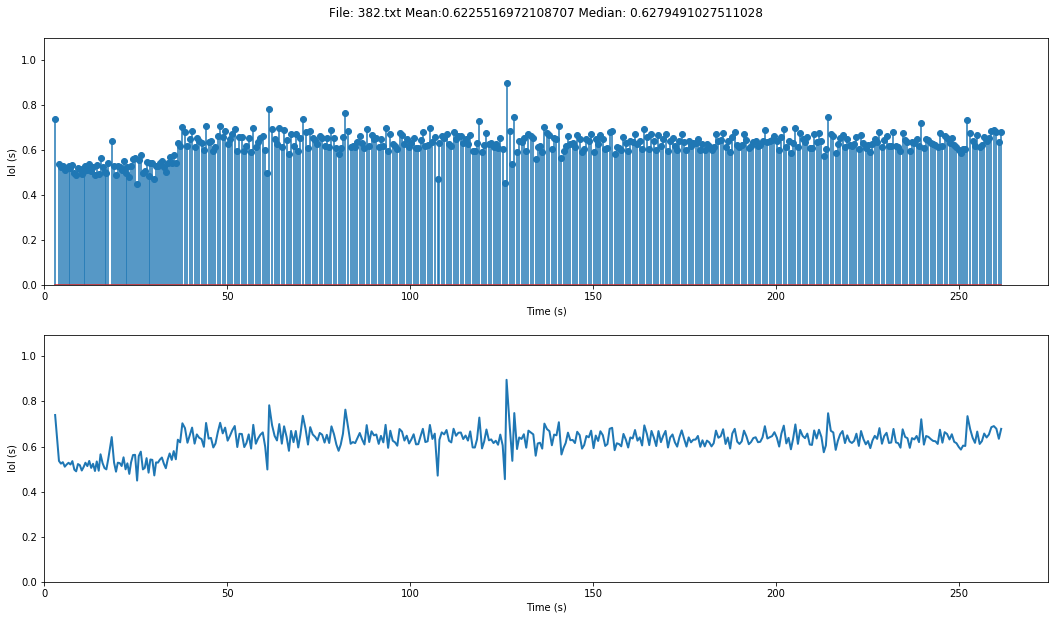

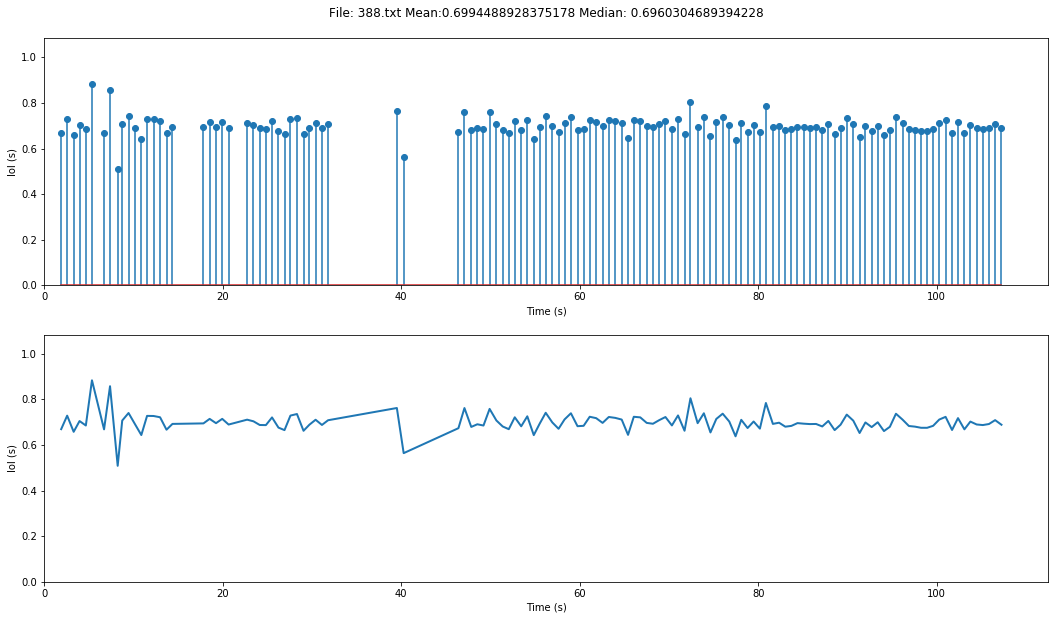

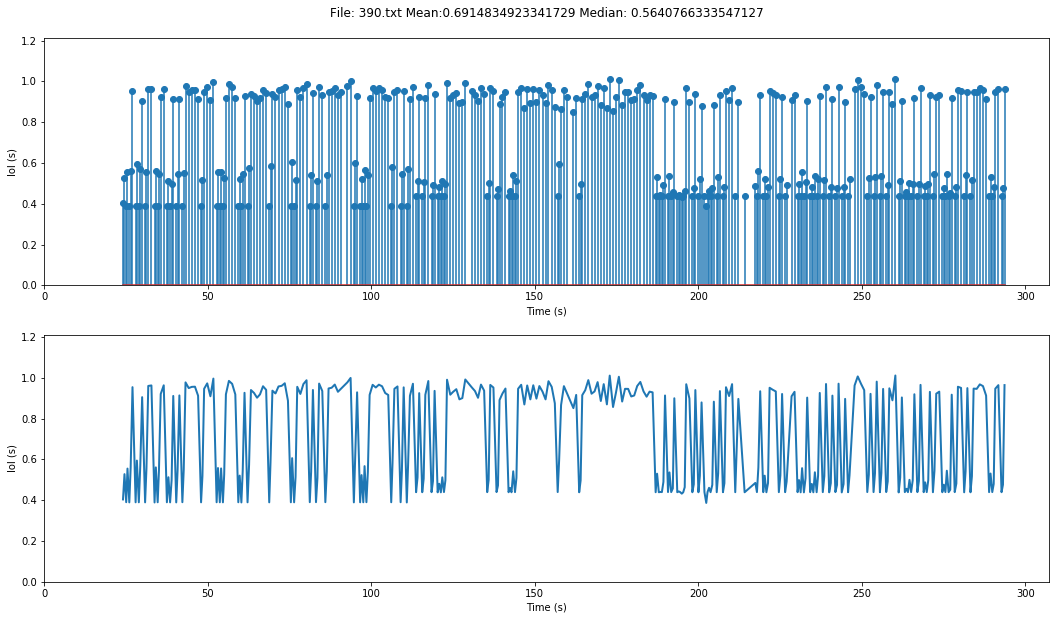

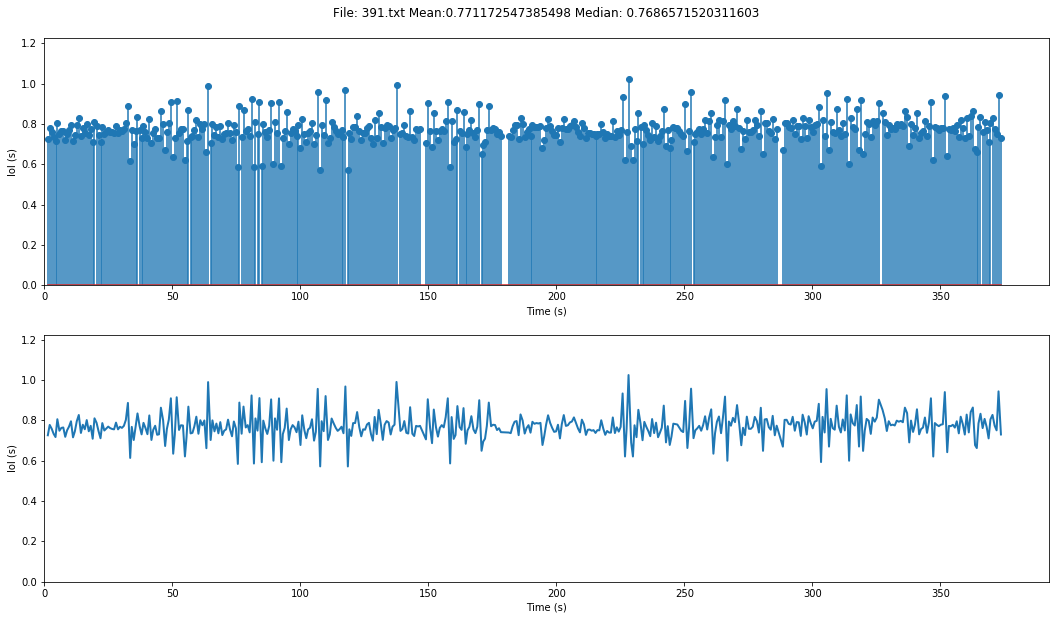

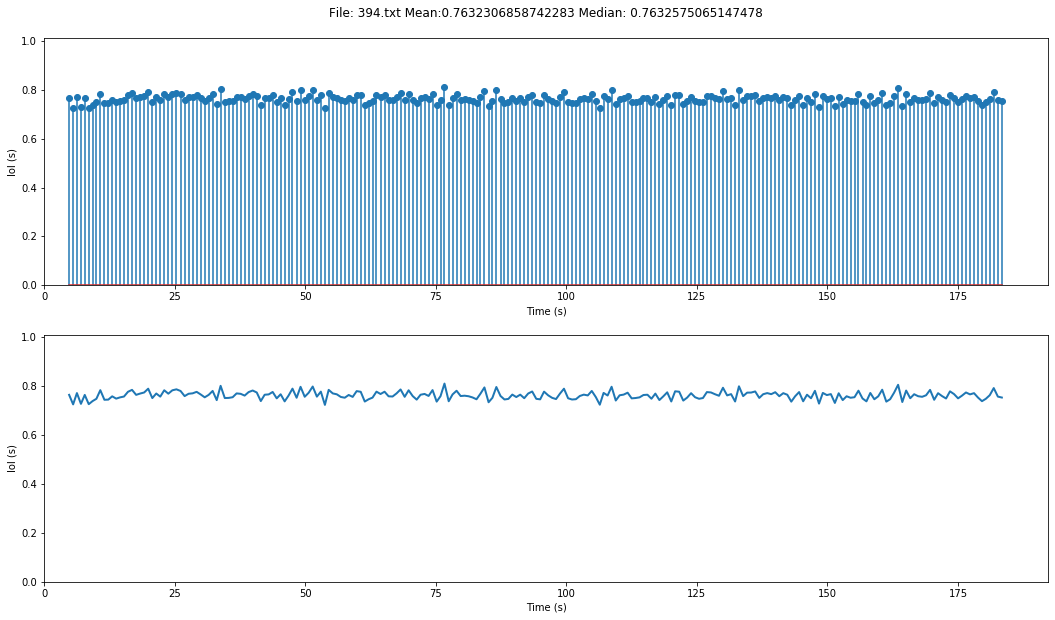

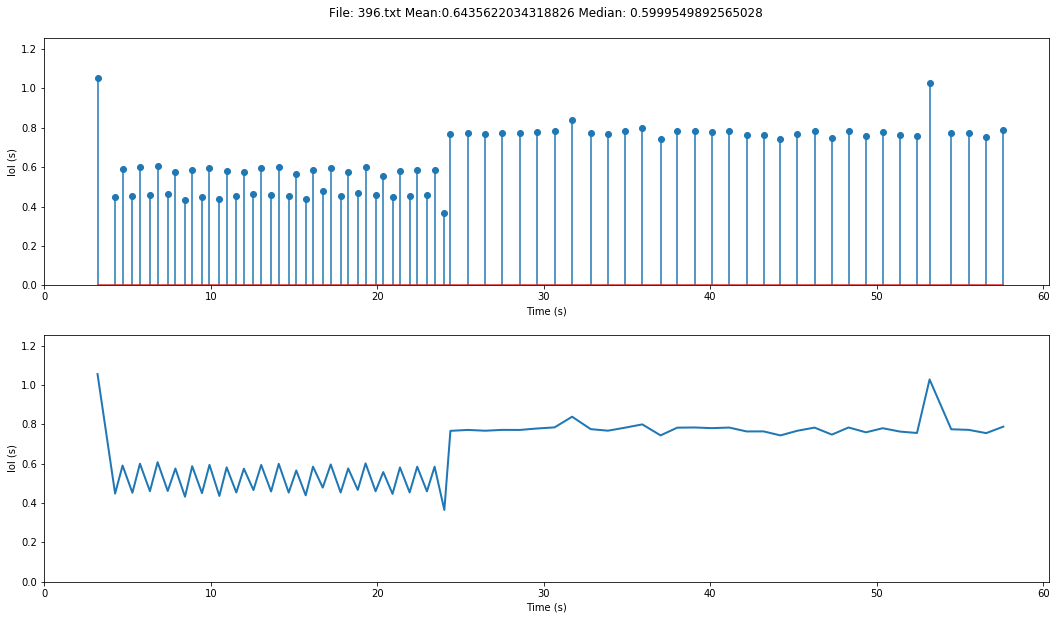

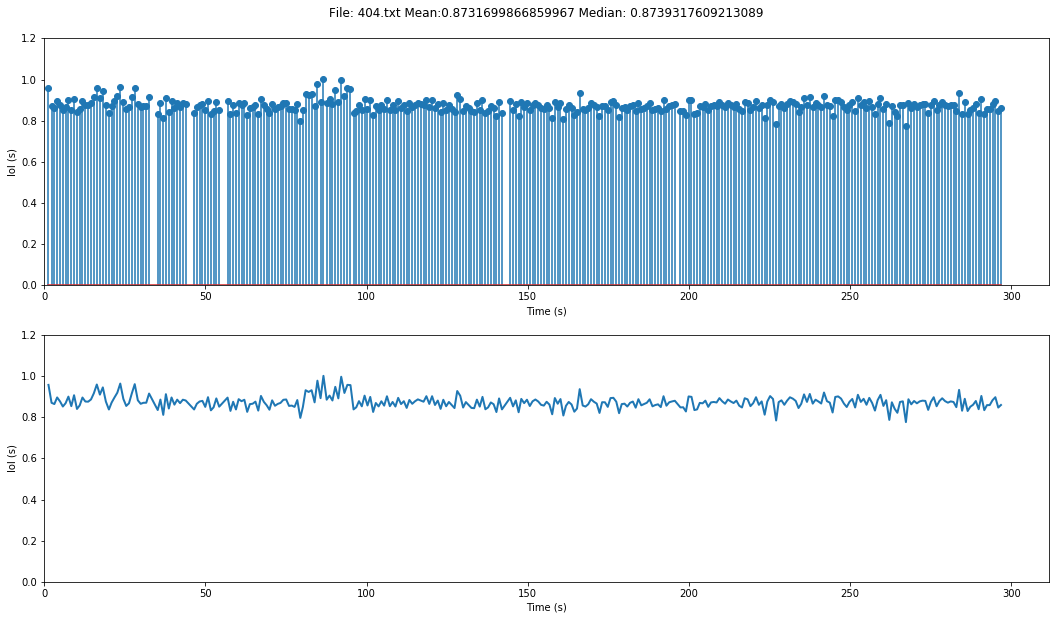

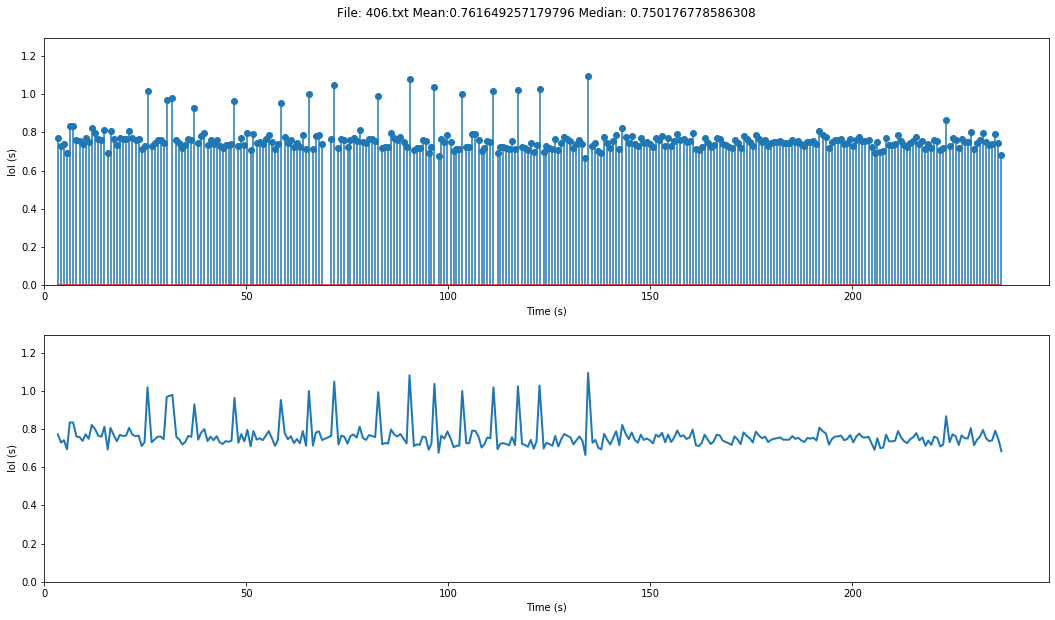

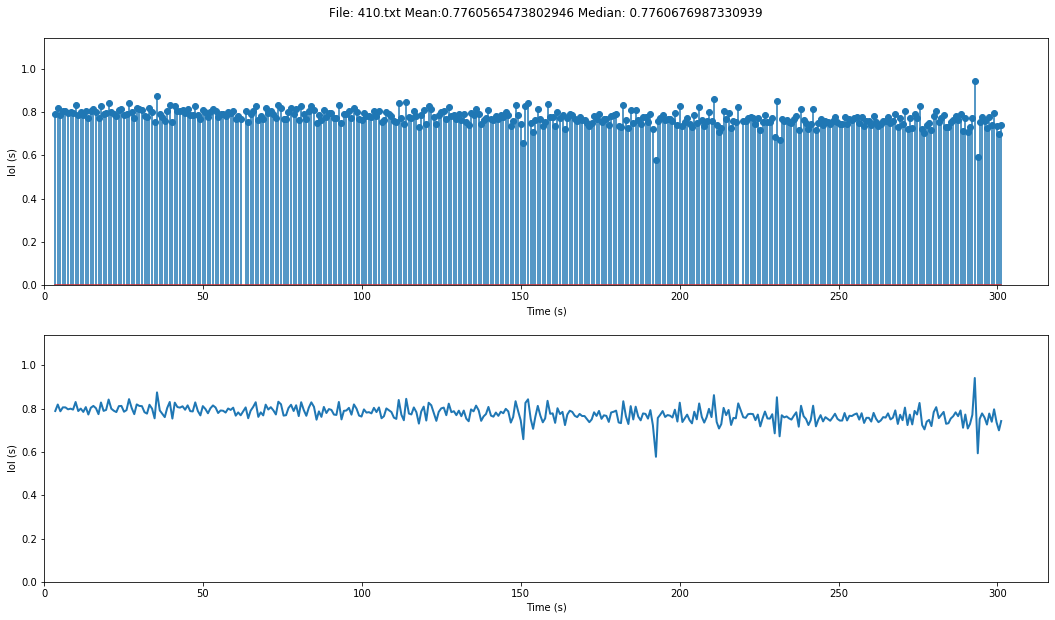

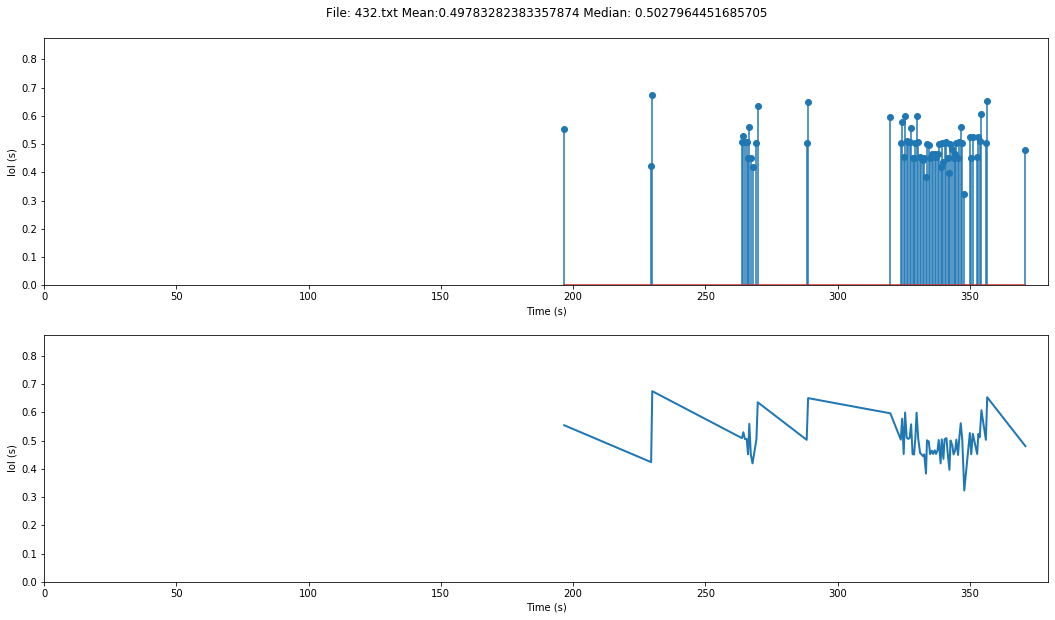

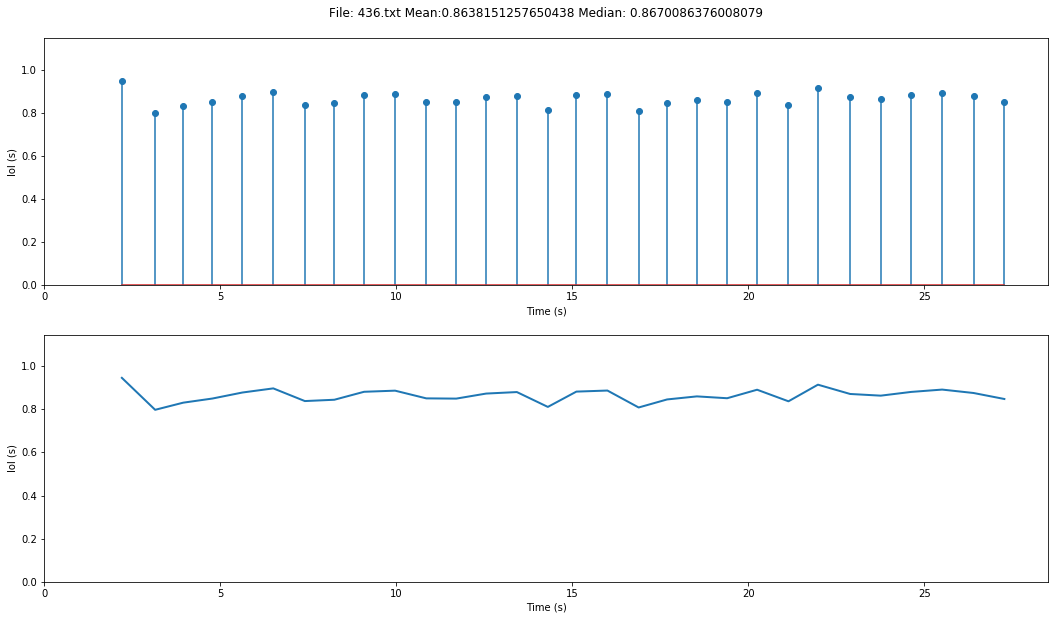

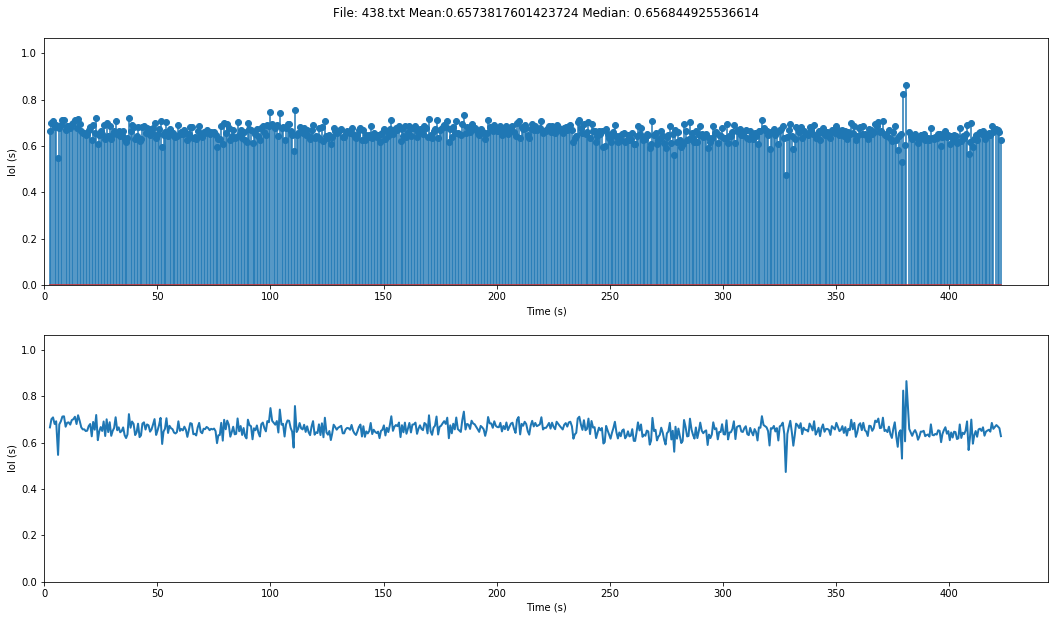

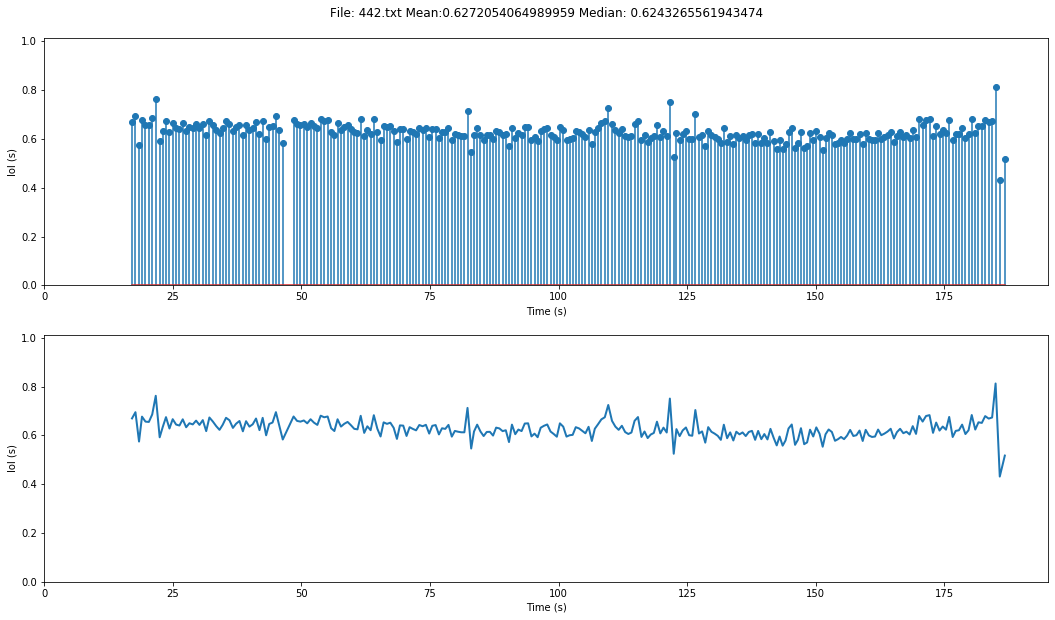

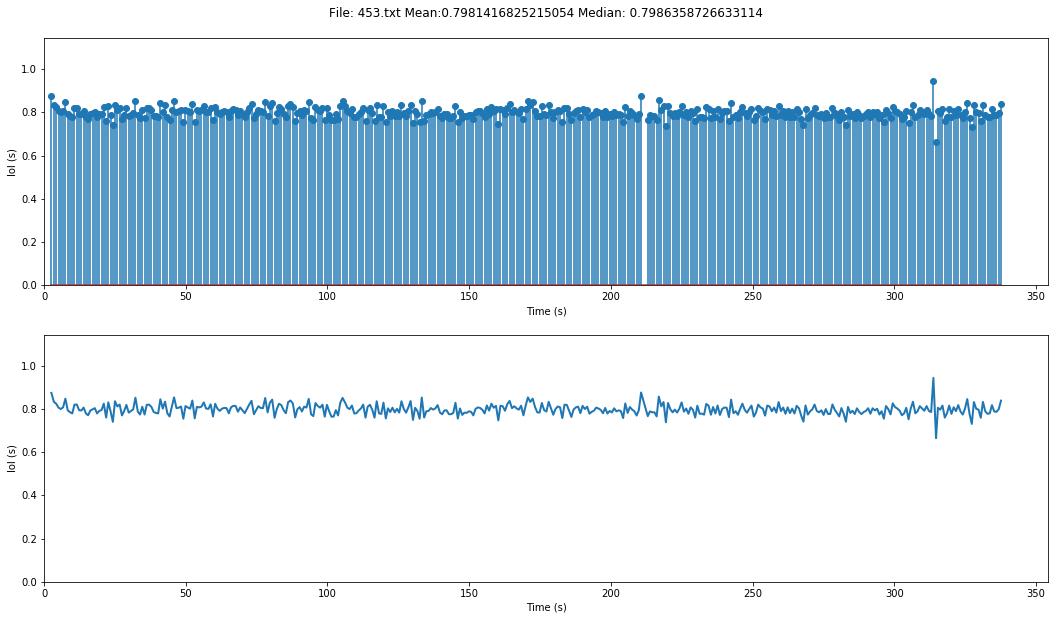

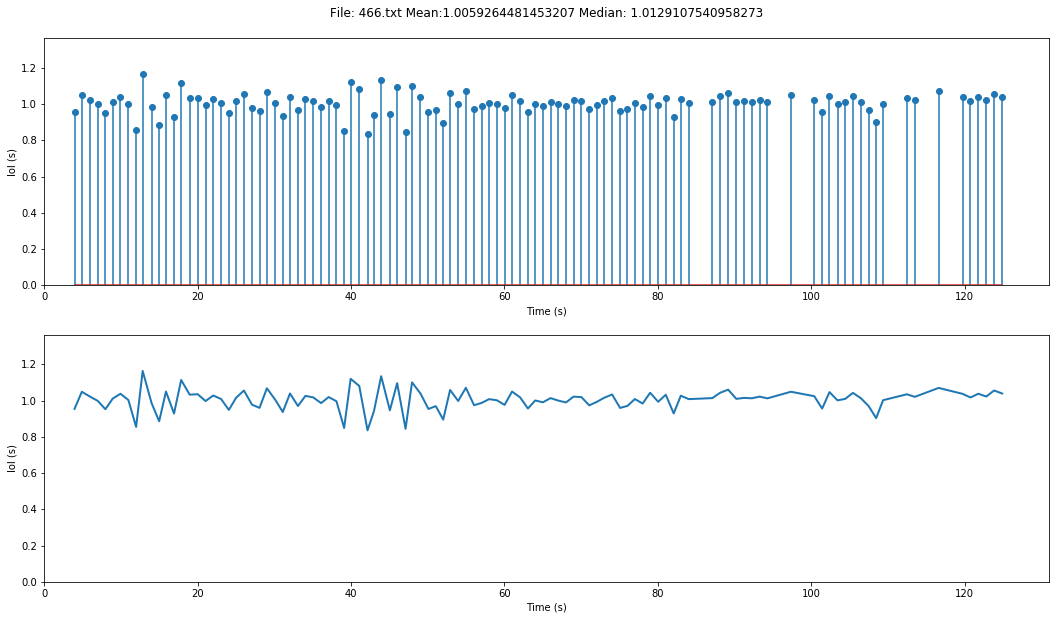

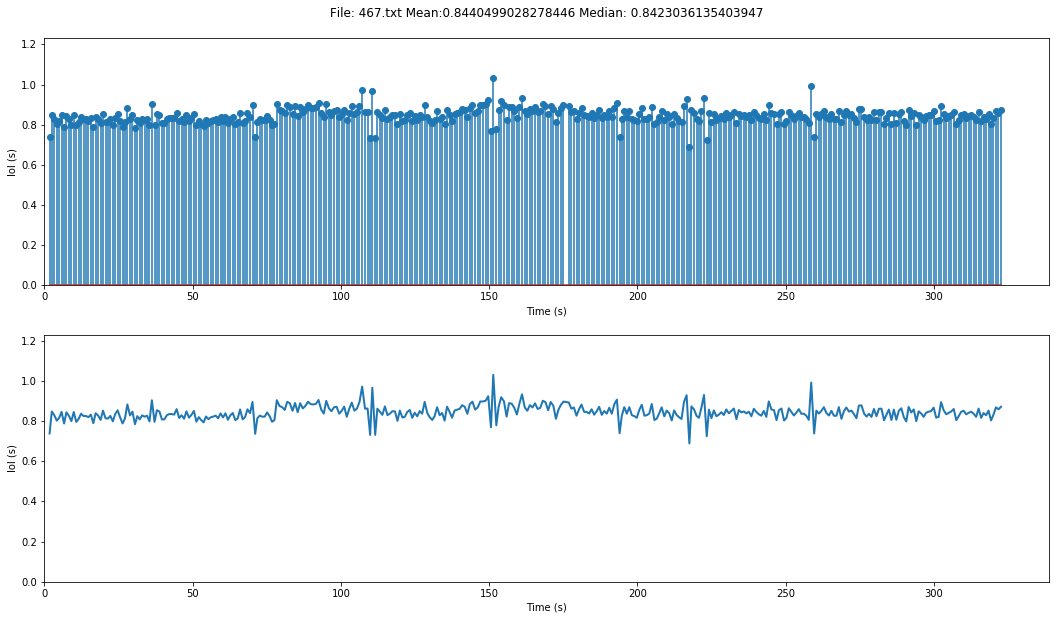

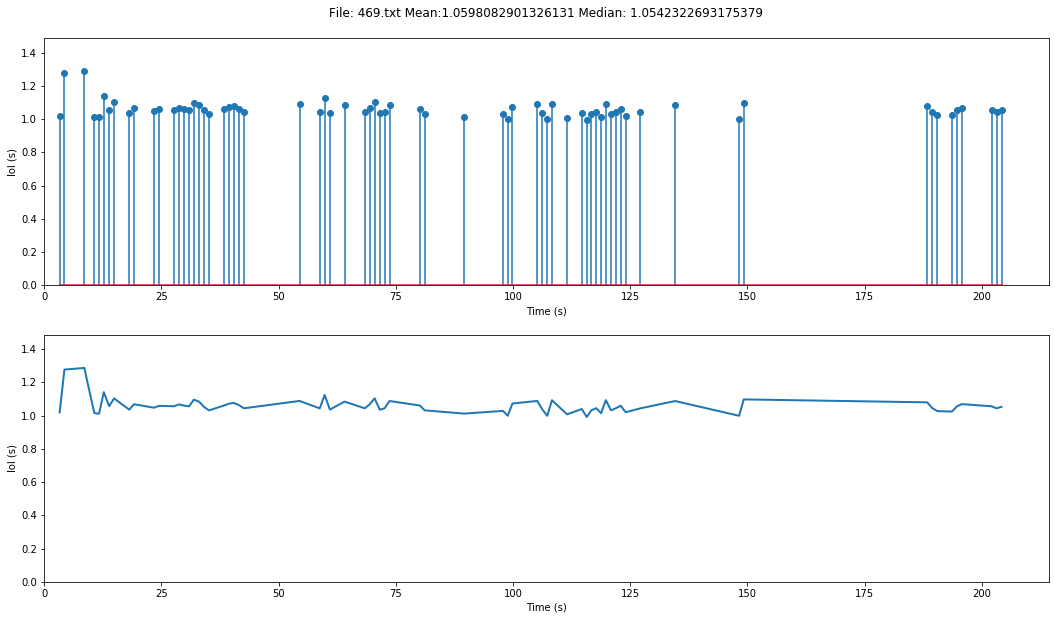

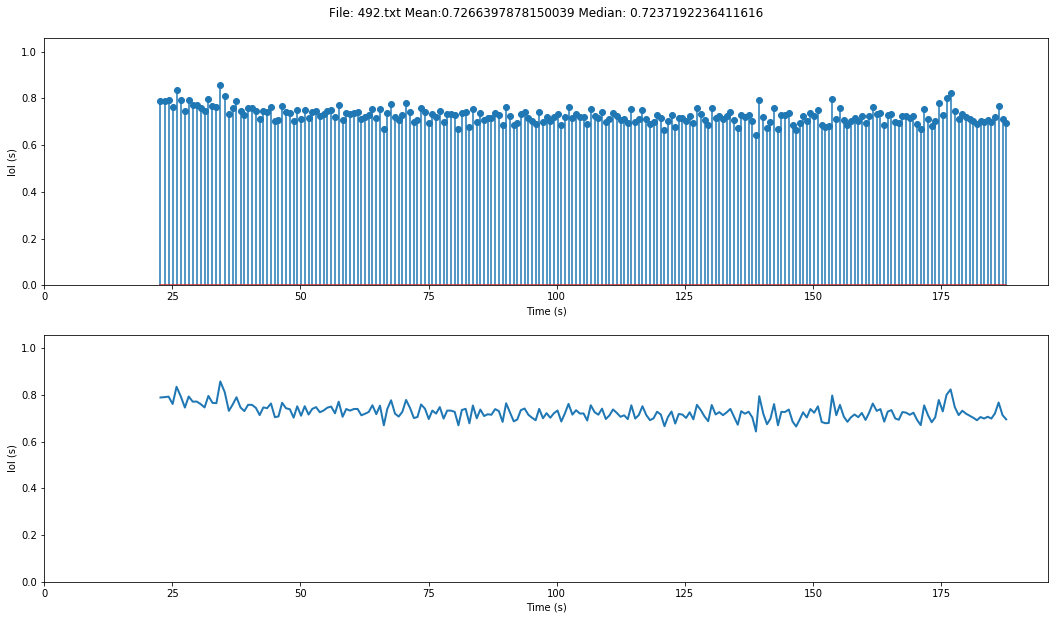

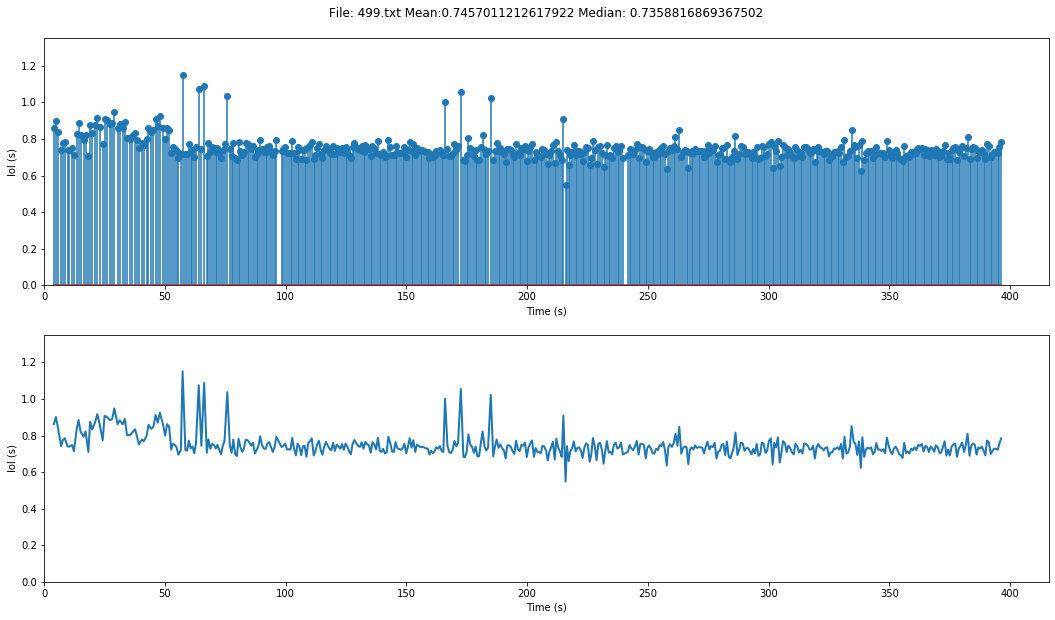

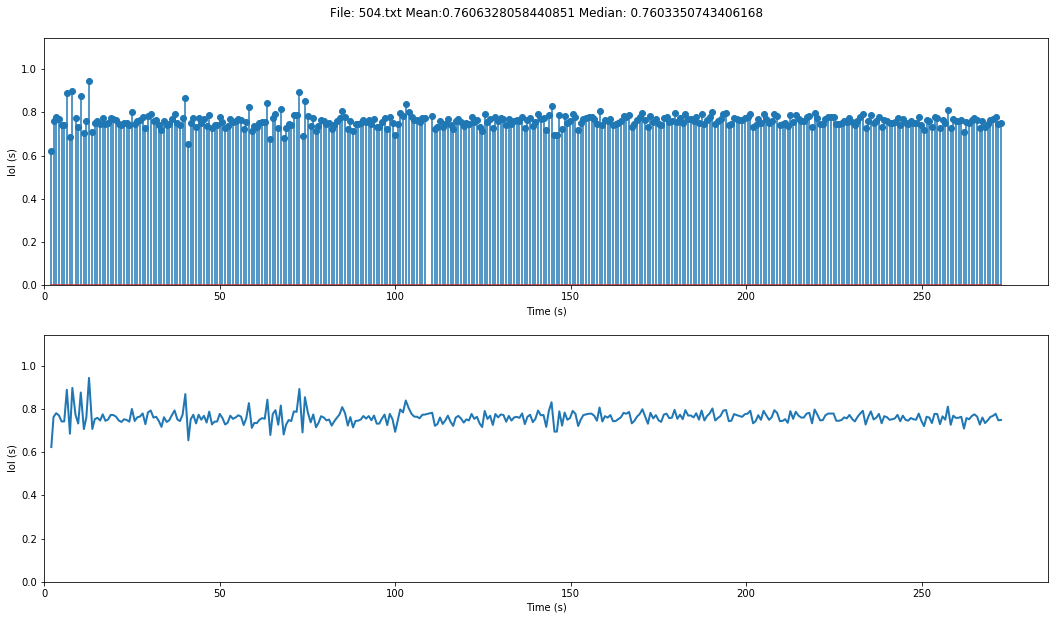

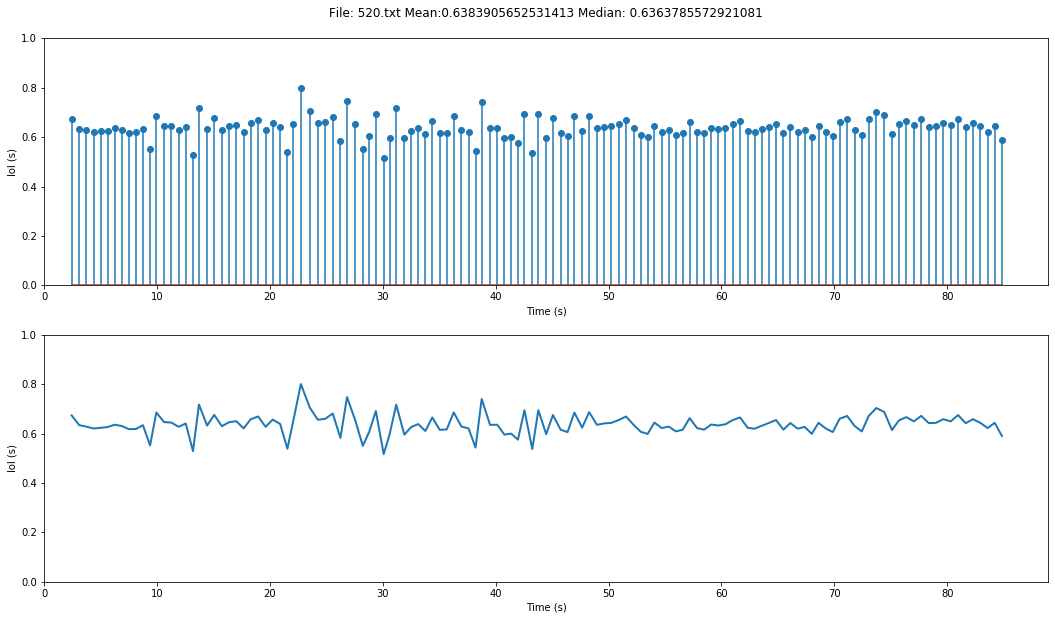

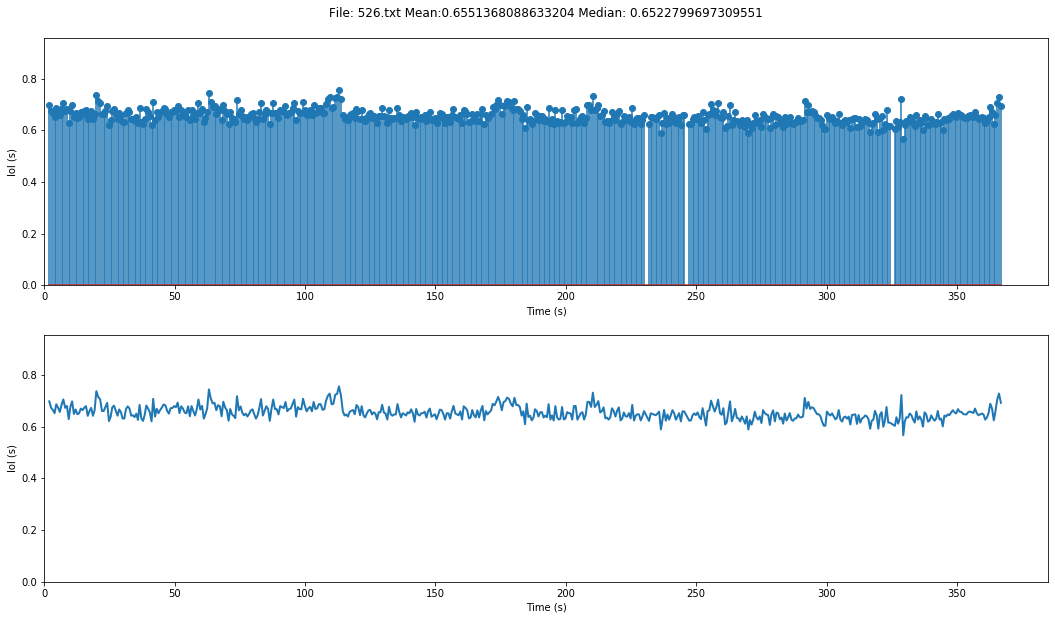

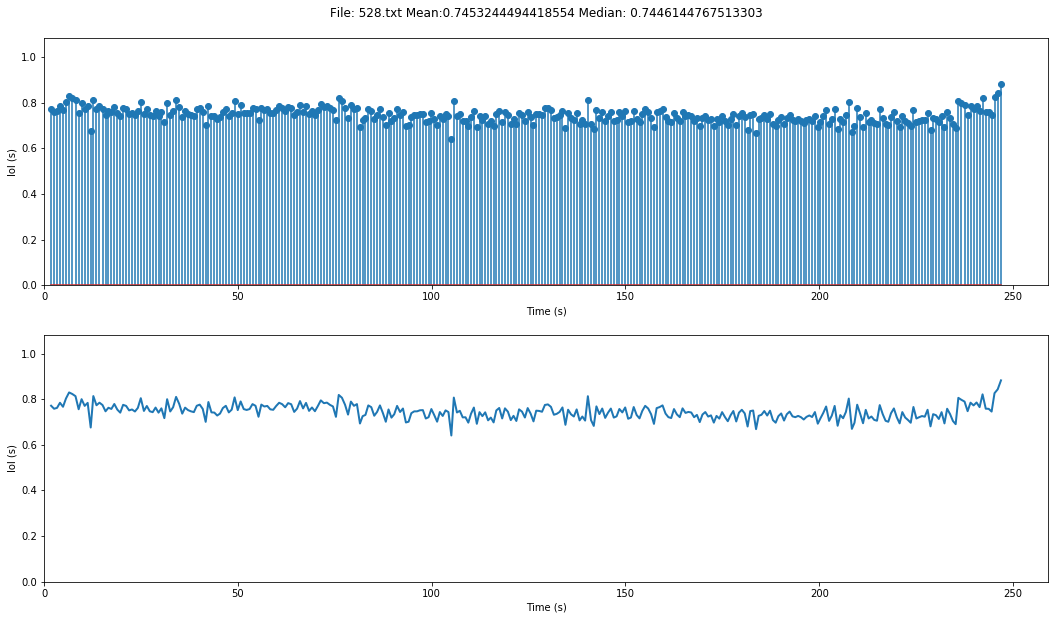

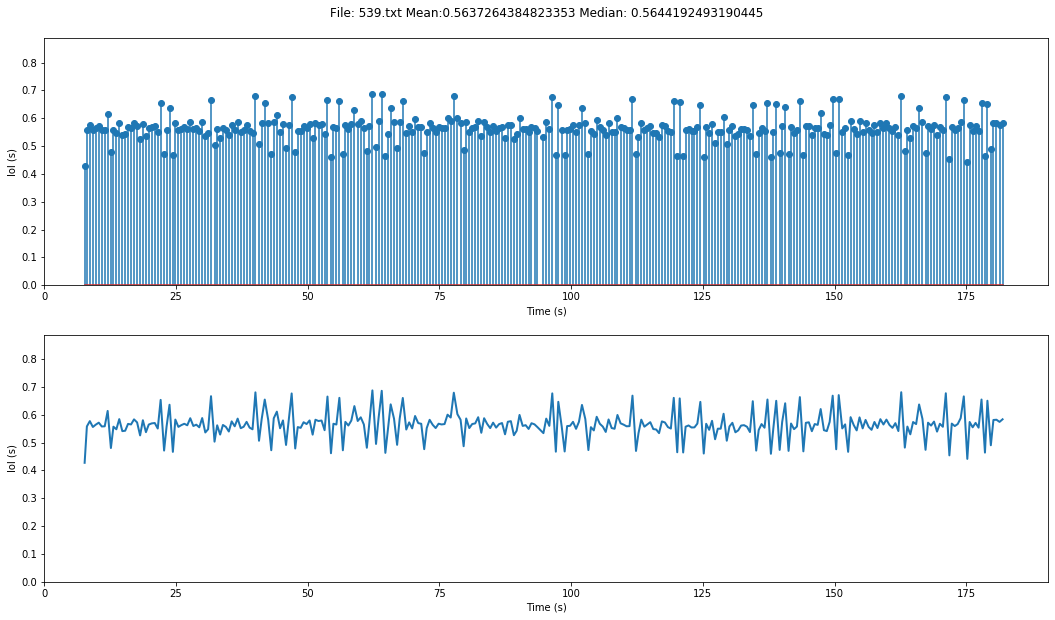

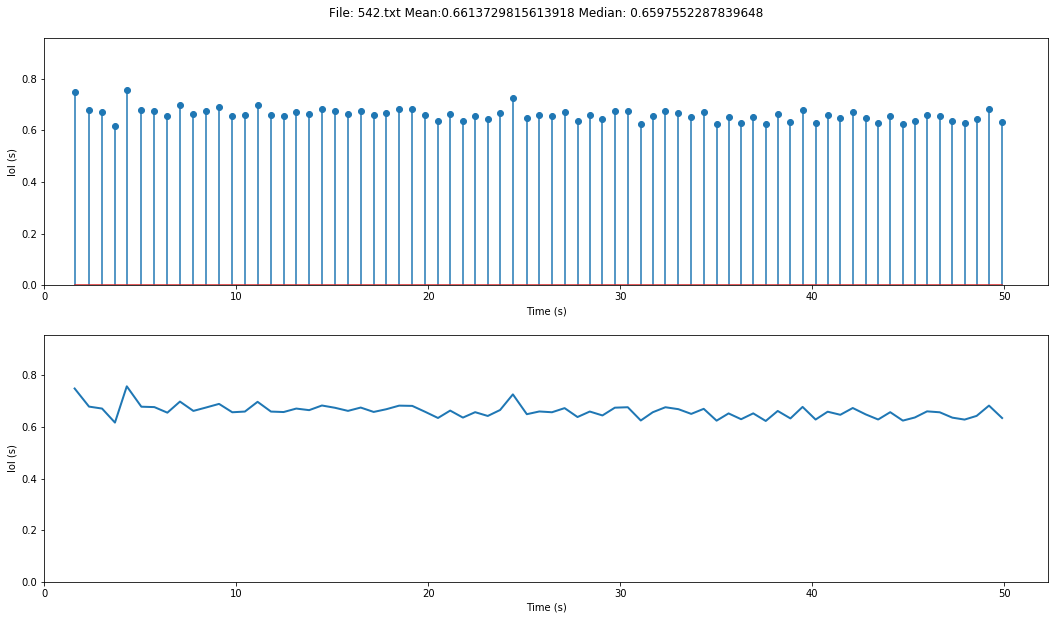

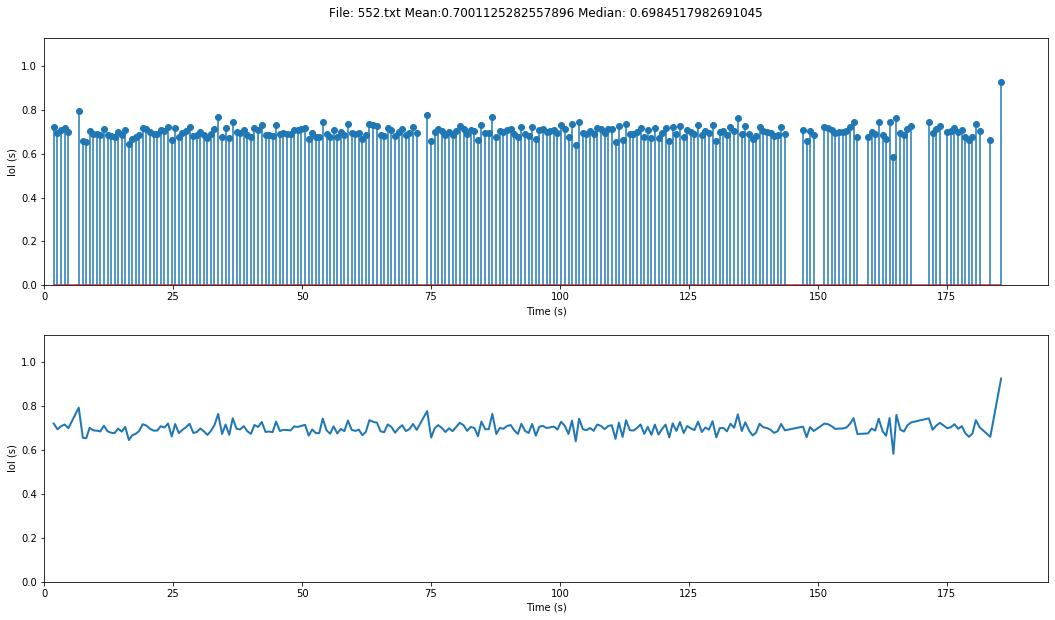

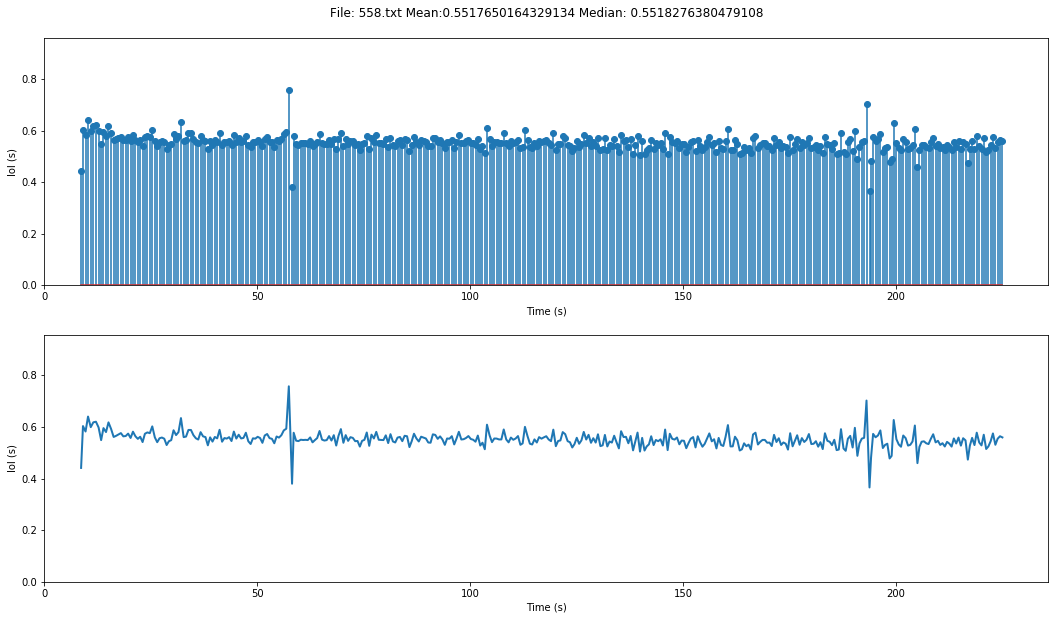

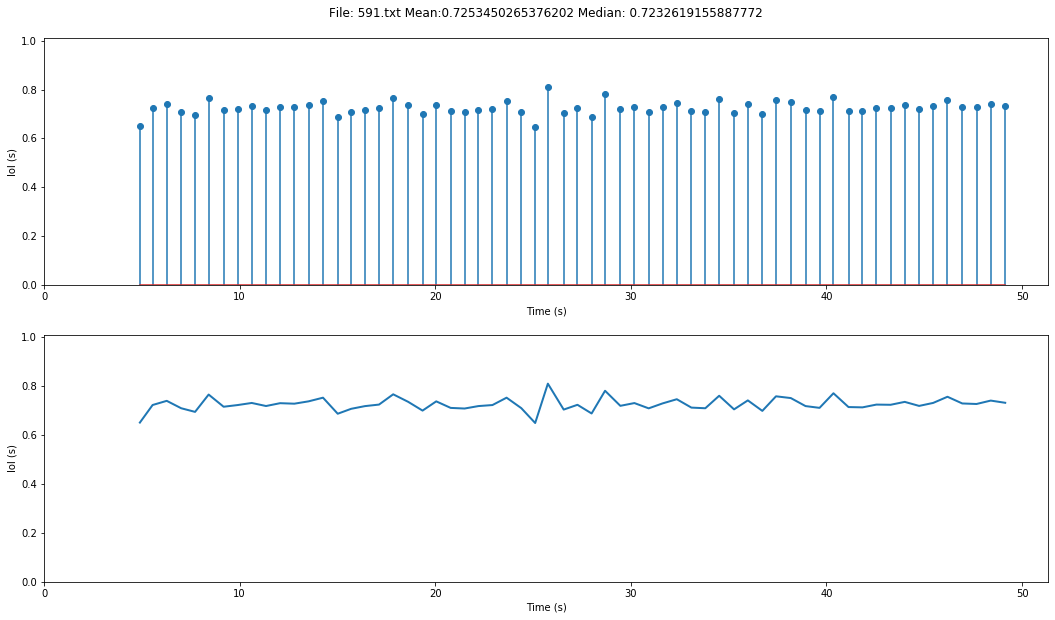

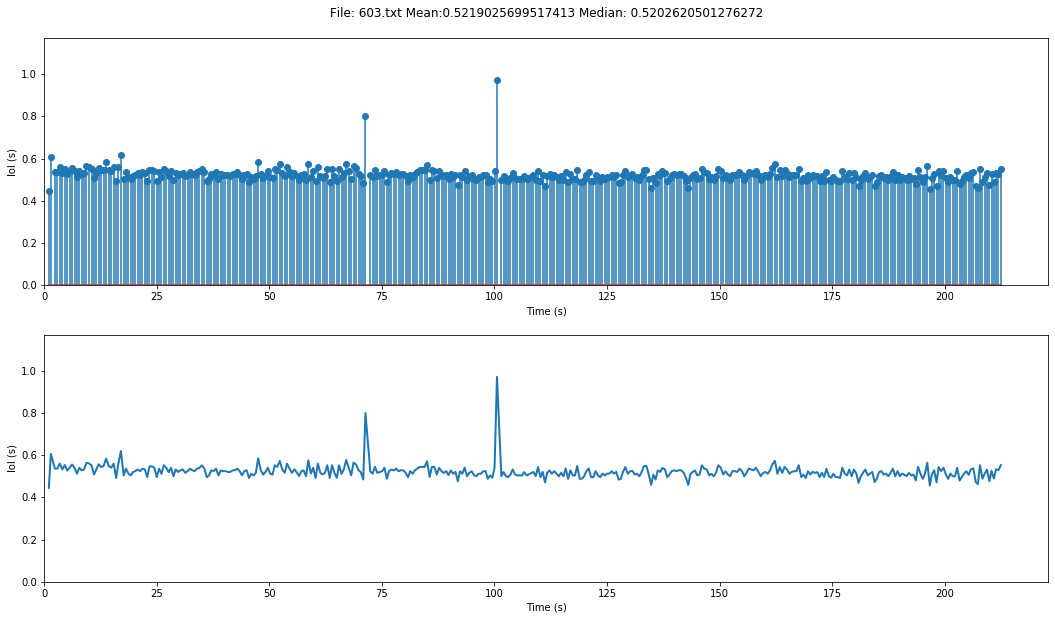

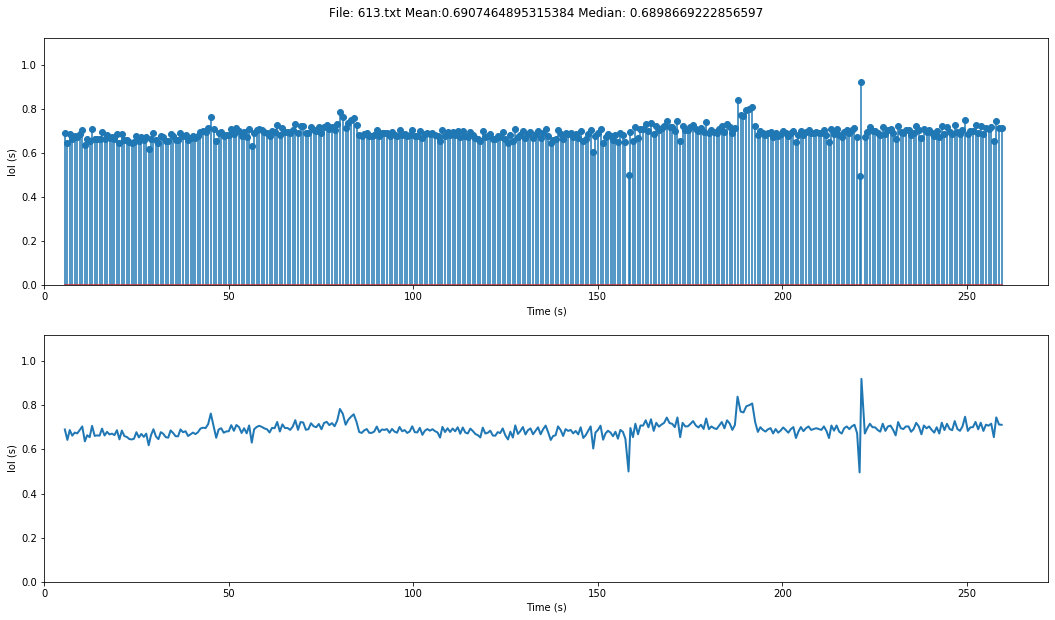

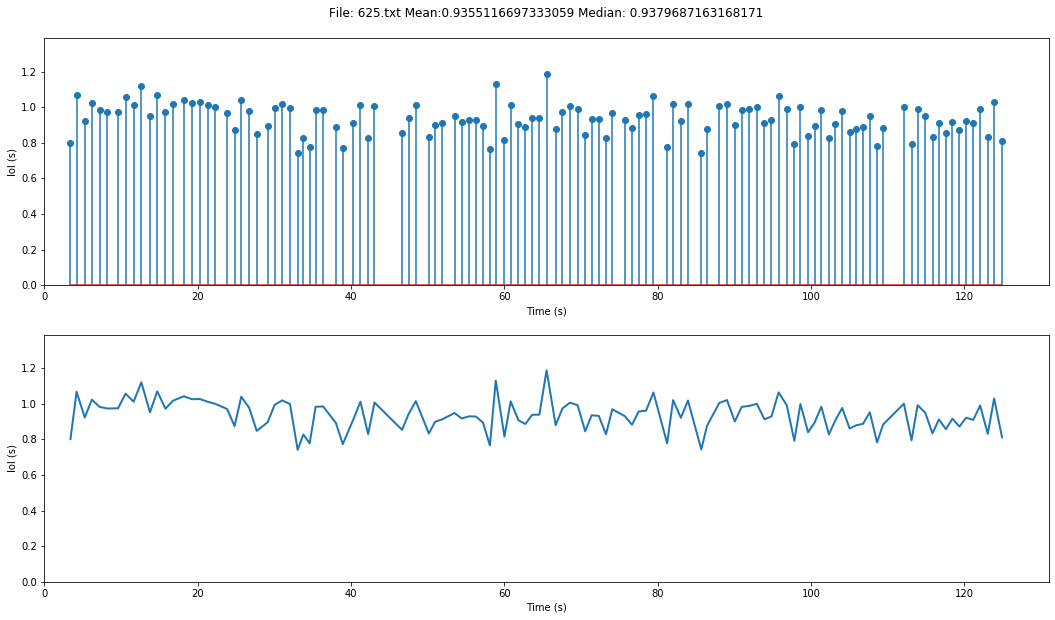

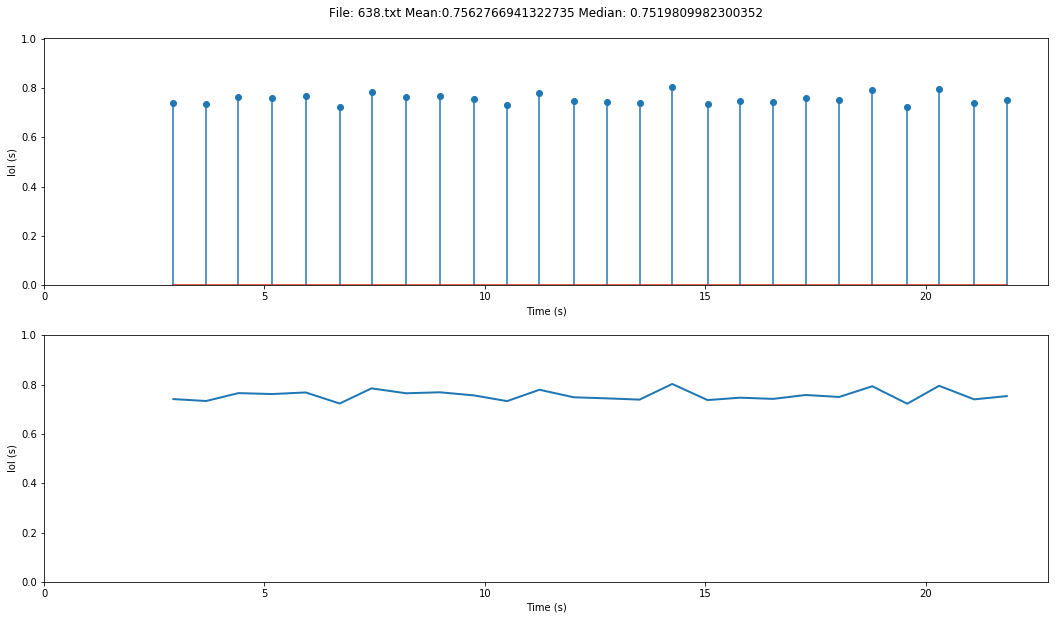

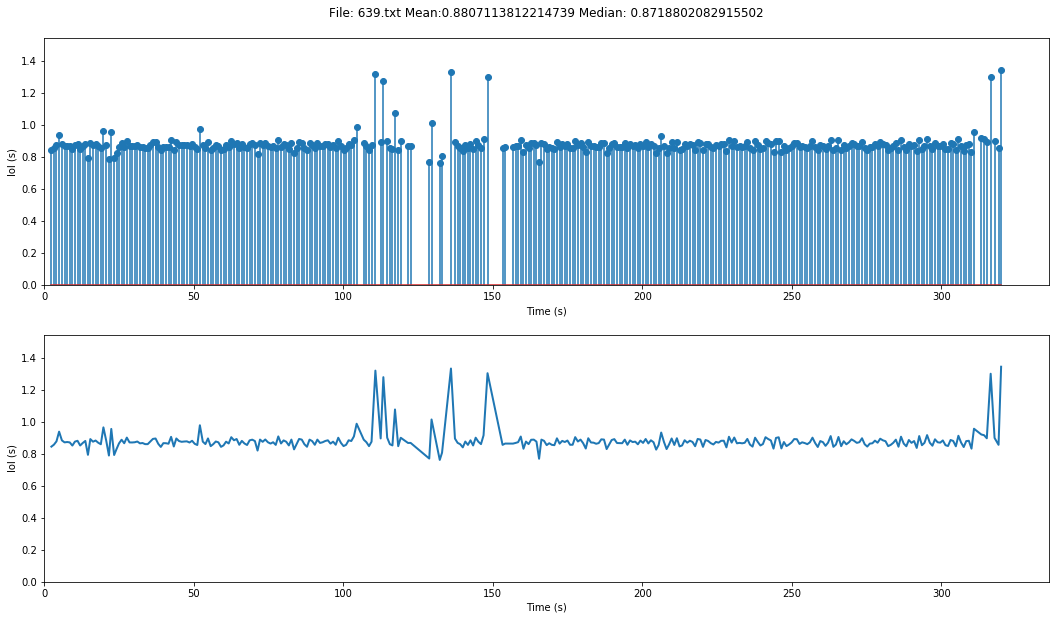

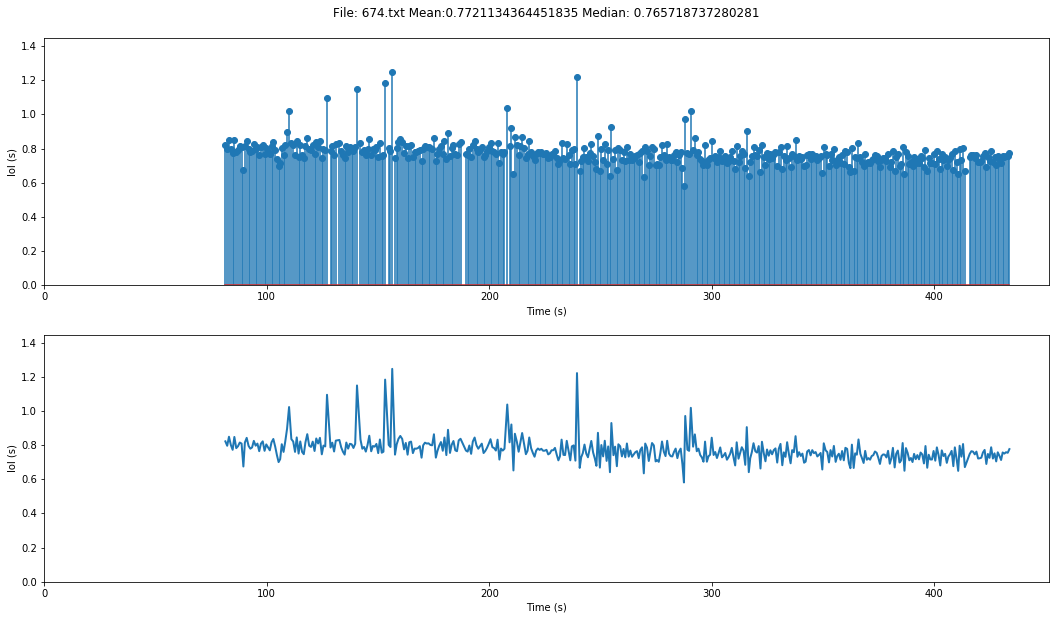

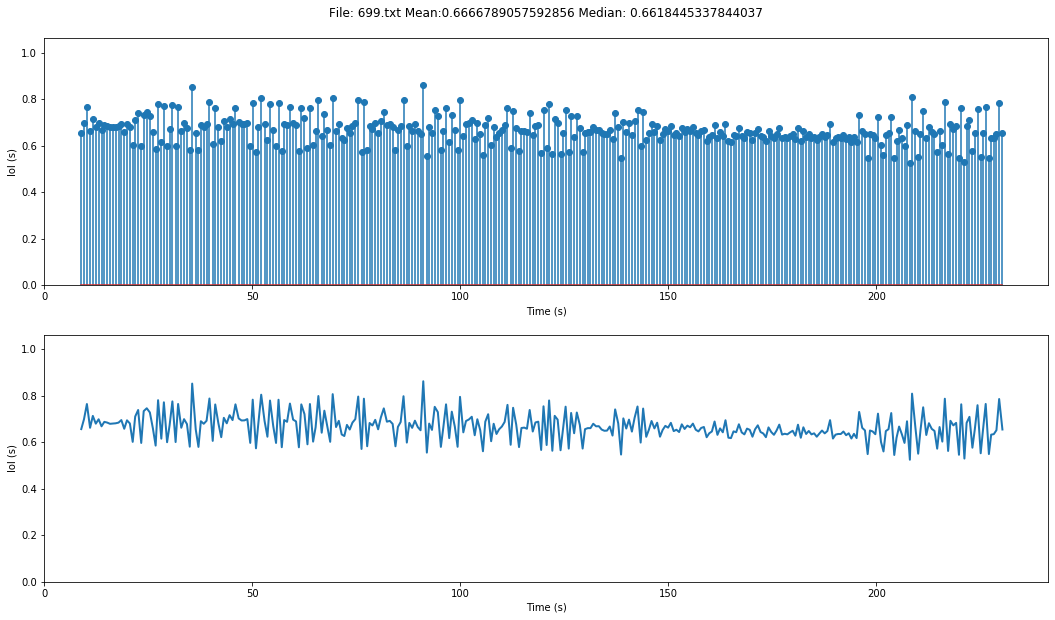

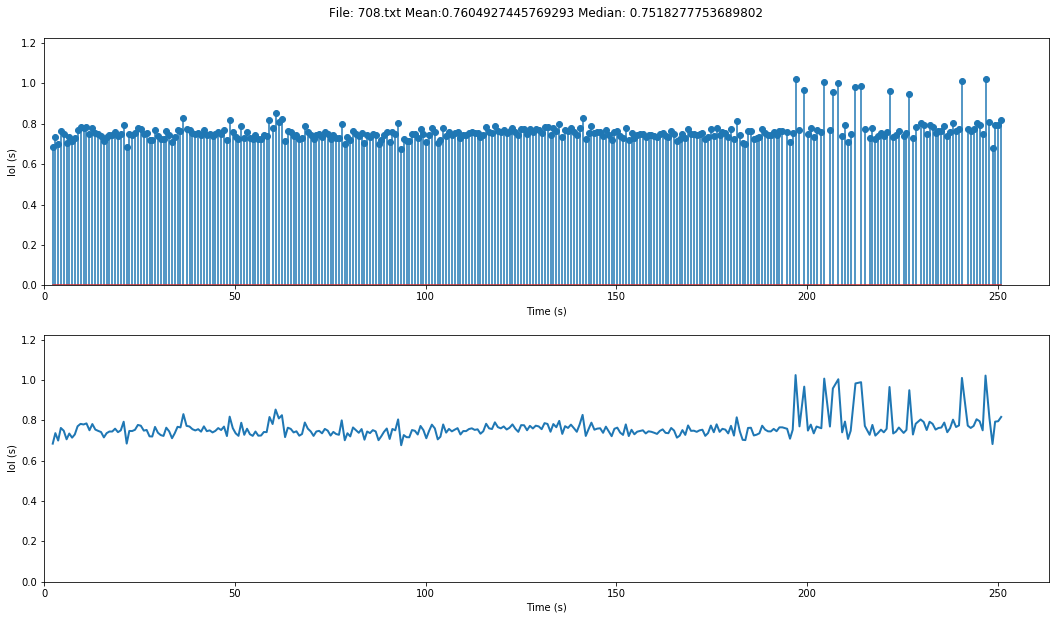

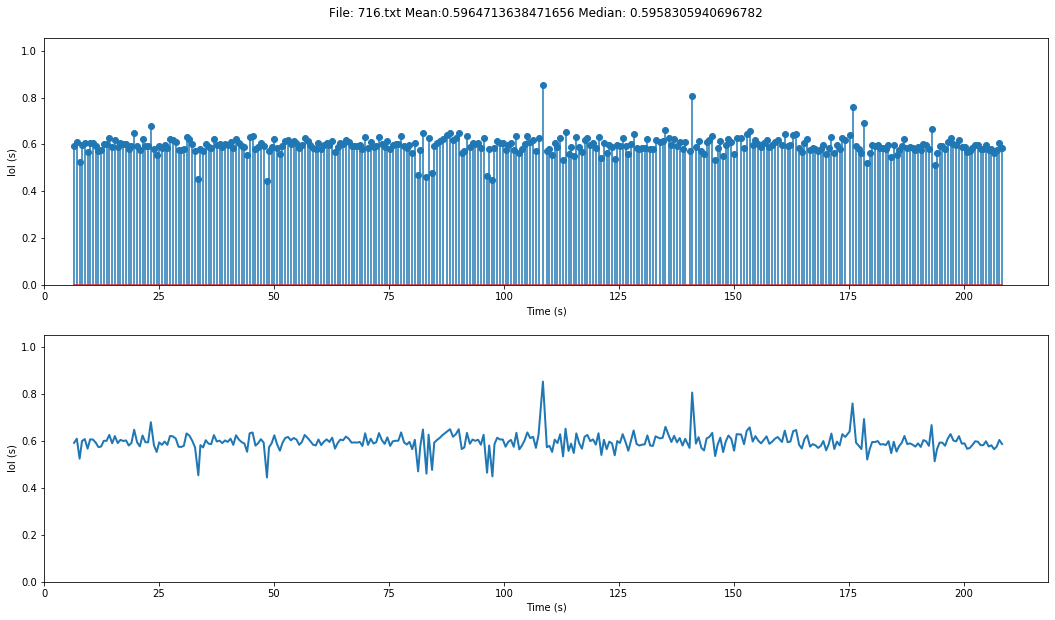

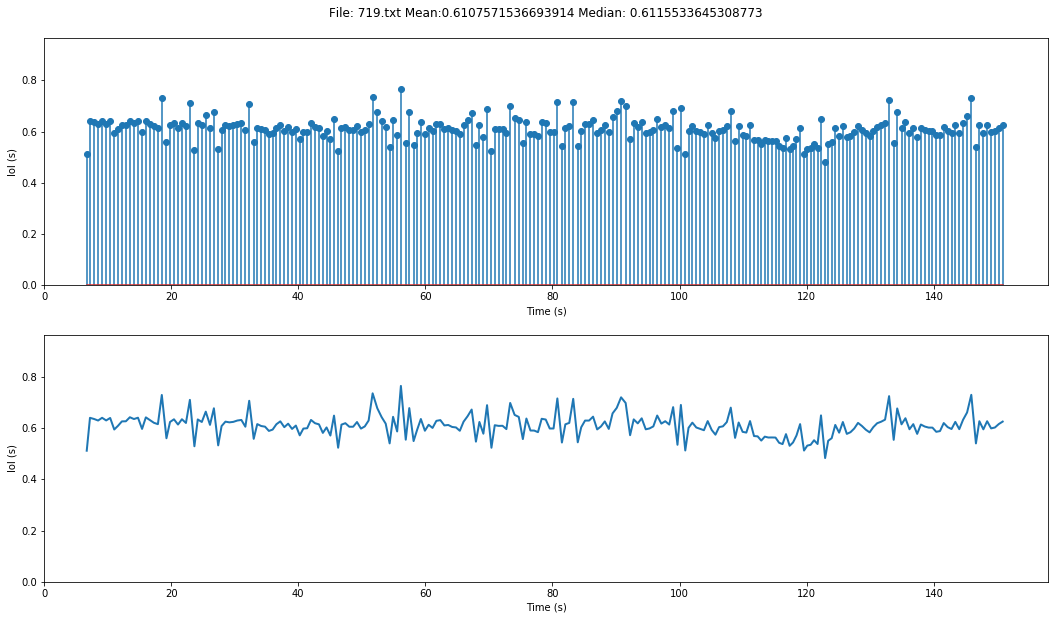

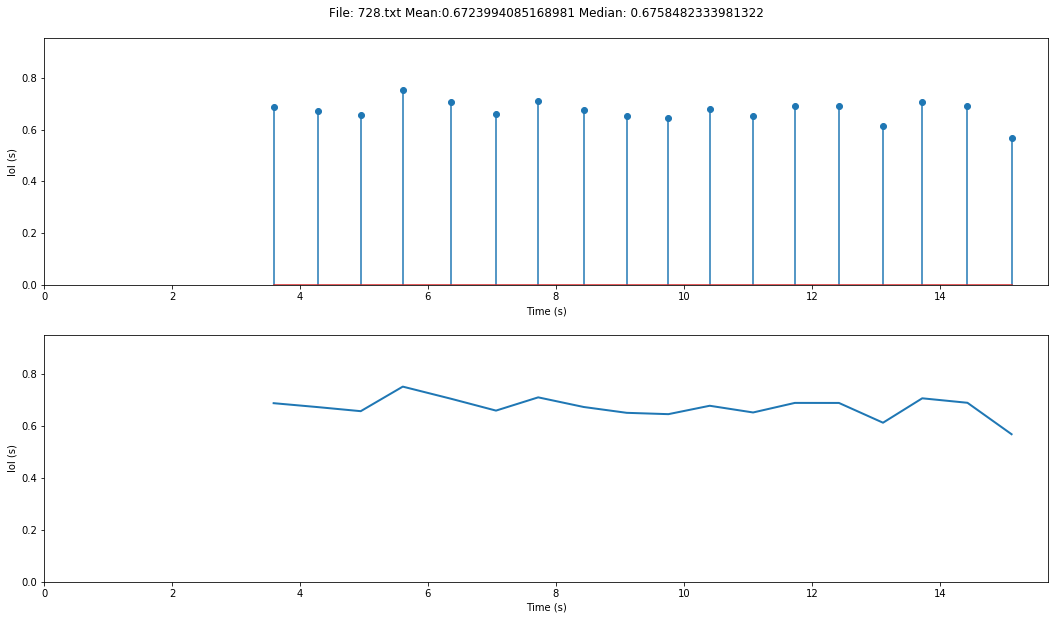

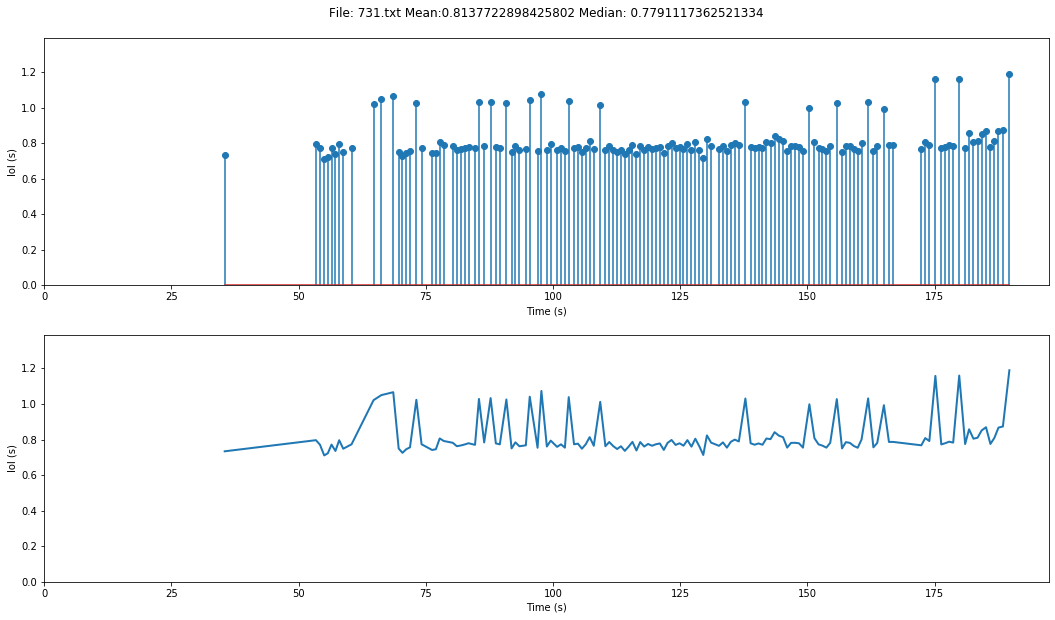

In [9]:
path = "Data/Processed_Songs/"
name_list=listdir(path)
cleaning_songs = {}
for file in name_list:
    x = []
    y = []
    f = open(path+file, "r")
    for row in f:
        num = row.split("\n")[0]
        x.append(float(num))

    i = 0
    while i<len(x):
        if i+1 < len(x):
            y.append(float(x[i+1])-float(x[i]))
        i += 1
    
    if len(x)-1 > 0:
        del x[len(x)-1]

        # CLEANING
        median_value = median(y)

        y_clean = []
        x_clean = []

        for i in range(len(y)):
            if i < len(y):
                if ((y[i]-median_value) > -0.2) and ((y[i]-median_value) < 0.5) :
                    y_clean.append(y[i])
                    x_clean.append(x[i])

        x = x_clean
        y = y_clean

        cleaning_songs[file] = [x, y]

        fig, (ax1, ax2) = plt.subplots(2,1, figsize = (18,10))

        ax1.stem(x, y, use_line_collection=True)

        ax1.set_xlim(left=0)
        ax1.set_ylim(bottom=0, top=max(y)+0.2)

        ax2.plot(x, y, '-', lw=2)
        ax2.set_xlim(left=0)
        ax2.set_ylim(bottom=0, top=max(y)+0.2)

        
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('IoI (s)')

        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('IoI (s)')
        
        ax1.set_title("File: "+file+" Mean:"+str(mean(y))+" Median: "+str(median(y))+"\n")

        plt.show()

## Real vs Cleaning

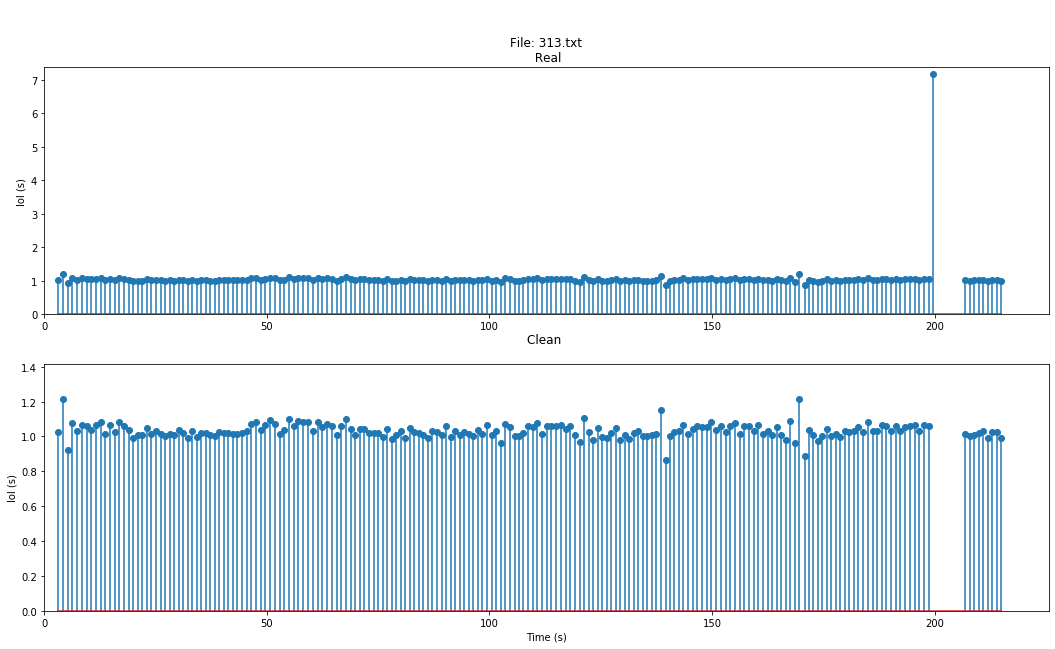

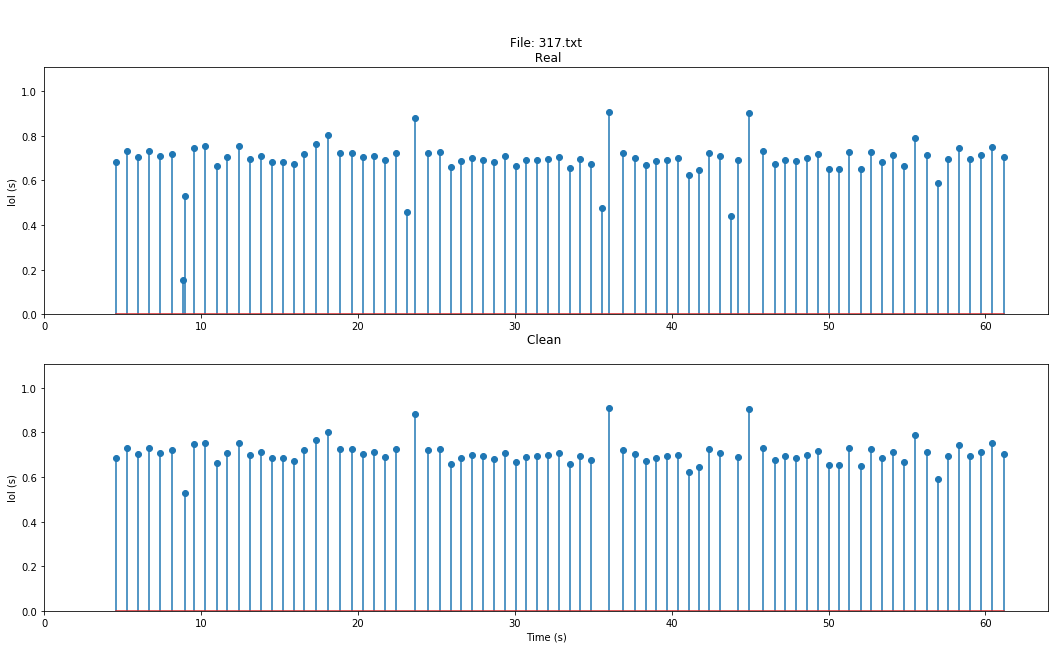

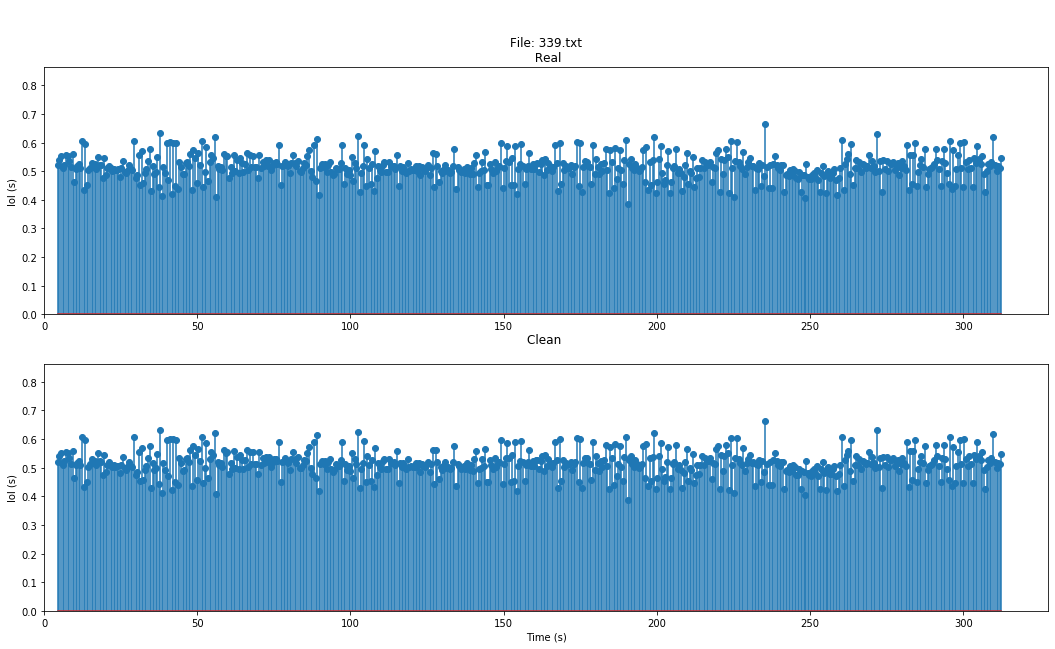

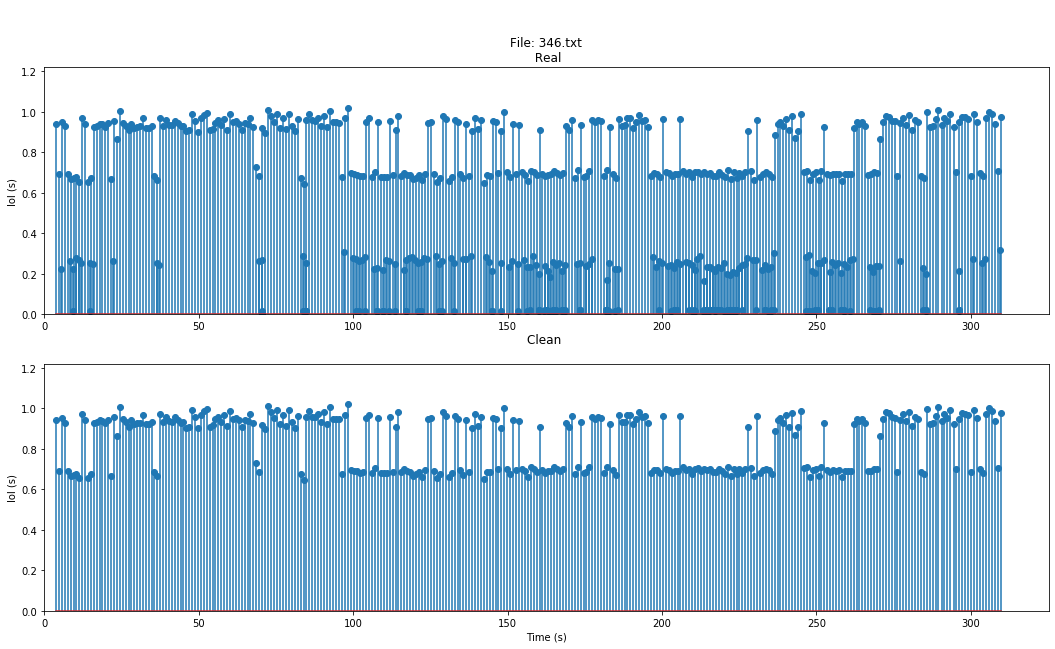

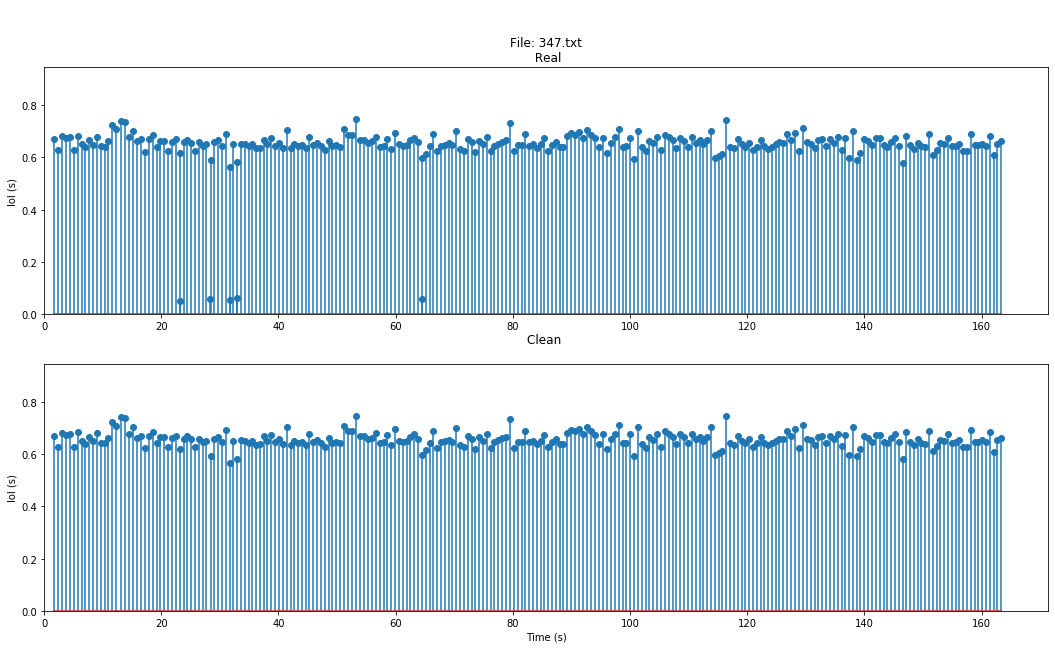

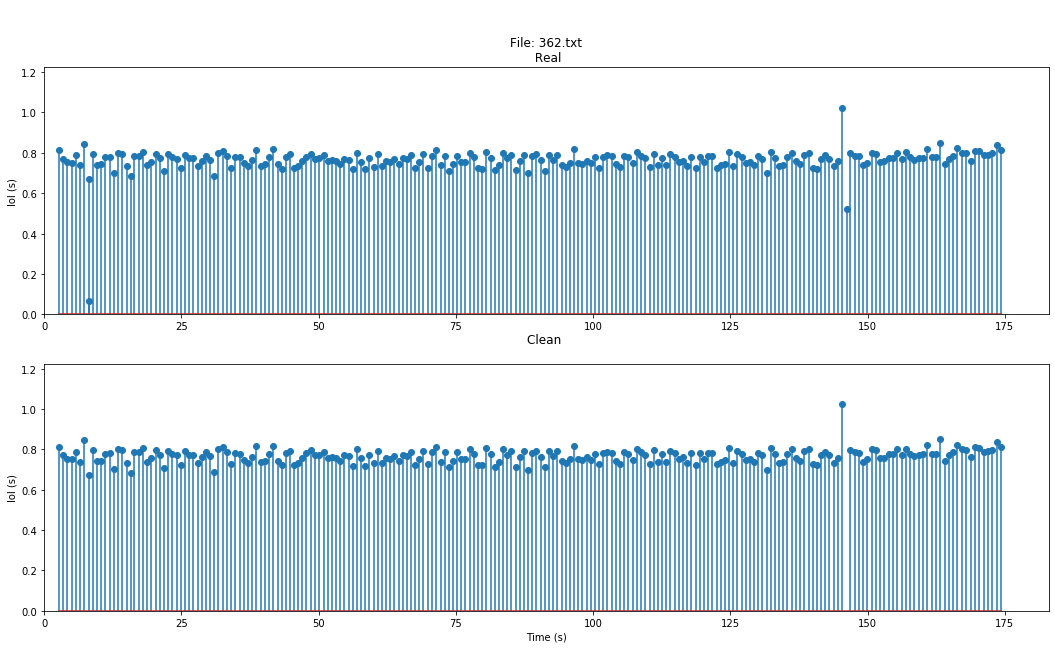

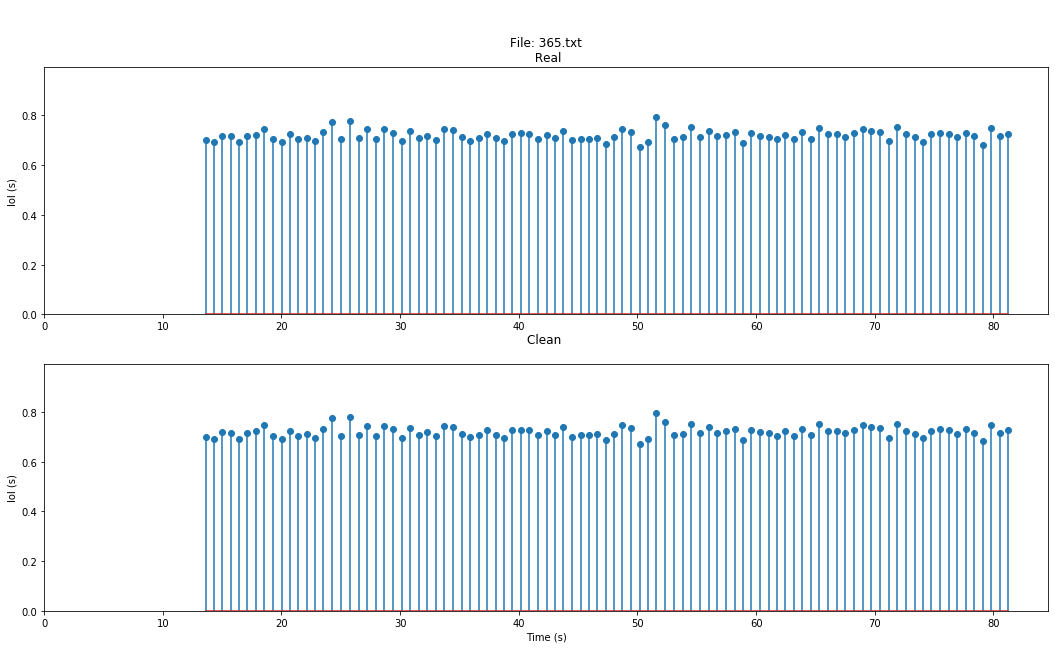

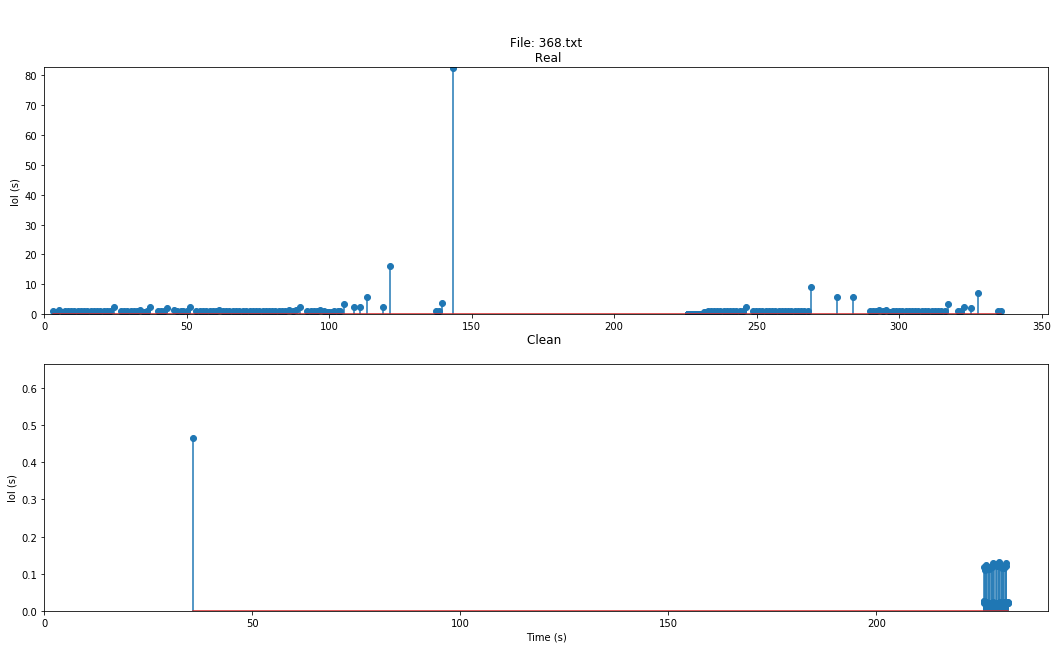

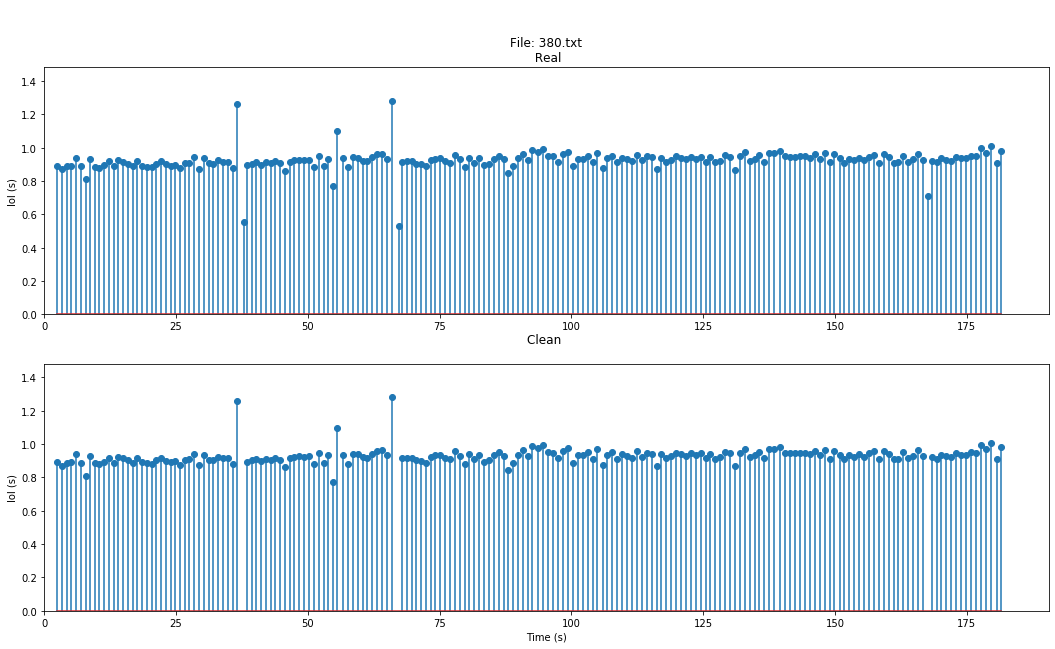

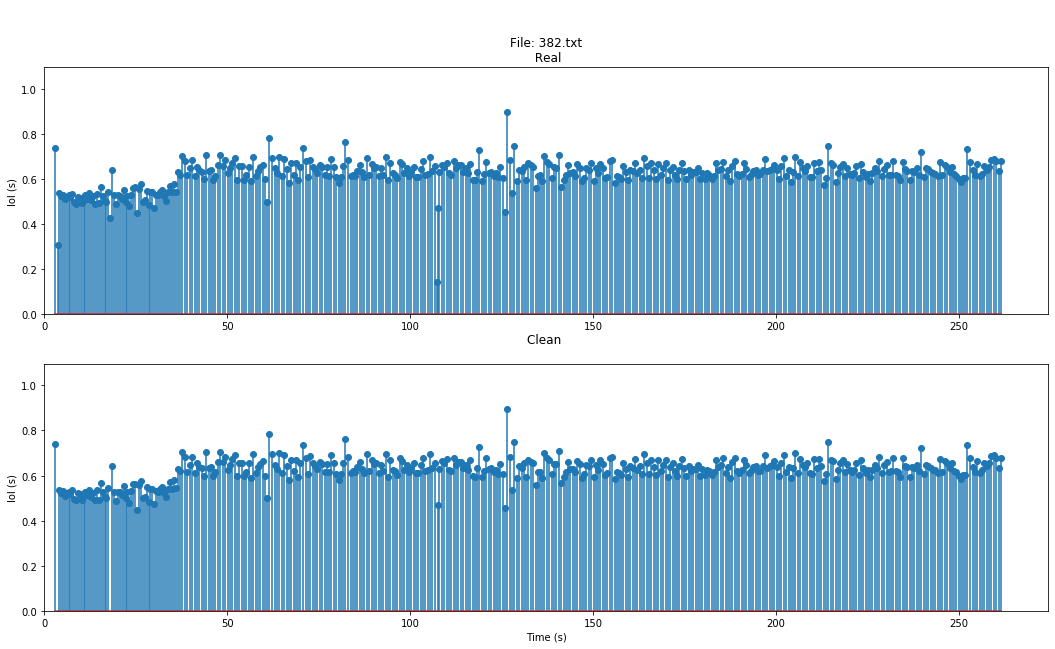

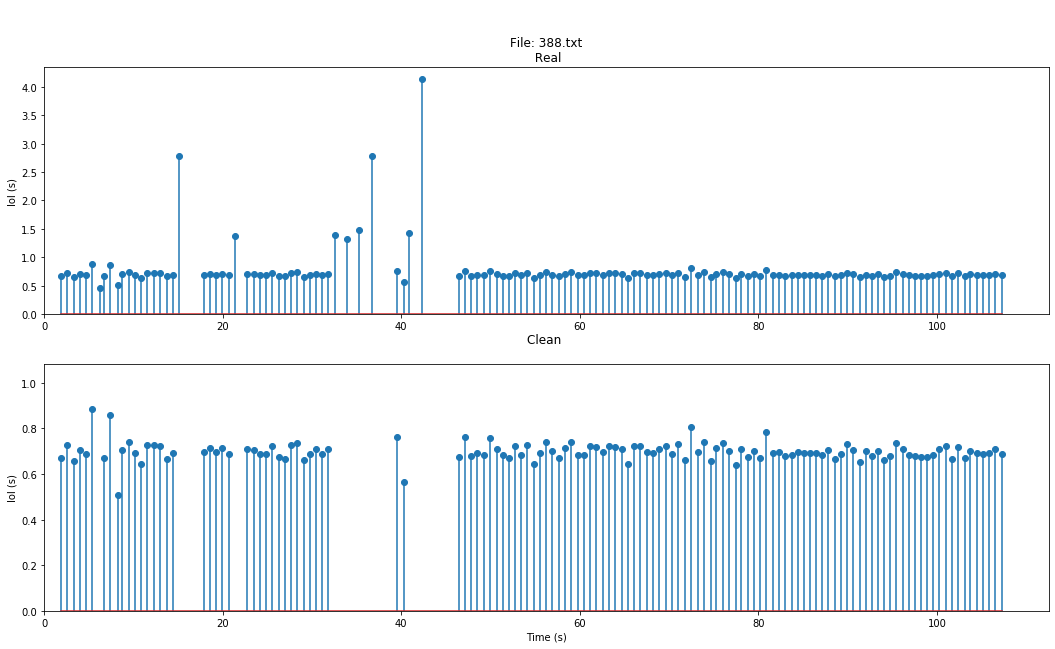

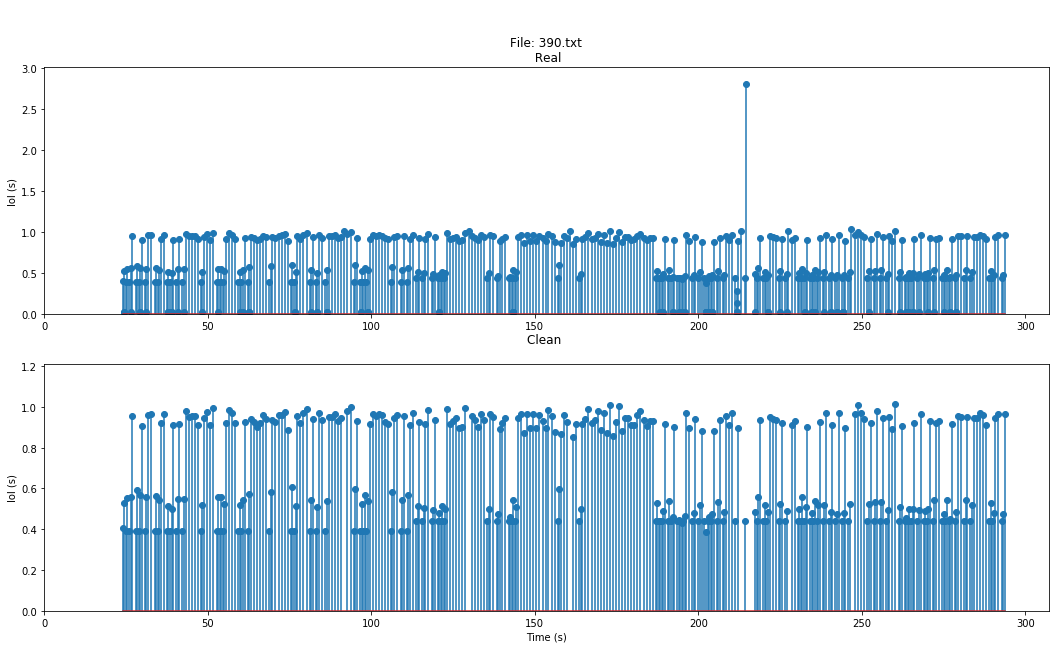

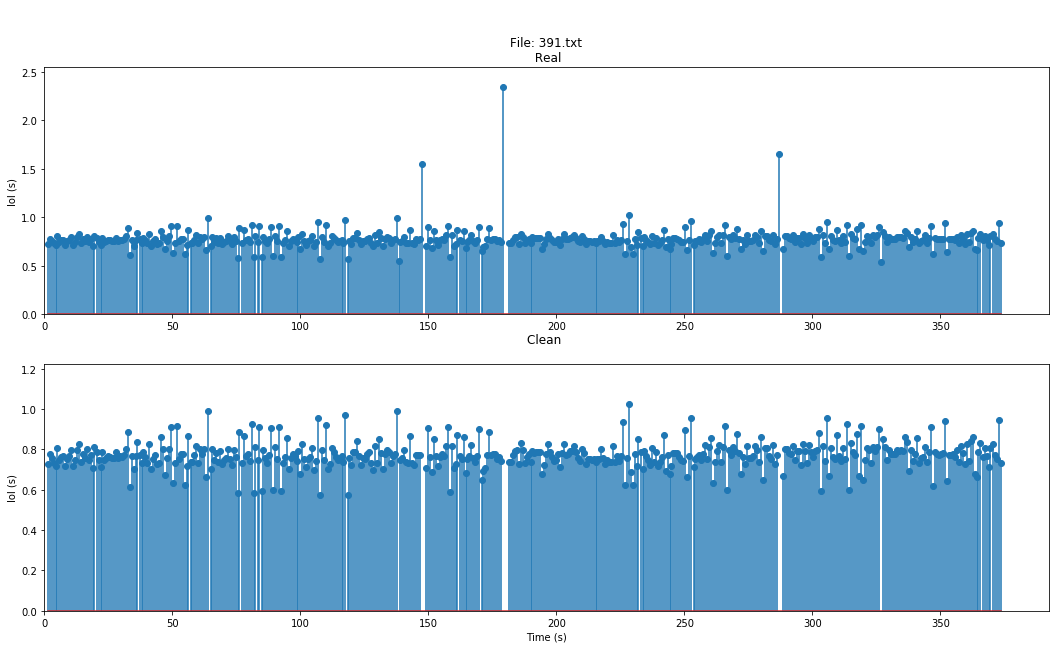

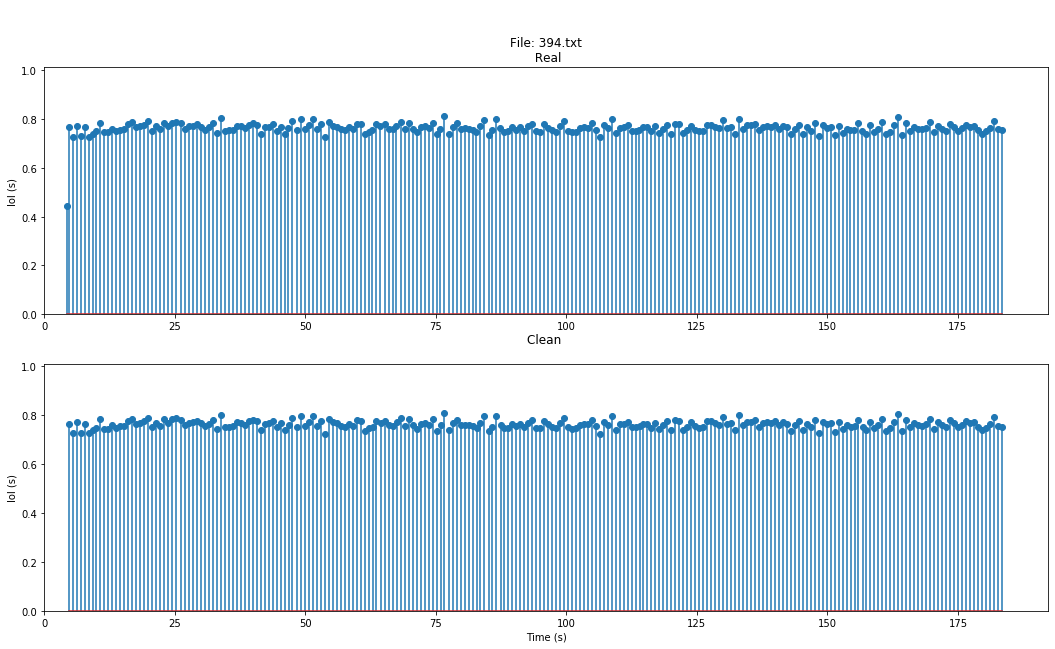

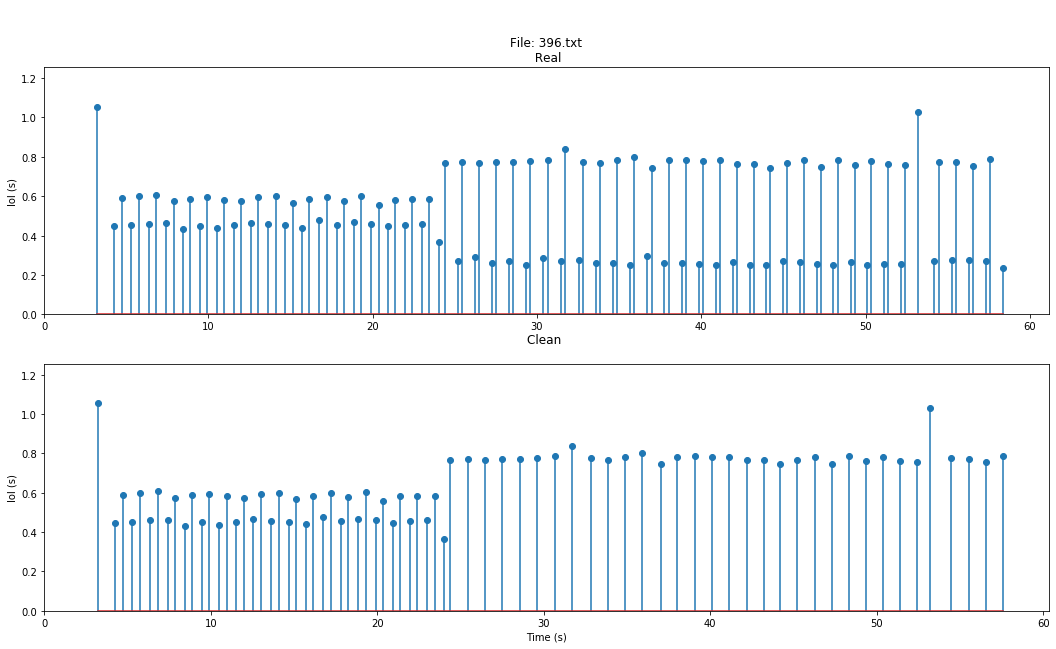

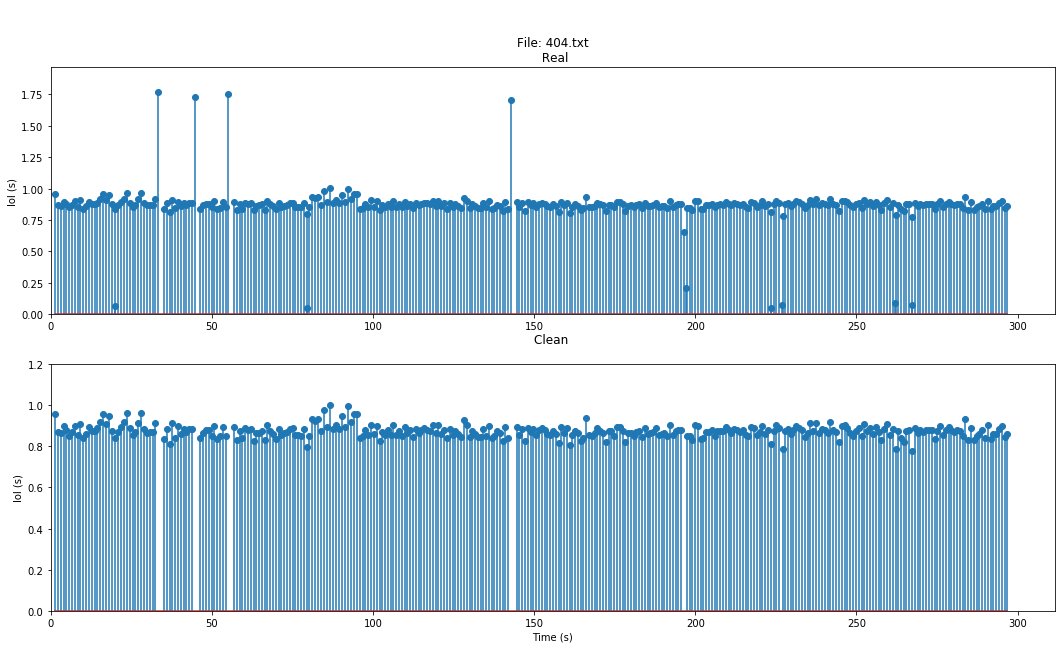

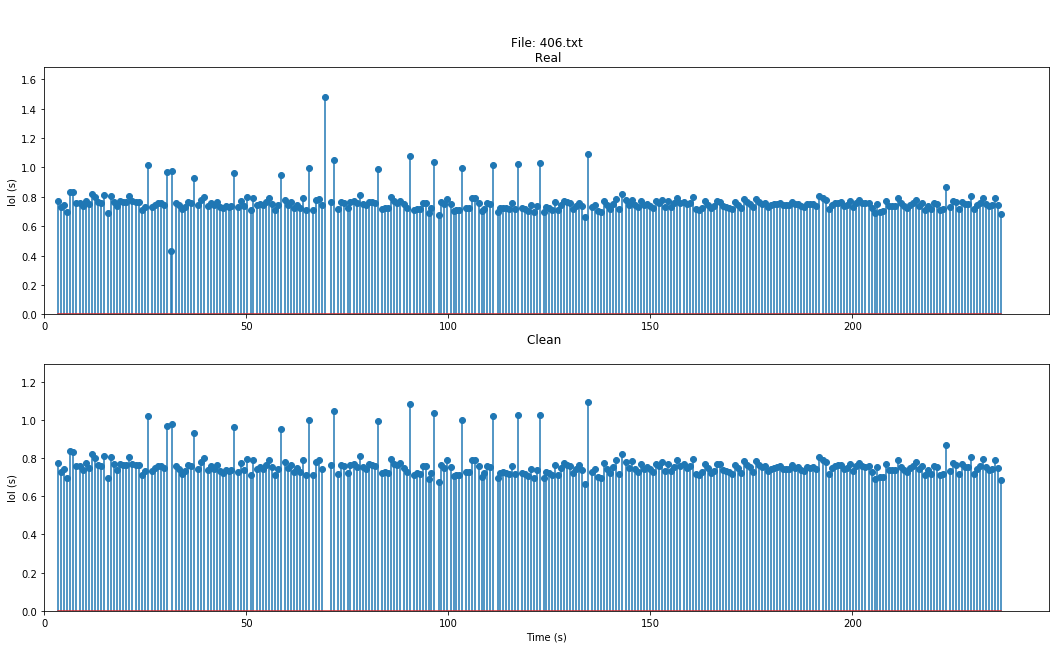

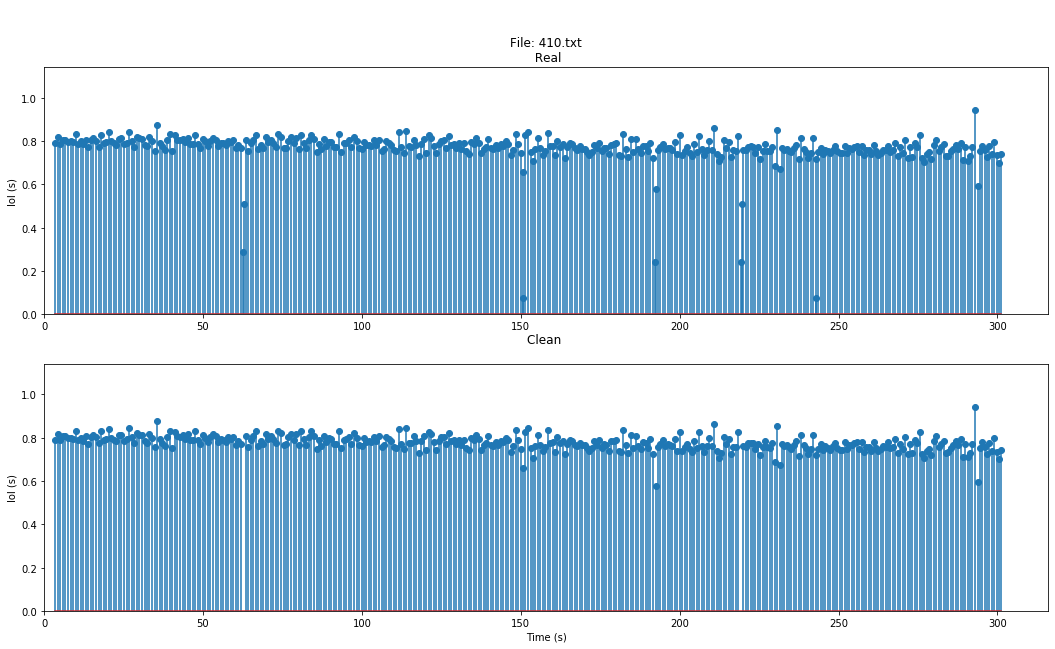

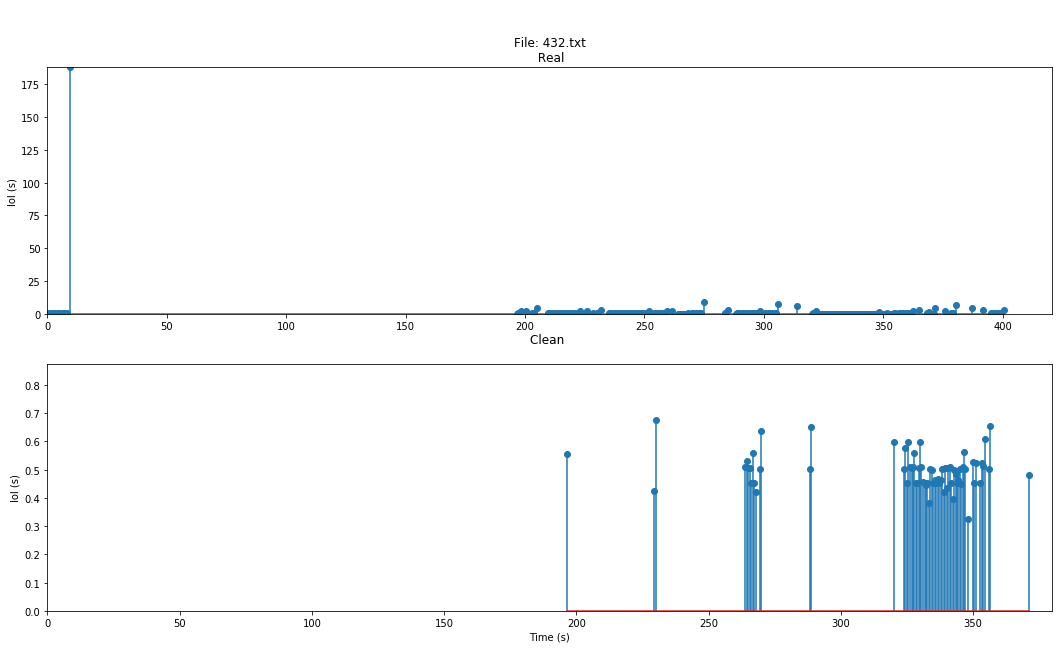

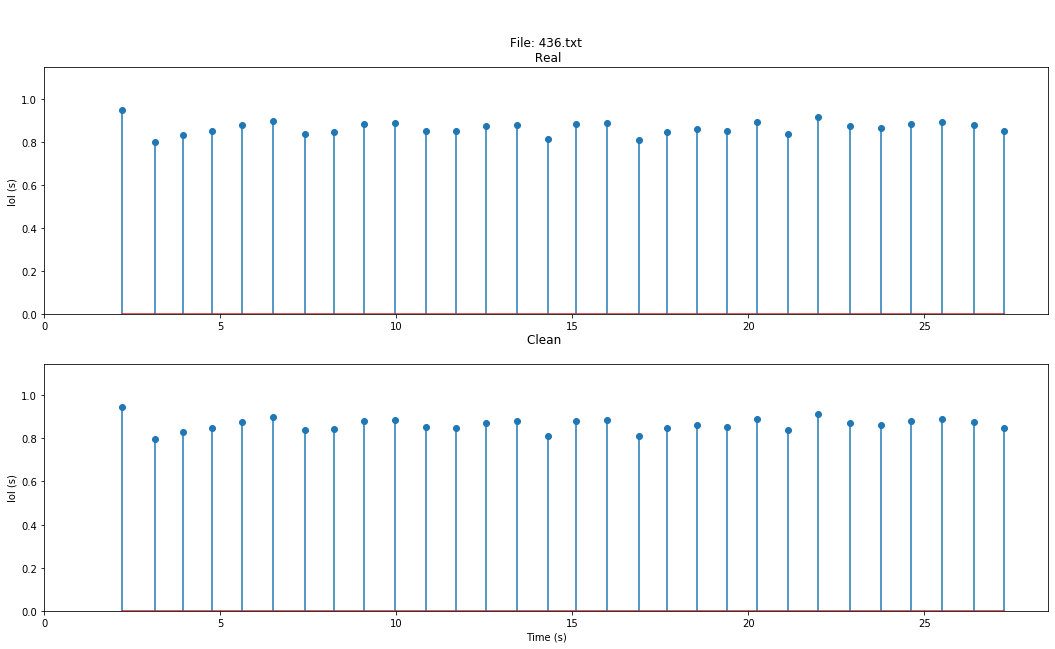

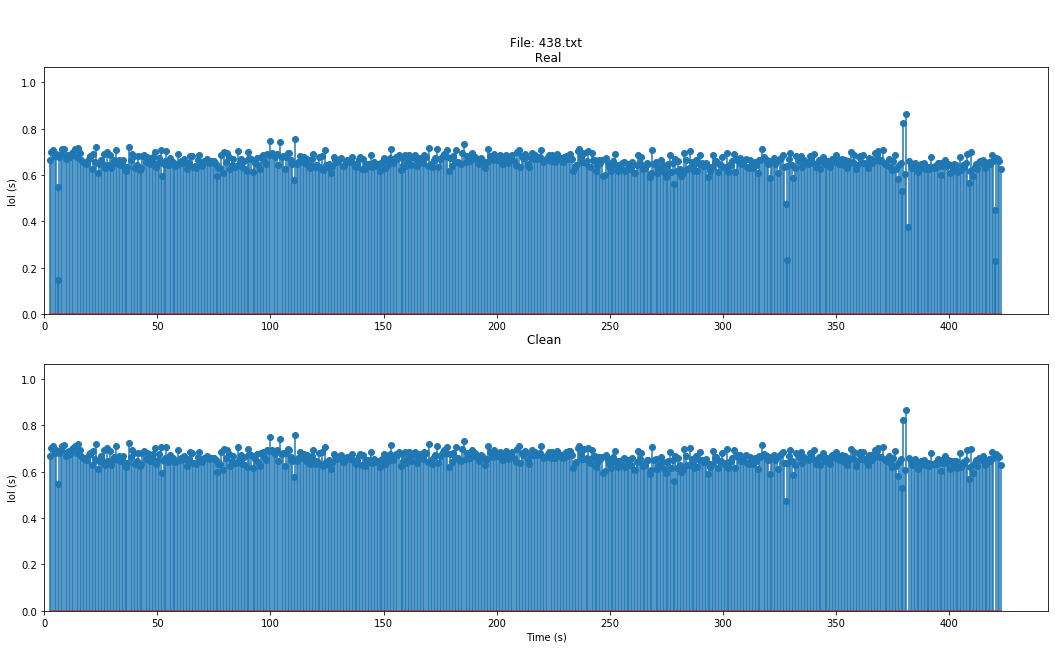

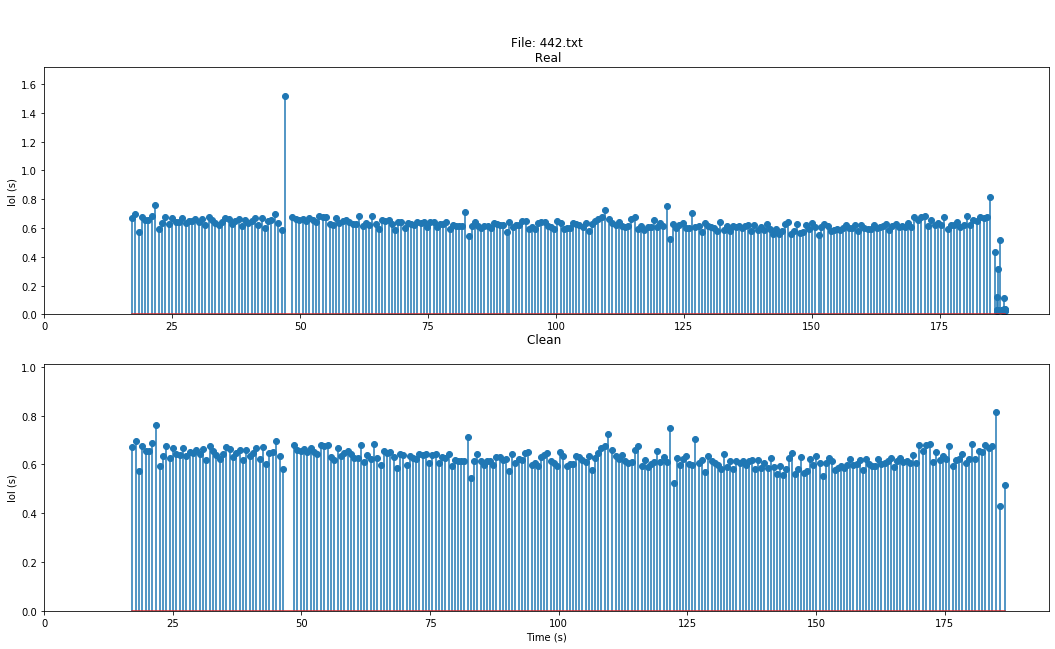

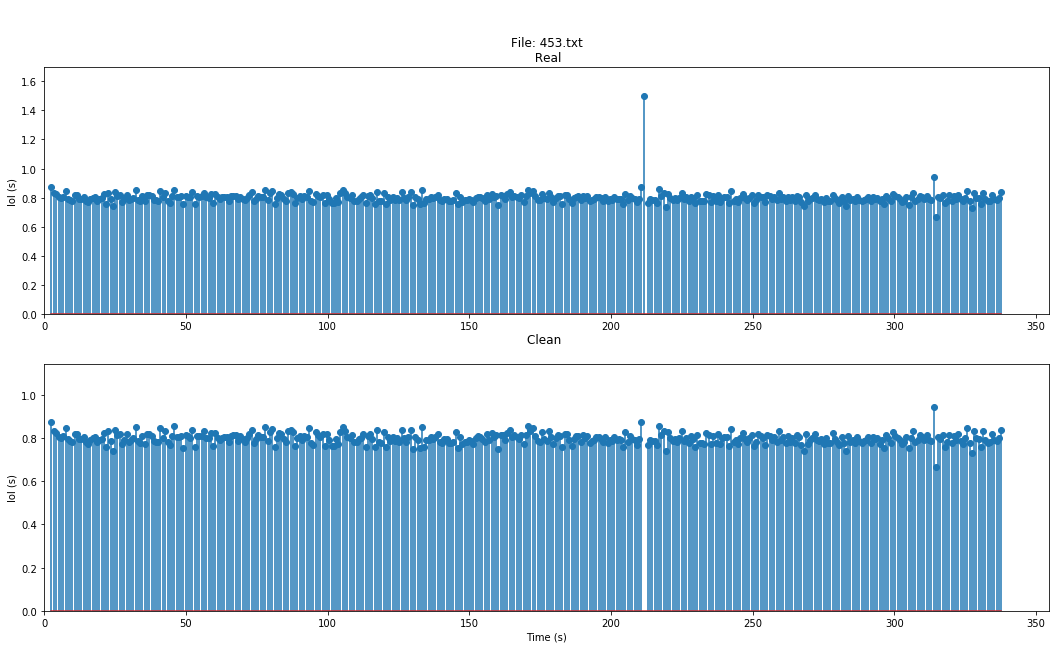

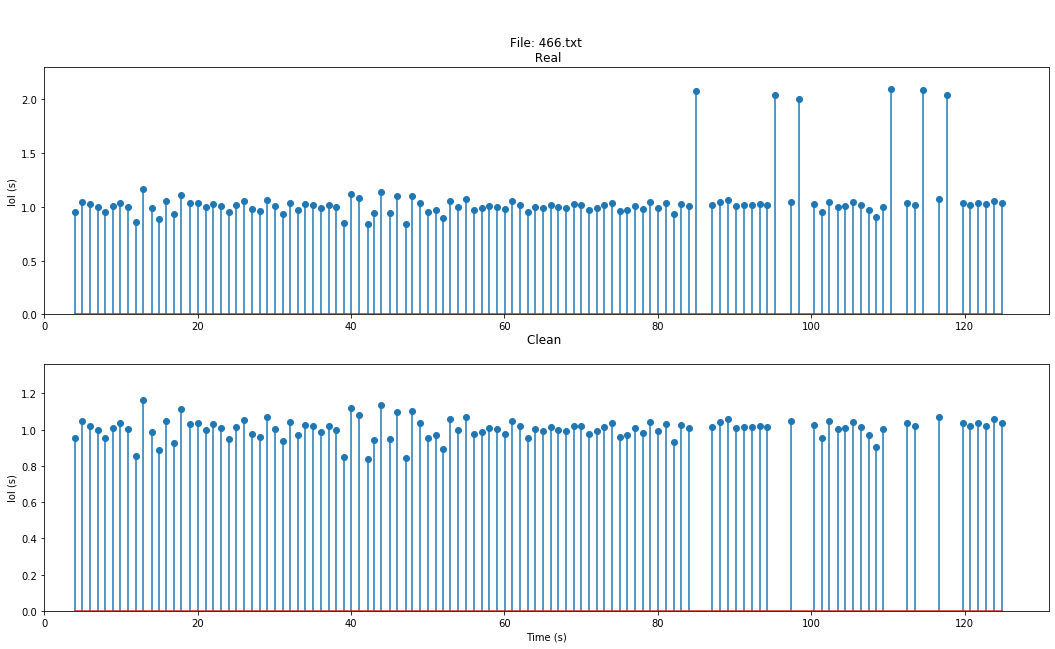

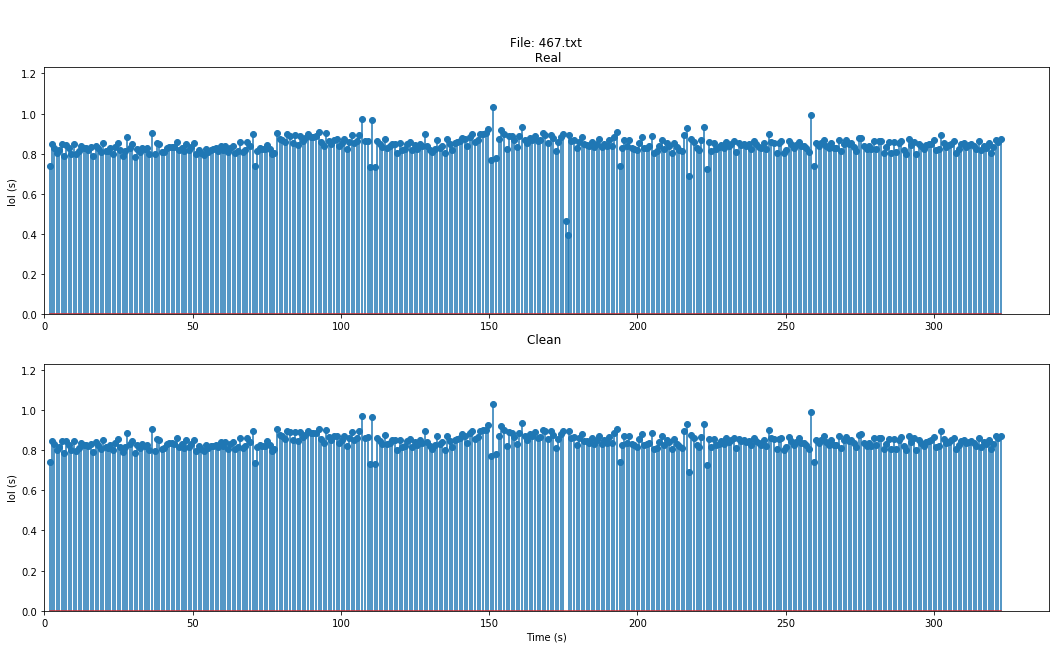

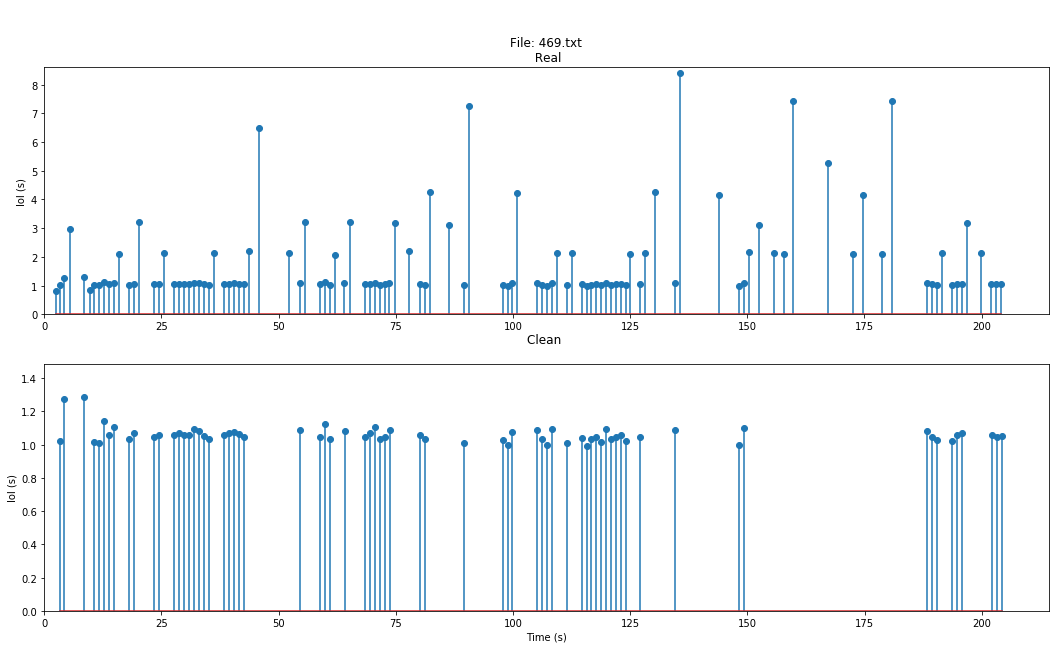

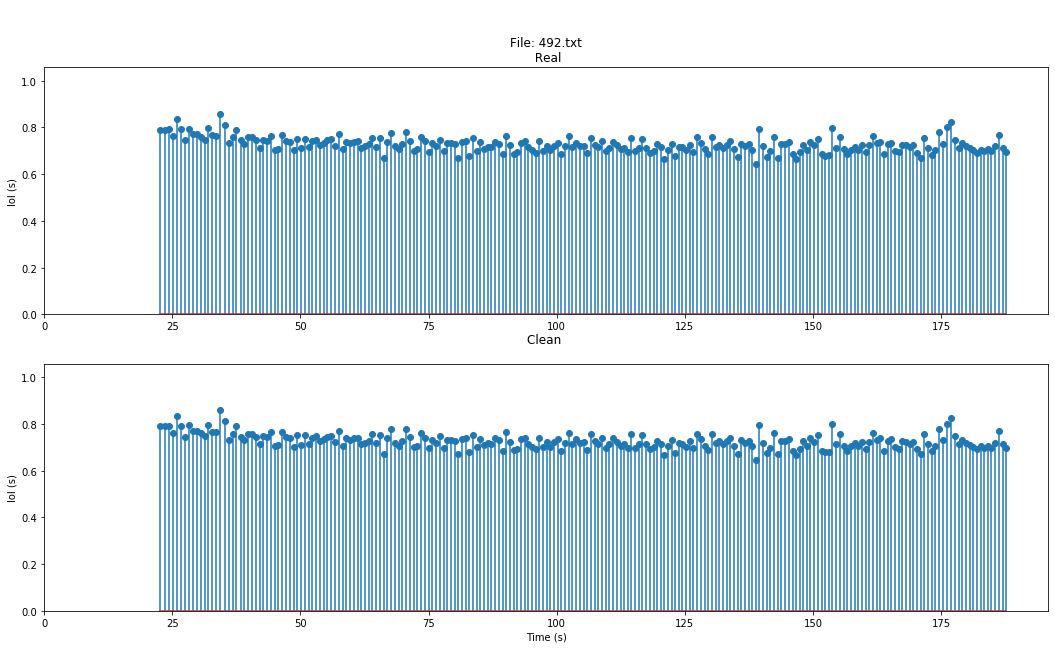

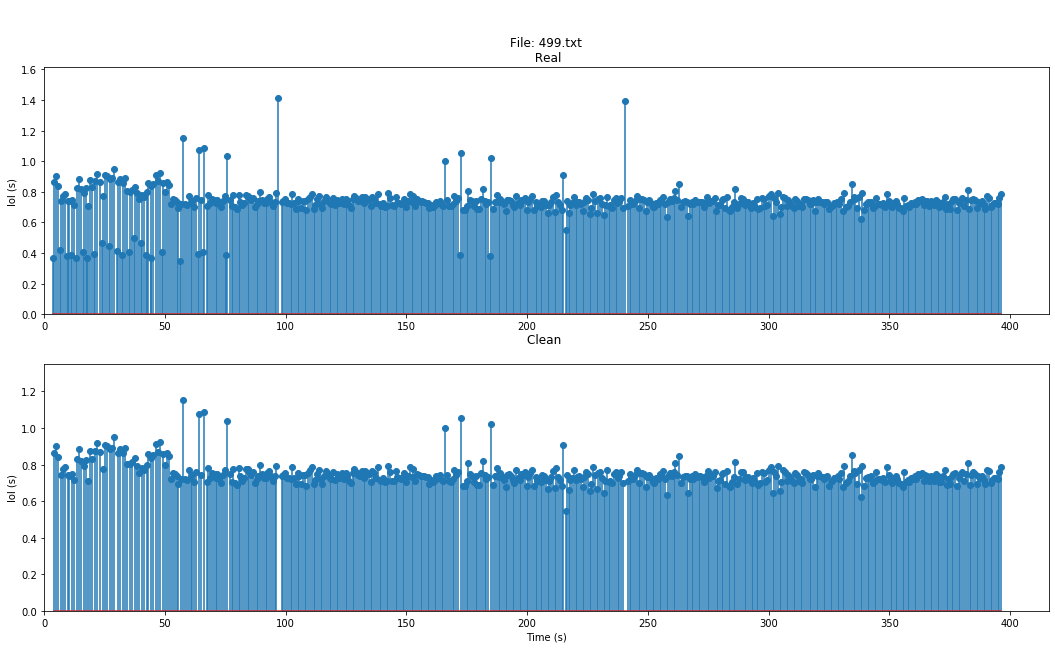

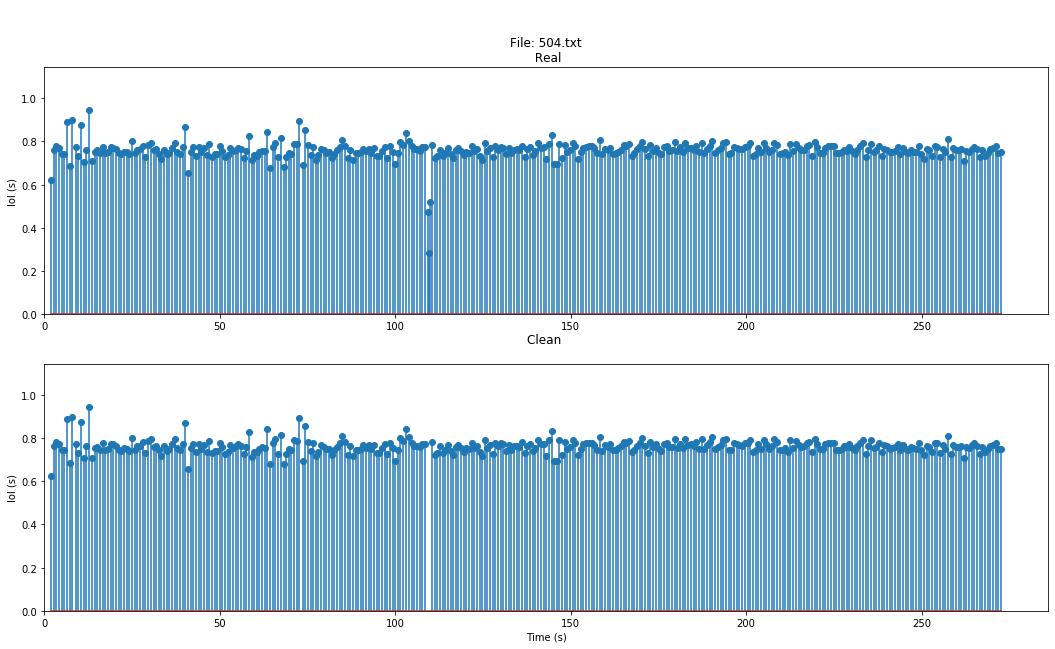

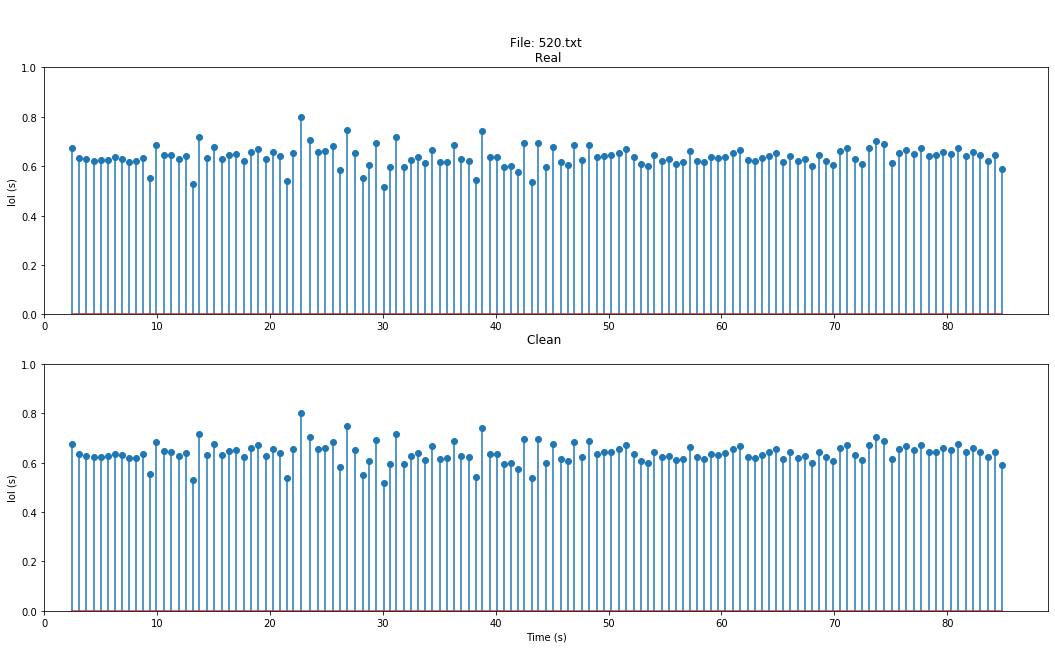

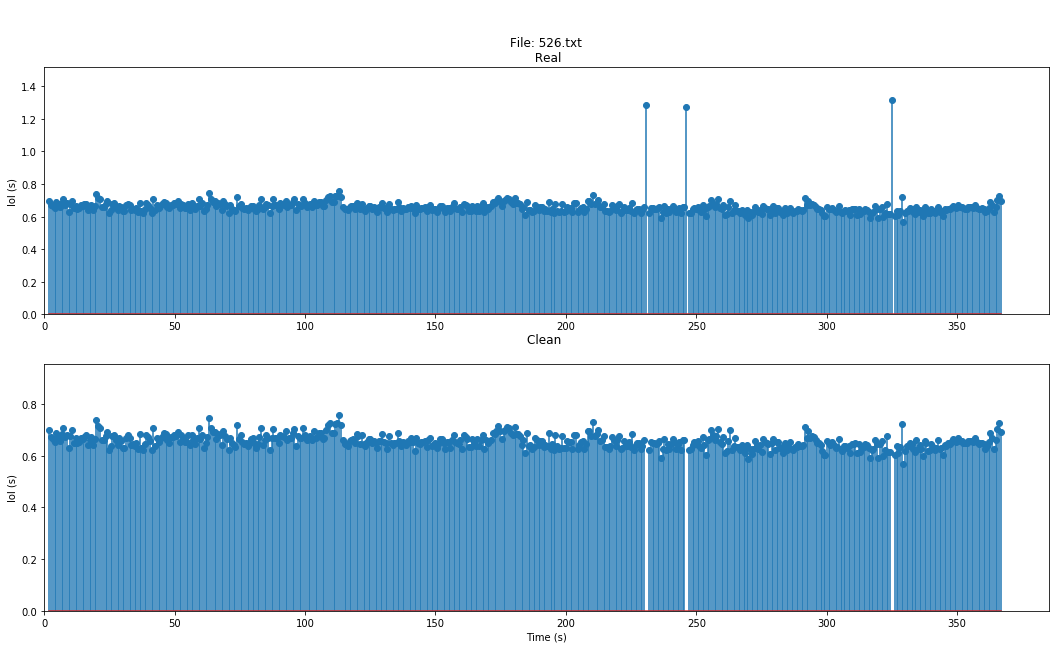

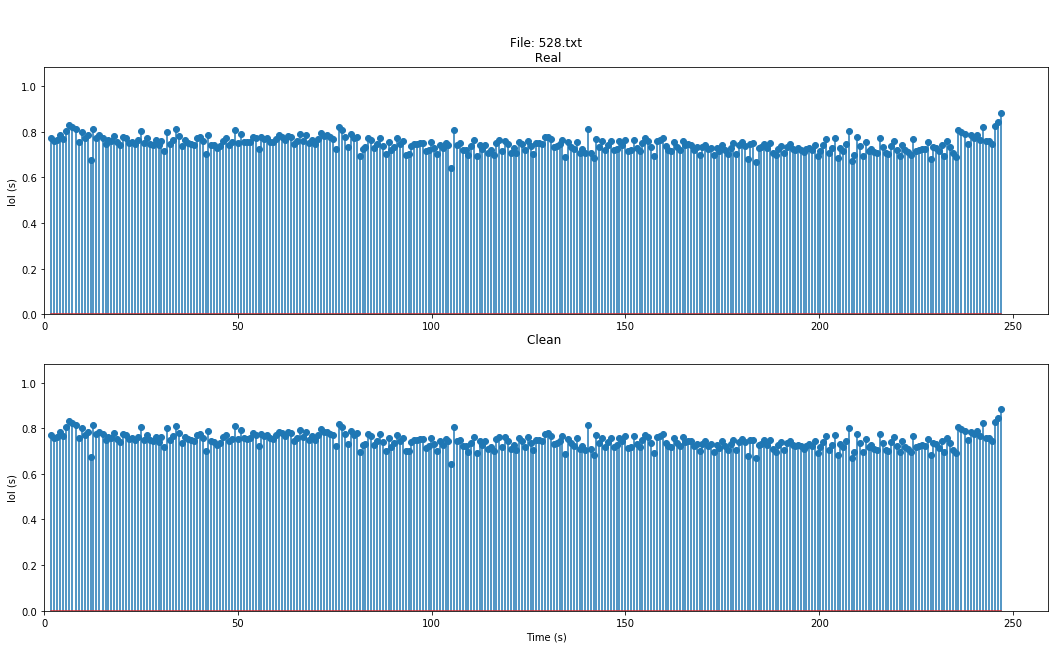

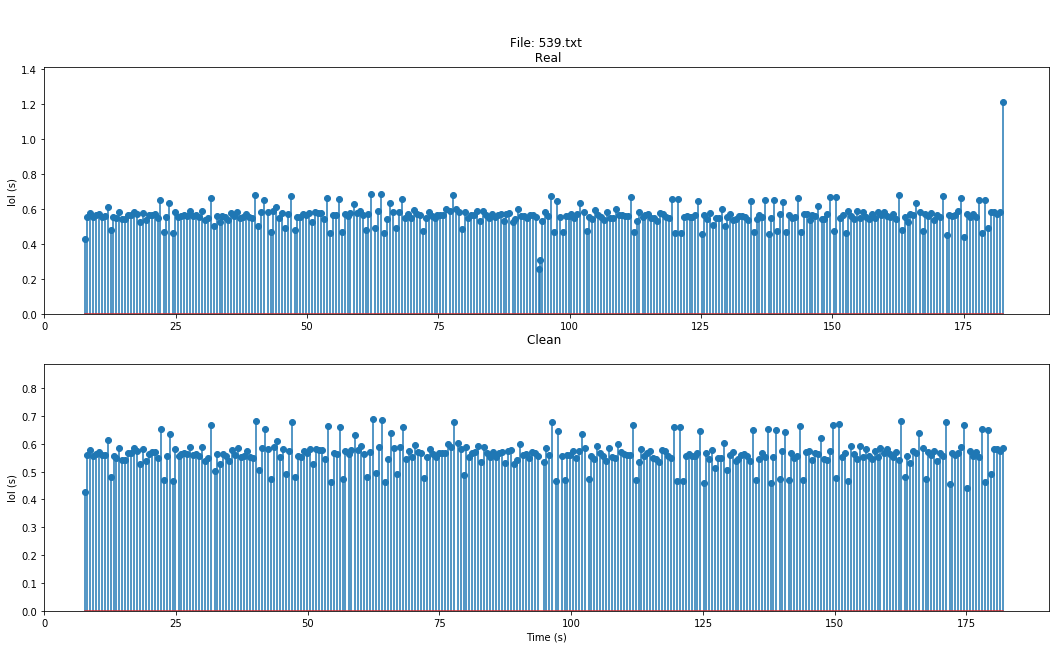

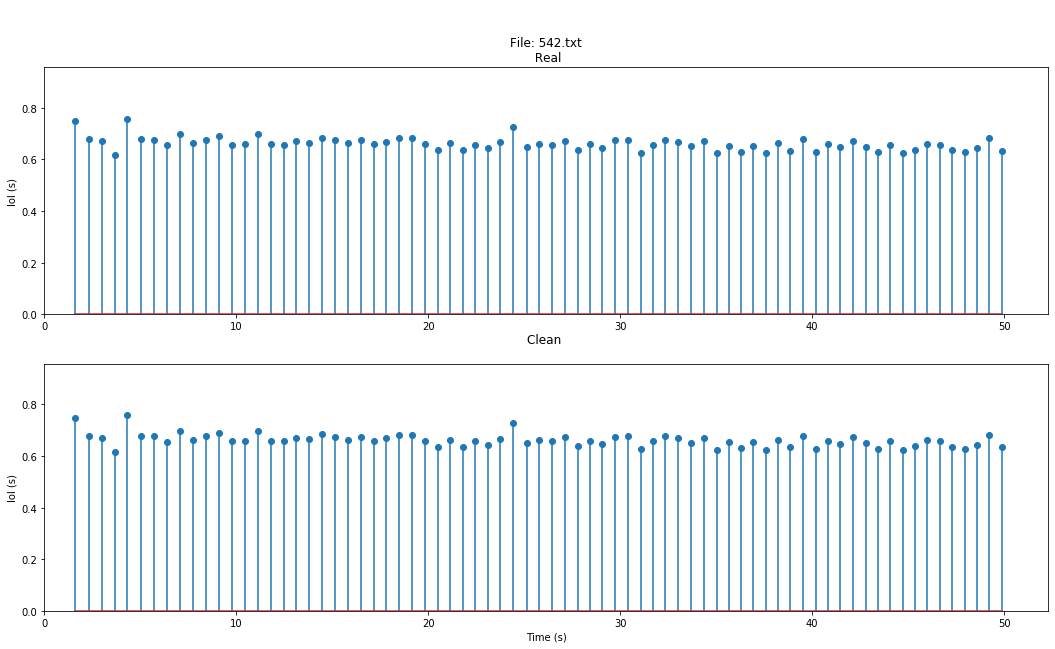

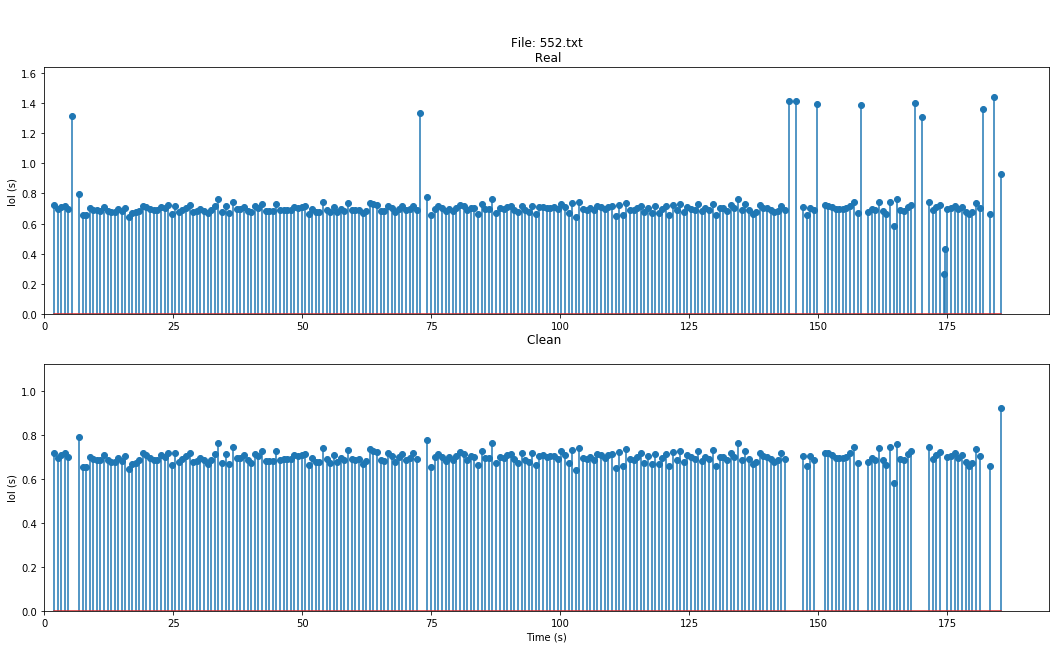

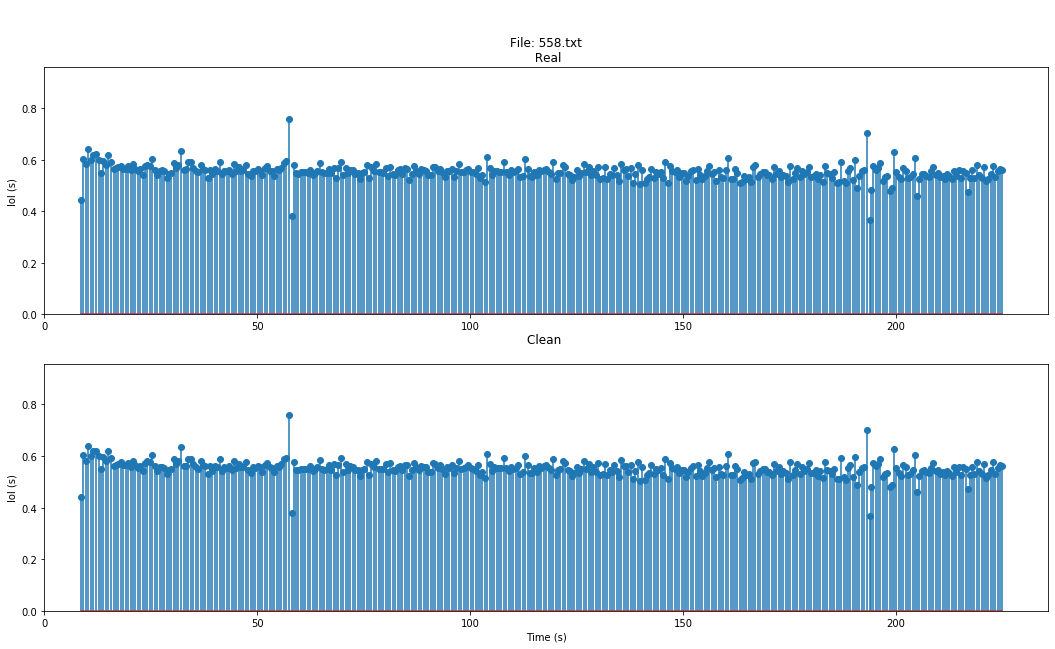

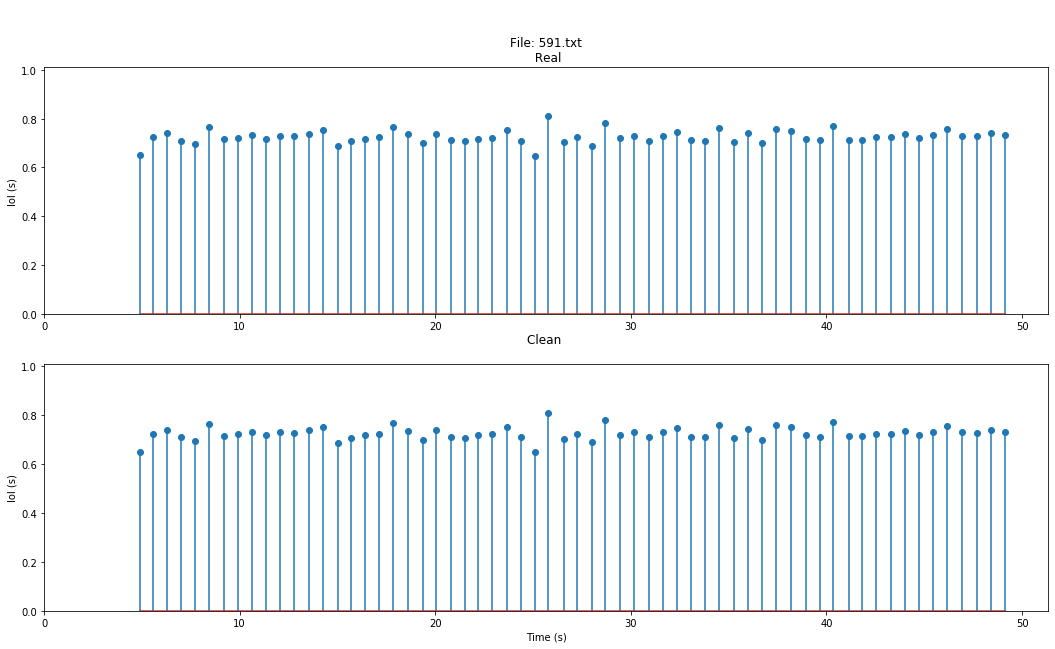

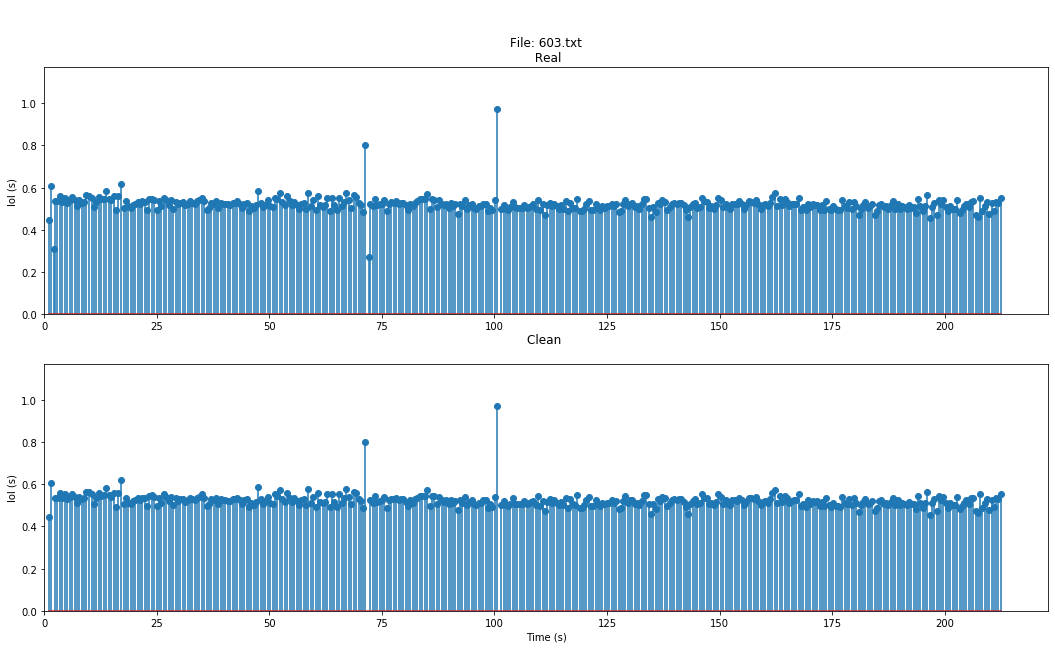

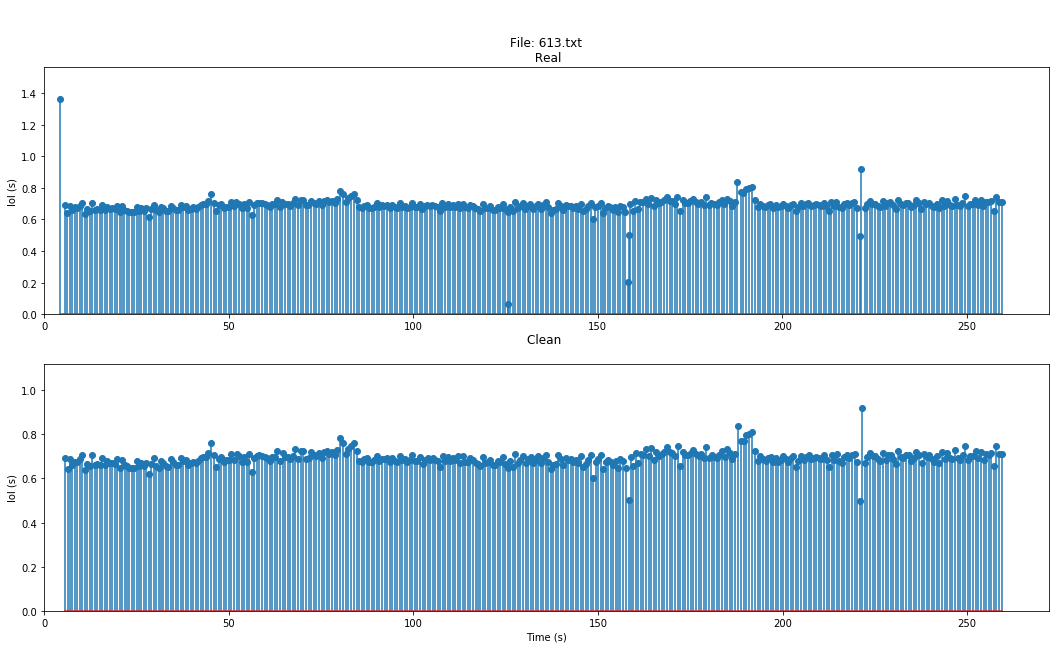

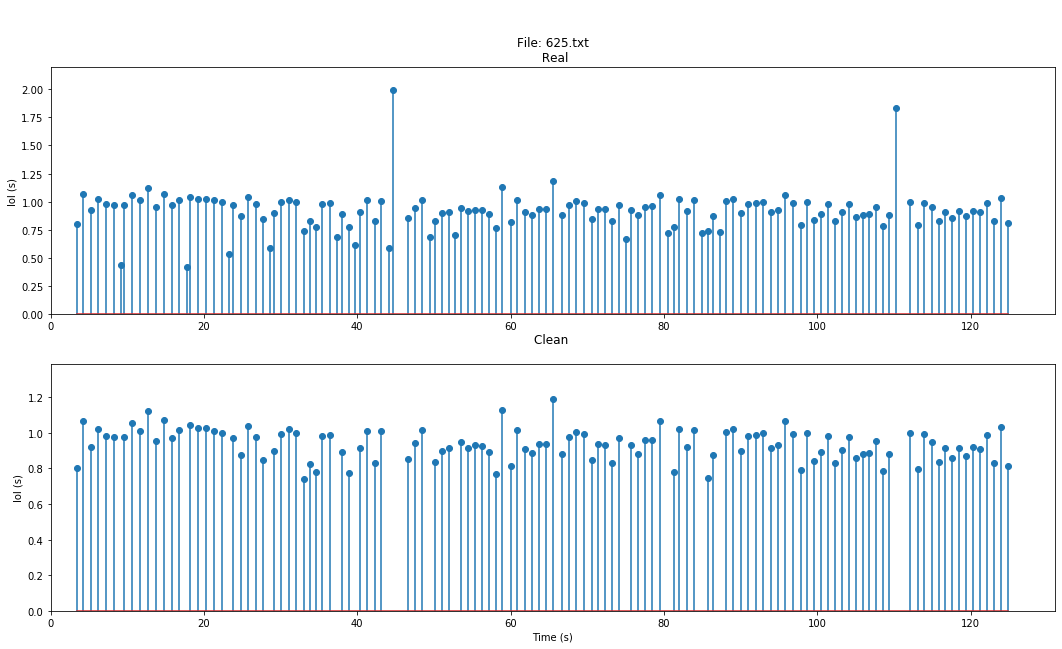

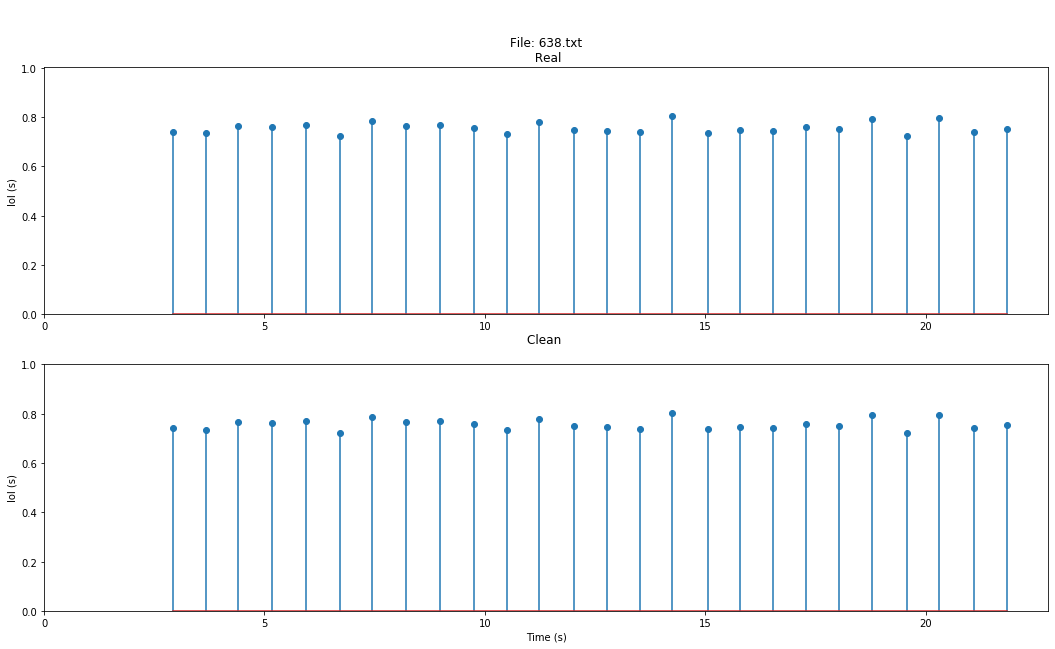

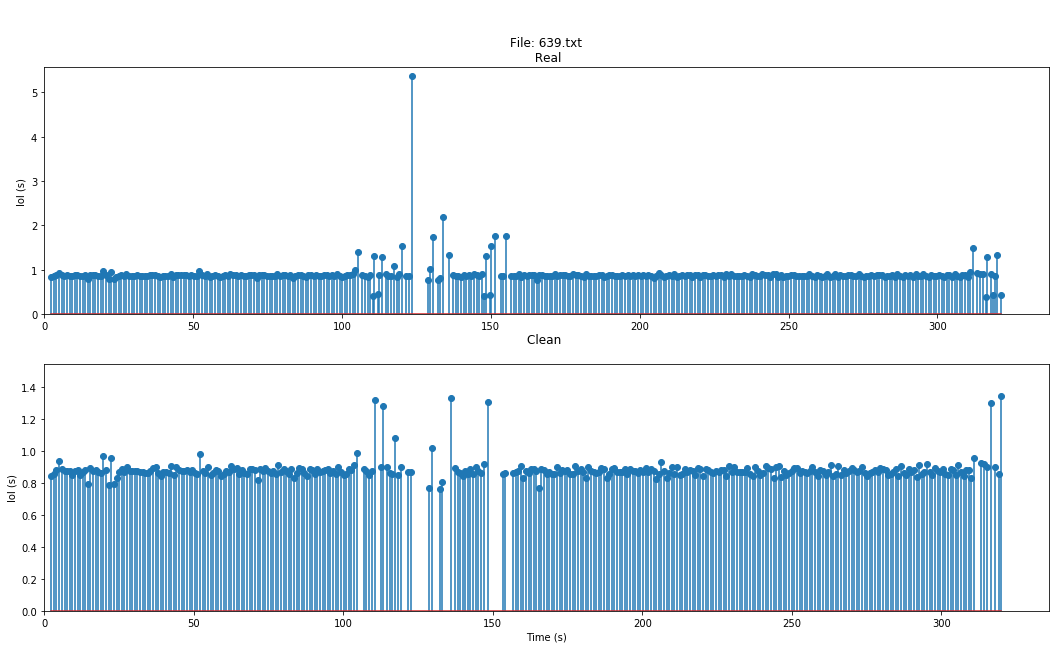

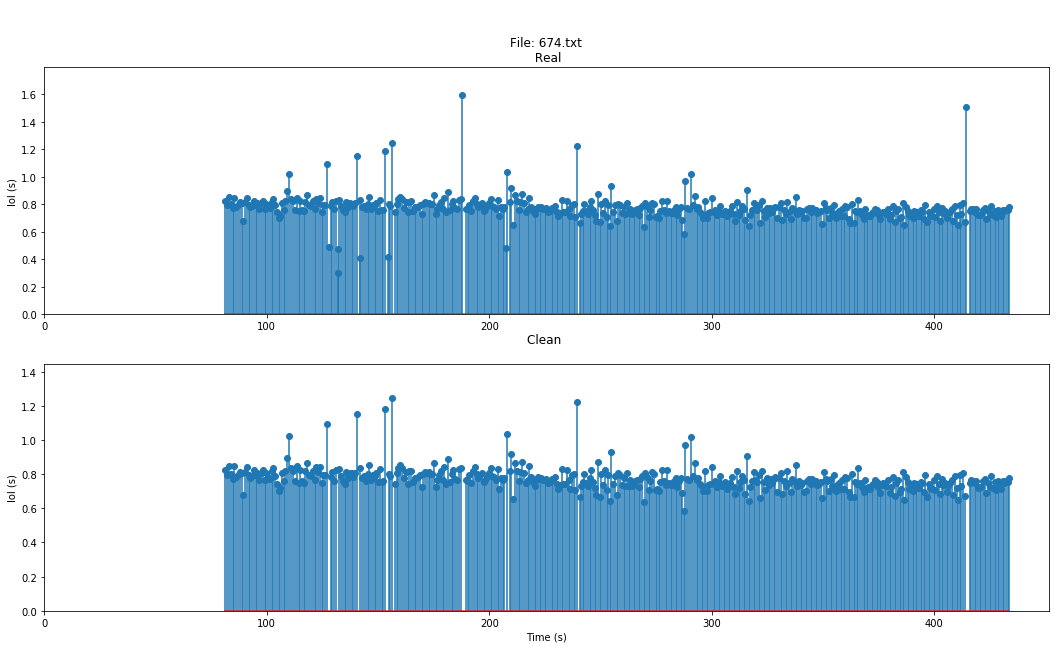

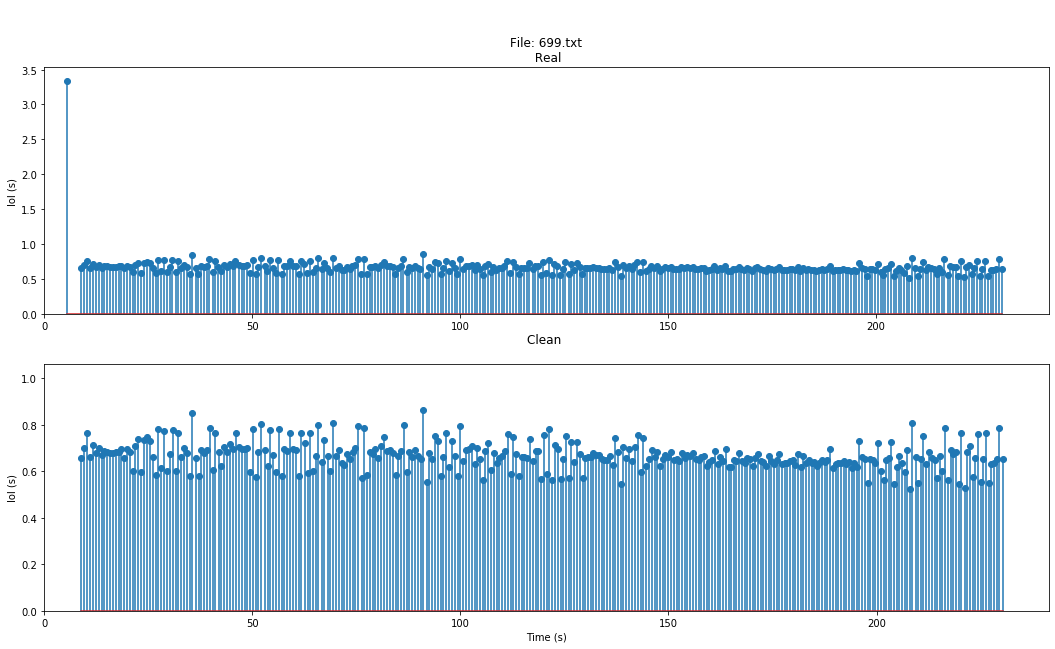

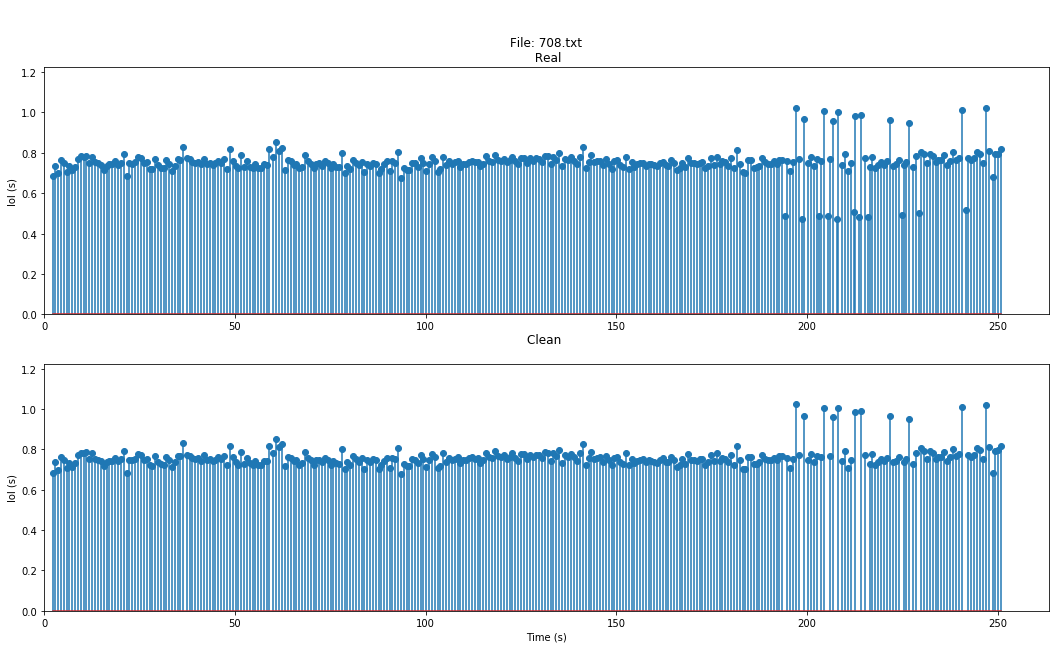

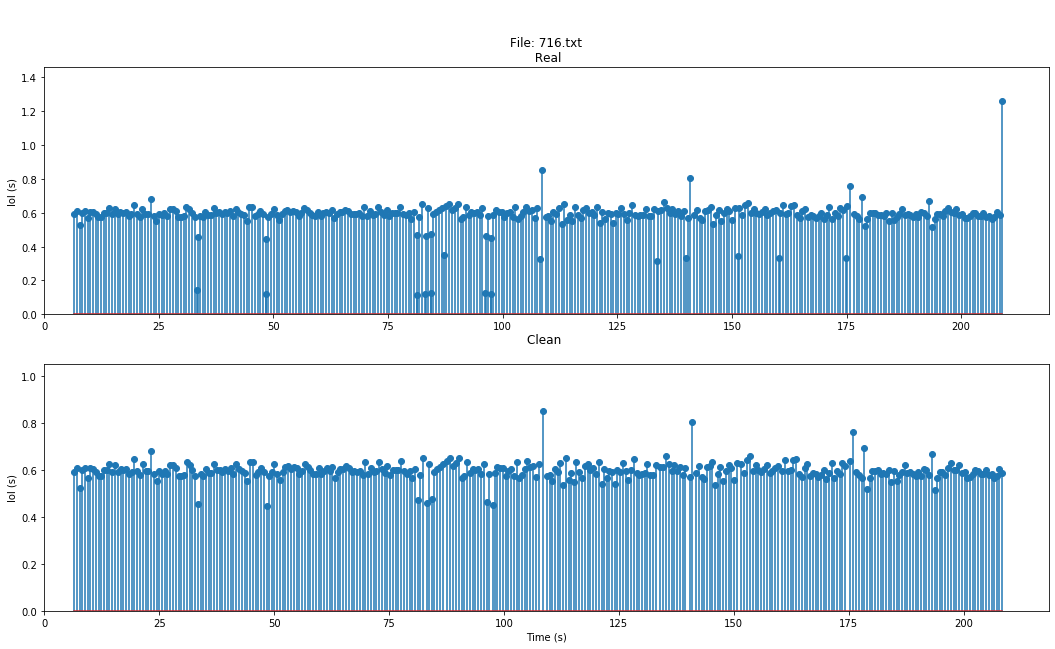

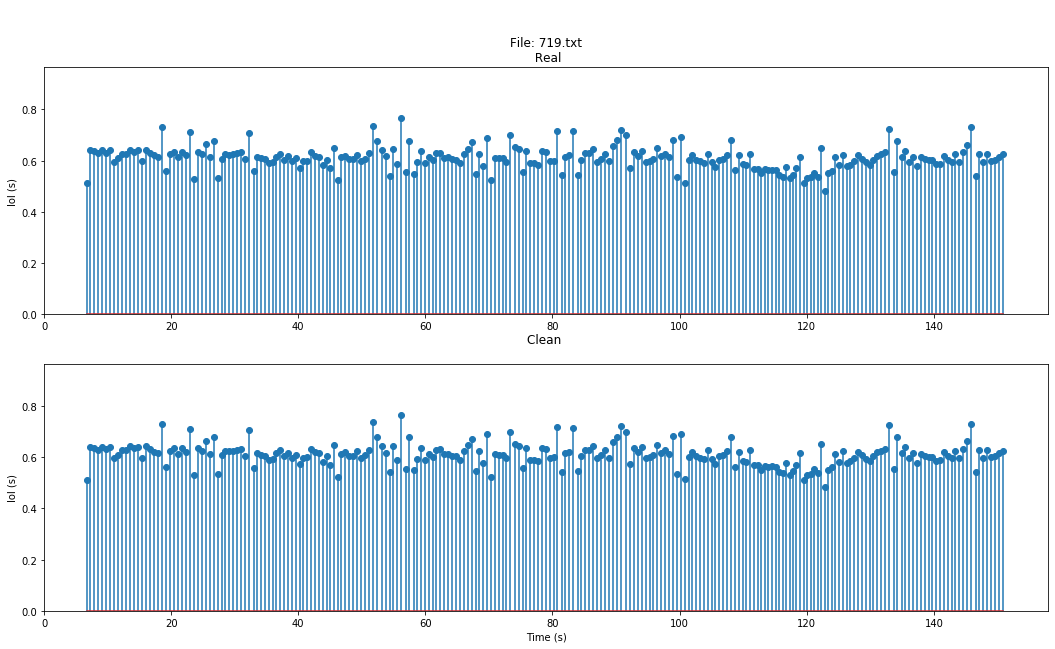

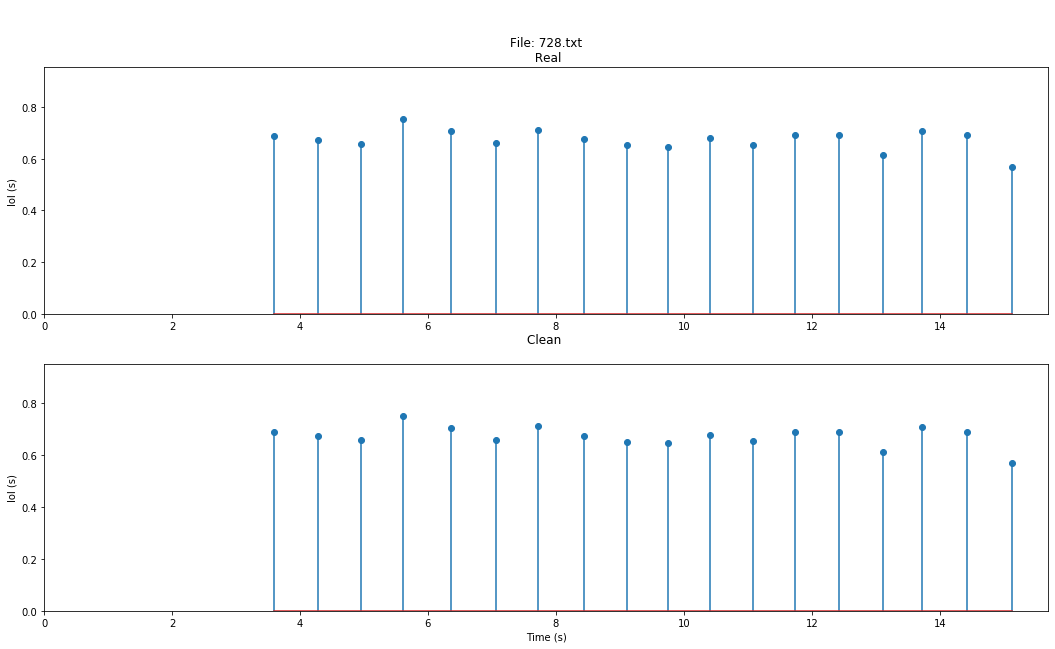

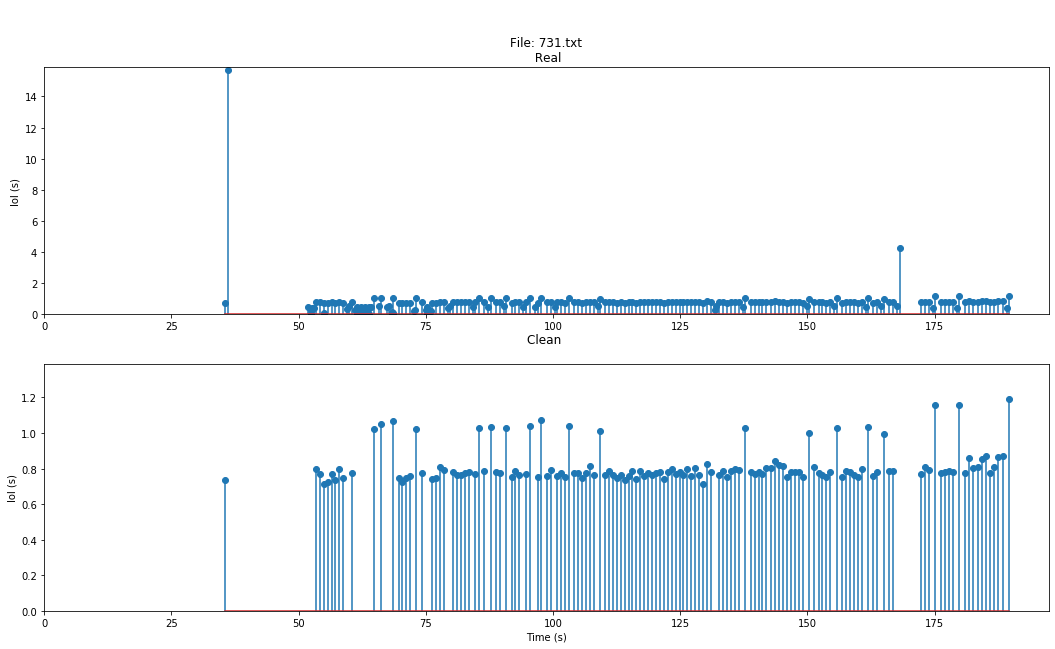

In [8]:
for file in real_songs.keys():
    x_real = real_songs[file][0]
    y_real = real_songs[file][1]
    
    x_clean = cleaning_songs[file][0]
    y_clean = cleaning_songs[file][1]
    
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize = (18,10))
    
    ax1.stem(x_real, y_real, use_line_collection=True)

    ax1.set_xlim(left=0)
    ax1.set_ylim(bottom=0, top=max(y_real)+0.2)

    ax2.stem(x_clean, y_clean, use_line_collection=True)
    ax2.set_xlim(left=0)
    ax2.set_ylim(bottom=0, top=max(y_clean)+0.2)

    ax1.set_title("\n"+"\n"+"File: "+file+"\n"+" Real")
    ax2.set_title("\n"+"Clean \n")
    
    
    #ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('IoI (s)')
    
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('IoI (s)')
    
    plt.show()
    